###  Code for Corefernce resolution in a text.

In [1]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
from collections import OrderedDict
nlp = spacy.load('en')

# Add neural coref to SpaCy's pipe
import neuralcoref
neuralcoref.add_to_pipe(nlp)

# You're done. You can now use NeuralCoref as you usually manipulate a SpaCy document annotations.
#doc = nlp(u'However, voters decided that if the stadium was such a good idea someone would build it himself, and rejected it 59% to 41%.')


def check_coref(text):
    doc = nlp(text)
    # print(doc._.coref_scores)
    scores = doc._.coref_scores
    # print(doc._.coref_clusters)
    correlated_terms = {}

    for key, value in scores.items():
        big = False
        term = None
        for k, v in value.items():
            if big is False:
                if k != key:
                    big = v
                    term = k
            else:
                if k != key:
                    if big < v:
                        big = v
                        term = k
        try:
            if term != key:
                correlated_terms[key].append(term)
        except Exception:
            if term != key:
                correlated_terms[key] = [term]
            else:
                correlated_terms = []

    correlated_terms_keys = []
    correlated_terms_values = []


    for i in correlated_terms.keys():
        correlated_terms_keys.append(i)
        correlated_terms_values.append(correlated_terms[i])

    length = len(correlated_terms_values)

    similar_terms = []
    j = length - 1

    for curr_value in reversed(correlated_terms_values):
        term_map = list()
        term_map.append(correlated_terms_keys[j][0])
        term_map.append(curr_value[0])
        i = j
        while i >= 0:
            if correlated_terms_keys[i] == curr_value[0]:
                value_of_key = correlated_terms_values[i]
                term_map.append(value_of_key[0])
                curr_value[0] = correlated_terms_keys[i]
            i = i - 1
        similar_terms.append(term_map)
        j = j - 1

    return similar_terms

### Word2Vec Training.

In [2]:
# coding: utf-8

from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.test.utils import get_tmpfile
import re
import nltk
import csv

import os
import json
import string

texts = []

path = './Windows_Cleaned_json/'
for file in os.listdir(path):
    xpath = os.path.join(path, file)
    if xpath.endswith('.json'):
        with open(xpath, "r+") as f:
            data = json.load(f)

        temp = data["text"]

        if temp is not None:
            processed_article = temp.lower()
            processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
            processed_article = re.sub(r'\s+', ' ', processed_article)
            texts.append(processed_article)

path = './json_voilence/'
for file in os.listdir(path):
    xpath = os.path.join(path, file)
    if xpath.endswith('.json'):
        with open(xpath, "r+") as f:
            data = json.load(f)

        temp = data["text"]

        if temp is not None:
            processed_article = temp.lower()
            processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
            processed_article = re.sub(r'\s+', ' ', processed_article)
            texts.append(processed_article)

counter = 1
with open('sample_input.csv', 'r') as csvinput:
    reader = csv.reader(csvinput)
    for row in reader:
        try:
            if (counter == 75):
                break
            processed_article = row[32]
            print(processed_article)
            processed_article = processed_article.replace('\nAdvertising\n', ' ')
            processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
            processed_article = re.sub(r'\s+', ' ', processed_article)
            texts.append(processed_article)
            counter += 1
        except Exception as e:
            print(e)
            pass

leng = len(texts)
print("total paragraphs: " + str(leng))
para = 1
final_words = []
for processed_article in texts:
    print("Paragraph " + str(para))
    para = para + 1
    # Preparing the dataset
    all_sentences = nltk.sent_tokenize(processed_article)

    all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

    # Removing Stop Words
    from nltk.corpus import stopwords

    for i in range(len(all_words)):
        print(all_words[i])
        all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]
        final_words.append(all_words[i])


bigram_transformer = Phrases(final_words)

path = get_tmpfile("word2vec.model")

model = Word2Vec(bigram_transformer[final_words], size=100, window=5, min_count=2, workers=4)
model.save("word2vec.model")


w1 = "christian"
model.wv.most_similar(w1)
print(model.similarity('orthodox', 'syrian'))

date_publish
3/23/15 20:26
3/23/19 13:42

3/23/19 21:35
3/23/19 11:30
3/26/19 17:46
total paragraphs: 675
Paragraph 1
['share', 'uttarakhand', 'police', 'in', 'india', 'have', 'lodged', 'a', 'case', 'against', 'a', 'politician', 'from', 'the', 'ruling', 'bjp', 'for', 'allegedly', 'attacking', 'a', 'police', 'horse', 'during', 'a', 'protest', 'in', 'the', 'northern', 'state', 'of', 'uttarakhand', 'bbc', 'reported', 'on', 'tuesday', 'ganesh', 'joshi', 'a', 'legislator', 'from', 'the', 'hill', 'town', 'of', 'mussoorie', 'allegedly', 'assaulted', 'the', 'animal', 'with', 'a', 'stick', 'the', 'horse', 'named', 'shaktimaan', 'suffered', 'multiple', 'fractures', 'and', 'some', 'reports', 'said', 'it', 'might', 'require', 'a', 'leg', 'amputation', 'mr', 'joshi', 'said', 'the', 'charge', 'against', 'him', 'was', 'politically', 'motivated', 'the', 'footage', 'which', 'the', 'electronic', 'media', 'is', 'showing', 'by', 'linking', 'with', 'an', 'old', 'clip', 'in', 'which', 'i', 'am', 'lifting', 

Paragraph 3
['on', 'june', 'at', 'the', 'inauguration', 'of', 'the', 'kochi', 'metro', 'rail', 'service', 'kerala', 'chief', 'minister', 'pinarayi', 'vijayan', 'declared', 'that', 'mass', 'protests', 'will', 'not', 'force', 'his', 'left', 'front', 'government', 'to', 'abandon', 'development', 'projects', 'vijayan', 'a', 'senior', 'leader', 'of', 'the', 'communist', 'party', 'of', 'india', 'marxist', 'has', 'been', 'a', 'staunch', 'advocate', 'of', 'development', 'works', 'since', 'he', 'assumed', 'office', 'in', 'may', 'we', 'will', 'provide', 'financial', 'compensation', 'for', 'those', 'who', 'are', 'affected', 'by', 'the', 'projects', 'he', 'said', 'in', 'kochi', 'we', 'will', 'rehabilitate', 'those', 'who', 'lose', 'their', 'land', 'but', 'there', 'is', 'no', 'scope', 'for', 'protests', 'if', 'protests', 'continue', 'we', 'have', 'no', 'option', 'but', 'to', 'go', 'ahead', 'with', 'development', 'works', 'development', 'is', 'our', 'main', 'agenda', 'the', 'next', 'day', 'as', 'if'

Paragraph 6
['delhi', 'university', 'has', 'turned', 'into', 'a', 'battlefield', 'of', 'extreme', 'political', 'ideologies', 'in', 'the', 'last', 'few', 'days', 'with', 'students', 'of', 'different', 'political', 'leanings', 'taking', 'out', 'marches', 'and', 'counter', 'marches', 'some', 'distributing', 'roses', 'in', 'the', 'name', 'of', 'peace', 'while', 'others', 'putting', 'up', 'massive', 'banners', 'that', 'could', 'incite', 'violence', 'and', 'further', 'deteriorate', 'the', 'already', 'vitiated', 'atmosphere', 'of', 'the', 'university', 'it', 'can', 'be', 'said', 'that', 'in', 'all', 'the', 'years', 'of', 'its', 'existence', 'delhi', 'university', 'has', 'never', 'seen', 'the', 'kind', 'of', 'violence', 'that', 'occurred', 'outside', 'ramjas', 'college', 'on', 'february', 'nd', 'wherein', 'innocent', 'students', 'teachers', 'and', 'journalists', 'became', 'victims', 'of', 'the', 'clash', 'between', 'the', 'abvp', 'and', 'left', 'organizations', 'the', 'situation', 'would', 'no

Paragraph 9
['dmk', 'chief', 'm', 'k', 'stalin', 'photo', 'credit', 'pti', 'dravida', 'munnetra', 'kazagham', 'dmk', 'chief', 'mk', 'stalin', 'the', 'third', 'son', 'of', 'former', 'tamil', 'nadu', 'chief', 'minister', 'm', 'karunanidhi', 'took', 'over', 'the', 'reins', 'of', 'the', 'dmk', 'after', 'karunanidhi', 'died', 'in', 'august', 'there', 'were', 'speculations', 'about', 'the', 'fate', 'of', 'the', 'dmk', 'following', 'the', 'demise', 'of', 'the', 'former', 'chief', 'minister', 'as', 'stalin', 'faced', 'a', 'challenge', 'to', 'his', 'leadership', 'from', 'his', 'brother', 'mk', 'alagiri', 'fighting', 'the', 'odds', 'stalin', 'has', 'emerged', 'as', 'a', 'strong', 'leader', 'in', 'the', 'state', 'with', 'his', 'party', 'completely', 'behind', 'him', 'stalin', 'began', 'his', 'political', 'career', 'when', 'he', 'was', 'by', 'campaigning', 'in', 'the', 'elections', 'at', 'the', 'age', 'of', 'he', 'was', 'elected', 'to', 'the', 'general', 'committee', 'of', 'the', 'dmk', 'he', 'mad

Paragraph 14
['chandigarh', 'jaipur', 'farmers', 'on', 'friday', 'gathered', 'at', 'various', 'places', 'and', 'blocked', 'national', 'highways', 'in', 'haryana', 'and', 'rajasthan', 'as', 'part', 'of', 'their', 'nation', 'wide', 'stir', 'against', 'the', 'death', 'of', 'five', 'cultivators', 'in', 'police', 'firing', 'in', 'madhya', 'pradesh', 'and', 'failure', 'of', 'the', 'centre', 'to', 'provide', 'relief', 'to', 'the', 'farming', 'community', 'in', 'haryana', 'led', 'by', 'bhartiya', 'kisan', 'union', 'bku', 'leader', 'gurnam', 'singh', 'farmers', 'gathered', 'near', 'mohra', 'in', 'ambala', 'and', 'blocked', 'the', 'highway', 'there', 'by', 'parking', 'their', 'tractors', 'apart', 'from', 'ambala', 'farmers', 'are', 'also', 'holding', 'protests', 'at', 'rohtak', 'sonepat', 'hisar', 'sirsa', 'jind', 'bhiwani', 'and', 'charkhi', 'dadri', 'following', 'the', 'protests', 'authorities', 'had', 'to', 'divert', 'the', 'traffic', 'at', 'some', 'places', 'singh', 'said', 'that', 'the', 'f

Paragraph 16
['raghuram', 'rajan', 'says', 'he', 'will', 'return', 'if', 'there', 'is', 'an', 'opportunity', 'to', 'be', 'of', 'use', 'says', 'country', 'needs', 'new', 'set', 'of', 'reforms']
Paragraph 17
['raghuram', 'rajan', 'says', 'he', 'will', 'return', 'if', 'there', 'is', 'an', 'opportunity', 'to', 'be', 'of', 'use', 'says', 'country', 'needs', 'new', 'set', 'of', 'reforms']
Paragraph 18
['farmers', 'on', 'dharna', 'in', 'baraut', 'baghpat', 'lucknow', 'a', 'farmer', 'said', 'to', 'be', 'demonstrating', 'against', 'the', 'uttar', 'pradesh', 'government', 'with', 'others', 'since', 'may', 'died', 'of', 'a', 'heatstroke', 'on', 'saturday', 'the', 'fourth', 'anniversary', 'of', 'narendra', 'modi', 's', 'government', 'and', 'a', 'day', 'before', 'the', 'prime', 'minister', 'addresses', 'a', 'rally', 'km', 'from', 'the', 'spot', 'uday', 'veer', 'singh', 'died', 'while', 'protesting', 'before', 'the', 'baraut', 'tehsil', 'office', 'in', 'baghpat', 'district', 'a', 'day', 'after', 'ch

Paragraph 22
['opposition', 'parties', 'in', 'tamil', 'nadu', 'are', 'holding', 'a', 'rail', 'roko', 'protest', 'for', 'the', 'second', 'consecutive', 'day', 'today', 'demanding', 'constitution', 'of', 'the', 'cauvery', 'water', 'management', 'board', 'yesterday', 'chennai', 'came', 'to', 'a', 'standstill', 'as', 'major', 'opposition', 'parties', 'in', 'tamil', 'nadu', 'held', 'the', 'protest', 'demanding', 'constitution', 'of', 'the', 'cauvery', 'water', 'management', 'board', 'by', 'the', 'centre', 'although', 'the', 'rail', 'roko', 'agitation', 'was', 'planned', 'and', 'conducted', 'across', 'the', 'state', 'chennai', 'was', 'hit', 'particularly', 'by', 'the', 'protest', 'railway', 'stations', 'came', 'to', 'a', 'halt', 'railway', 'stations', 'like', 'perambur', 'chennai', 'central', 'and', 'saidaipet', 'which', 'witness', 'large', 'crowds', 'usually', 'came', 'to', 'a', 'total', 'halt', 'due', 'to', 'the', 'protest', 'also', 'read', 'tamil', 'nadu', 's', 'farmers', 'parties', 'prot

Paragraph 24
['r', 'guwahati', 'jan', 'pti', 'in', 'protest', 'over', 'the', 'citizenship', 'bill', 'the', 'families', 'of', 'those', 'who', 'died', 'fighting', 'for', 'the', 'cause', 'of', 'the', 'assam', 'movement', 'decided', 'on', 'wednesday', 'to', 'return', 'the', 'mementos', 'conferred', 'by', 'the', 'state', 'government', 'the', 'swahid', 'parial', 'samannayrakhi', 'parishad', 'spsp', 'an', 'organisation', 'of', 'the', 'families', 'of', 'assam', 'agitation', 'gathered', 'at', 'the', 'saheed', 'niyas', 'here', 'the', 'headquarters', 'of', 'the', 'all', 'assam', 'students', 'union', 'aasu', 'that', 'had', 'spearheaded', 'the', 'movement', 'to', 'stage', 'a', 'protest', 'against', 'the', 'contentious', 'bill', 'holding', 'the', 'mementos', 'given', 'by', 'the', 'assam', 'government', 'to', 'people', 'posthumously', 'their', 'families', 'decided', 'to', 'return', 'the', 'plaques', 'in', 'protest', 'against', 'the', 'centre', 's', 'move', 'to', 'implement', 'the', 'citizenship', 'am

Paragraph 26
['hyderabad', 'condemning', 'the', 'killings', 'of', 'rss', 'and', 'bjp', 'members', 'in', 'kerala', 'a', 'group', 'of', 'abvp', 'workers', 'today', 'held', 'a', 'demonstration', 'against', 'the', 'visit', 'of', 'kerala', 'chief', 'minister', 'pinarayi', 'vijayan', 'here', 'a', 'group', 'of', 'women', 'activists', 'shouted', 'the', 'slogan', 'go', 'back', 'kerala', 'cm', 'go', 'back', 'outside', 'the', 'rtc', 'kala', 'bhavan', 'here', 'blaming', 'the', 'vijayan', 'led', 'government', 'in', 'kerala', 'for', 'rise', 'in', 'killings', 'of', 'rss', 'and', 'bjp', 'members', 'abvp', 'activists', 'demanded', 'dismissal', 'of', 'the', 'government', 'police', 'foiled', 'their', 'attempt', 'to', 'barge', 'in', 'taking', 'them', 'in', 'preventive', 'custody', 'vijayan', 'today', 'addressed', 'a', 'function', 'organised', 'by', 'malayalis', 'of', 'telangana', 'in', 'the', 'city']
Paragraph 27
['massive', 'protests', 'across', 'the', 'country', 'has', 'now', 'resulted', 'in', 'the', 'o

Paragraph 29
['the', 'nia', 'special', 'court', 'in', 'delhi', 'framed', 'charges', 'against', 'five', 'accused', 'isis', 'members', 'on', 'monday', 'the', 'isis', 'terror', 'module', 'in', 'question', 'learnt', 'to', 'make', 'bombs', 'out', 'of', 'matchstick', 'heads', 'this', 'was', 'discovered', 'by', 'nia', 'sleuths', 'from', 'one', 'of', 'the', 'accused', 'akhlakur', 'rehman', 'alias', 'akhlaq', 'from', 'whose', 'mobile', 'the', 'officials', 'recovered', 'an', 'e', 'book', 'on', 'bomb', 'making', 'titled', 'bomb', 'banane', 'ka', 'asan', 'tariqa', 'the', 'conspiracy', 'took', 'place', 'in', 'when', 'the', 'five', 'accused', 'formed', 'a', 'group', 'to', 'unleash', 'terror', 'in', 'various', 'parts', 'of', 'country', 'mohammed', 'azeemushan', 'mohammed', 'osama', 'alias', 'adil', 'peer', 'mohammed', 'mehraj', 'alias', 'monu', 'and', 'akhlaq', 'are', 'from', 'roorkie', 'in', 'uttarakhand', 'while', 'the', 'fifth', 'accused', 'mohsin', 'ibrahim', 'sayyed', 'is', 'a', 'resident', 'of'

Paragraph 31
['i', 'have', 'a', 'facebook', 'group', 'it', 'is', 'called', 'life', 'in', 'india', 'is', 'cheap', 'damn', 'cheap', 'i', 'started', 'the', 'group', 'after', 'seeing', 'the', 'death', 'stunts', 'of', 'a', 'circus', 'group', 'without', 'any', 'protection', 'gears', 'in', 'a', 'local', 'festival', 'yes', 'hundreds', 'of', 'thousands', 'of', 'lives', 'in', 'india', 'are', 'lost', 'which', 'could', 'have', 'been', 'prevented', 'if', 'government', 'took', 'proper', 'measures', 'to', 'tackle', 'it', 'as', 'a', 'community', 'it', 'seems', 'the', 'lives', 'of', 'the', 'farming', 'community', 'are', 'the', 'cheapest', 'in', 'india', 'an', 'estimated', 'farmers', 'have', 'committed', 'suicide', 'in', 'india', 'in', 'the', 'last', 'years', 'when', 'farmers', 'decided', 'enough', 'is', 'enough', 'and', 'decided', 'to', 'take', 'what', 's', 'rightfully', 'theirs', 'they', 'are', 'being', 'shot', 'down', 'like', 'mad', 'dogs', 'like', 'it', 'happened', 'in', 'mandsaur', 'madhya', 'prade

Paragraph 32
['small', 'is', 'big', 'when', 'it', 'comes', 'to', 'deciding', 'electoral', 'outcomes', 'in', 'uttar', 'pradesh', 'where', 'every', 'vote', 'counts', 'in', 'a', 'highly', 'divided', 'polity', 'so', 'when', 'the', 'akhilesh', 'yadav', 'government', 'cleared', 'the', 'inclusion', 'of', 'other', 'backward', 'castes', 'in', 'the', 'scheduled', 'castes', 'sc', 'list', 'last', 'week', 'the', 'caste', 'ridden', 'landscape', 'of', 'up', 'politics', 'was', 'abuzz', 'again', 'advertising', 'bsp', 'chief', 'mayawati', 'assailed', 'the', 'sp', 'government', 'over', 'the', 'election', 'stunt', 'but', 'also', 'claimed', 'that', 'it', 'was', 'the', 'bsp', 'government', 'that', 'had', 'sent', 'this', 'recommendation', 'to', 'the', 'centre', 'earlier', 'watch', 'up', 'elections', 'mulayam', 'singh', 'yadav', 'ruled', 'out', 'alliance', 'announces', 'candidates', 'for', 'seats', 'the', 'sub', 'castes', 'which', 'the', 'government', 'wants', 'included', 'in', 'the', 'sc', 'category', 'are',

Paragraph 33
['despite', 'supreme', 'court', 's', 'nod', 'to', 'the', 'release', 'of', 'sanjay', 'leela', 'bhansali', 's', 'magnum', 'opus', 'padmaavat', 'the', 'fringe', 'outfits', 'refuse', 'to', 'back', 'down', 'and', 'several', 'acts', 'of', 'vandalism', 'and', 'arson', 'have', 'been', 'committed', 'in', 'various', 'parts', 'of', 'haryana', 'uttar', 'pradesh', 'rajasthan', 'delhi', 'gujarat', 'and', 'madhya', 'pradesh', 'the', 'state', 'governments', 'and', 'cinema', 'owners', 'are', 'also', 'fearful', 'of', 'more', 'violent', 'acts', 'in', 'the', 'future', 'and', 'hence', 'are', 'calling', 'off', 'the', 'scheduled', 'screenings', 'of', 'the', 'film', 'meanwhile', 'sc', 'is', 'expected', 'to', 'hear', 'a', 'contempt', 'plea', 'against', 'karni', 'sena', 'on', 'monday', 'and', 'delhi', 'hc', 'has', 'refused', 'to', 'hear', 'a', 'plea', 'against', 'the', 'film', 'and', 'an', 'fir', 'registered', 'into', 'wednesday', 's', 'attack', 'on', 'a', 'school', 'bus', 'in', 'gurugram', 'names'

Paragraph 34
['chennai', 'april', 'ians', 'the', 'andhra', 'pradesh', 'state', 'road', 'transport', 'corp', 'apsrtc', 'on', 'tuesday', 'cancelled', 'around', 'services', 'from', 'chennai', 'to', 'various', 'parts', 'of', 'andhra', 'pradesh', 'as', 'a', 'precaution', 'an', 'official', 'said', 'around', 'services', 'to', 'different', 'destinations', 'in', 'andhra', 'pradesh', 'have', 'been', 'cancelled', 'from', 'p', 'm', 'an', 'apsrtc', 'official', 'told', 'ians', 'stray', 'protests', 'were', 'organised', 'in', 'parts', 'of', 'tamil', 'nadu', 'by', 'tamil', 'groups', 'against', 'the', 'killing', 'of', 'people', 'mostly', 'from', 'tamil', 'nadu', 'by', 'the', 'andhra', 'pradesh', 'police', 'on', 'tuesday']
Paragraph 35
['for', 'the', 'sixth', 'consecutive', 'day', 'both', 'houses', 'of', 'parliament', 'failed', 'to', 'transact', 'any', 'substantive', 'business', 'with', 'regional', 'parties', 'disrupting', 'proceedings', 'over', 'various', 'issues', 'since', 'the', 'budget', 'session', '

Paragraph 38
['protests', 'over', 'water', 'supplies', 'hit', 'india', 's', 'tech', 'hub', 'of', 'bangalore', 'violent', 'protests', 'have', 'broken', 'out', 'in', 'the', 'southern', 'technology', 'hub', 'of', 'bangalore', 'over', 'a', 'supreme', 'court', 'order', 'to', 'divert', 'water', 'from', 'reservoirs', 'to', 'a', 'neighbouring', 'state', 'the', 'protests', 'have', 'forced', 'shops', 'businesses', 'and', 'schools', 'to', 'close', 'in', 'bangalore', 'capital', 'of', 'karnataka', 'state', 'which', 'has', 'been', 'ordered', 'to', 'release', 'water', 'into', 'a', 'river', 'to', 'ease', 'a', 'shortage', 'in', 'neighbouring', 'tamil', 'nadu', 'vehicles', 'with', 'tamil', 'nadu', 'registration', 'plates', 'have', 'been', 'attacked', 'and', 'protesters', 'have', 'blocked', 'roads', 'by', 'burning', 'tyres', 'and', 'effigies', 'of', 'politicians', 'protesters', 'shout', 'slogans', 'and', 'burn', 'an', 'effigy', 'of', 'tamil', 'nadu', 'chief', 'minister', 'j', 'jayalalithaa', 'in', 'banga

Paragraph 44
['ncp', 'supporters', 'during', 'a', 'protest', 'demanding', 'relief', 'package', 'for', 'drought', 'hit', 'marathwada', 'farmers', 'at', 'azad', 'maidan', 'on', 'monday', 'debasish', 'dey', 'ncp', 'supporters', 'during', 'a', 'protest', 'demanding', 'relief', 'package', 'for', 'drought', 'hit', 'marathwada', 'farmers', 'at', 'azad', 'maidan', 'on', 'monday', 'debasish', 'dey', 'the', 'ncp', 'led', 'by', 'sharad', 'pawar', 'organised', 'a', 'statewide', 'jail', 'bharo', 'protest', 'against', 'devendra', 'fadnavis', 'led', 'bjp', 'government', 'at', 'almost', 'places', 'on', 'monday', 'the', 'party', 'has', 'claimed', 'that', 'around', 'lakh', 'farmers', 'participated', 'in', 'the', 'agitations', 'led', 'by', 'various', 'leaders', 'of', 'the', 'party', 'in', 'eight', 'different', 'districts', 'significantly', 'senior', 'leader', 'and', 'former', 'deputy', 'chief', 'minister', 'ajit', 'pawar', 'did', 'not', 'participate', 'in', 'any', 'of', 'the', 'demonstrations', 'the', 'p

Paragraph 46
['prime', 'minister', 'narendra', 'modi', 'will', 'visit', 'three', 'states', 'today', 'he', 'will', 'address', 'a', 'rally', 'in', 'raigarh', 'chhattisgarh', 'this', 'will', 'be', 'his', 'first', 'visit', 'to', 'the', 'state', 'after', 'bjp', 'lost', 'the', 'assembly', 'elections', 'there', 'last', 'year', 'the', 'pm', 'will', 'then', 'proceed', 'to', 'west', 'bengal', 'and', 'address', 'a', 'rally', 'injalgaipur', 'he', 'is', 'scheduled', 'to', 'proceed', 'to', 'assam', 'from', 'there', 'for', 'a', 'night', 'stay', 'in', 'guwahati', 'he', 'will', 'meet', 'bjp', 'members', 'to', 'discuss', 'election', 'strategies', 'congress', 'president', 'rahul', 'gandhi', 'will', 'address', 'a', 'farmers', 'rally', 'at', 'the', 'bhel', 'jamboree', 'maidan', 'bhopal', 'today', 'the', 'congress', 'has', 'termed', 'this', 'rally', 'as', 'a', 'thanksgiving', 'rally', 'where', 'farmers', 'would', 'felicitate', 'gandhi', 'for', 'the', 'farm', 'loan', 'waiver', 'that', 'was', 'announced', 'by

Paragraph 51
['six', 'farmers', 'had', 'died', 'in', 'police', 'firig', 'in', 'madhya', 'pradesh', 's', 'mandsaur', 'following', 'firing', 'by', 'police', 'madhya', 'pradesh', 'home', 'secretary', 'madhu', 'khare', 'was', 'transferred', 'today', 'to', 'the', 'khadi', 'and', 'gramodyag', 'department', 'while', 'the', 'government', 'is', 'yet', 'to', 'comment', 'on', 'the', 'transfer', 'it', 'comes', 'after', 'six', 'farmers', 'were', 'killed', 'in', 'mandsaur', 'last', 'week', 'after', 'the', 'police', 'opened', 'fire', 'to', 'control', 'crowds', 'during', 'a', 'farmers', 'protest', 'ms', 'khare', 'will', 'be', 'the', 'state', 's', 'managing', 'director', 'of', 'khadi', 'in', 'place', 'of', 'renu', 'tiwari', 'kedar', 'sharma', 'who', 'is', 'the', 'officer', 'on', 'special', 'duty', 'cum', 'director', 'scheduled', 'caste', 'regional', 'development', 'schemes', 'will', 'replace', 'ms', 'khare', 'the', 'state', 'government', 'initially', 'claimed', 'it', 'was', 'not', 'the', 'police', 'who

Paragraph 55
['india', 'successfully', 'launched', 'the', 'historic', 'goods', 'and', 'services', 'tax', 'gst', 'on', 'july', 'the', 'landmark', 'tax', 'reform', 'promises', 'to', 'boost', 'government', 's', 'income', 'improve', 'supply', 'chain', 'mechanism', 'and', 'improve', 'transparency', 'and', 'reliability', 'while', 'the', 'corporates', 'may', 'have', 'adapted', 'to', 'the', 'new', 'regime', 'with', 'a', 'few', 'hiccups', 'the', 'agriculture', 'sector', 'has', 'been', 'grappling', 'to', 'come', 'to', 'terms', 'with', 'this', 'transition', 'traders', 'in', 'rajasthan', 'and', 'gujarat', 'have', 'been', 'protesting', 'against', 'gst', 'in', 'an', 'interview', 'to', 'cnbc', 'tv', 'soumya', 'kanti', 'ghosh', 'chief', 'economic', 'adviser', 'at', 'sbi', 'spoke', 'about', 'whether', 'gst', 'will', 'improve', 'farmer', 's', 'income', 'and', 'will', 'gst', 'lift', 'prices', 'of', 'agri', 'commodities']
Paragraph 56
['jul', 'pm', 'ist', 'former', 'jd', 'u', 'president', 'sharad', 'yadav

Paragraph 59
['the', 'bharatiya', 'janata', 'party', 'bjp', 'members', 'staged', 'a', 'protest', 'on', 'sunday', 'against', 'the', 'killing', 'of', 'their', 'colleague', 'by', 'the', 'cpi', 'm', 'workers', 'in', 'kerala', 'last', 'week', 'and', 'alleged', 'that', 'jungle', 'raj', 'has', 'begun', 'in', 'the', 'state', 'which', 'voted', 'for', 'the', 'left', 'democratic', 'front', 'ldf', 'jungle', 'raj', 'has', 'begun', 'in', 'kerala', 'many', 'of', 'our', 'people', 'have', 'been', 'killed', 'by', 'the', 'cpi', 'm', 'workers', 'we', 'are', 'protesting', 'against', 'that', 'one', 'of', 'the', 'bjp', 'protestors', 'said', 'the', 'bjp', 'workers', 'who', 'were', 'protesting', 'outside', 'the', 'cpi', 'm', 'office', 'in', 'gole', 'market', 'were', 'later', 'detained', 'by', 'the', 'police', 'a', 'bjp', 'delegation', 'led', 'by', 'union', 'road', 'transport', 'highways', 'and', 'shipping', 'minister', 'nitin', 'gadkari', 'will', 'meet', 'president', 'pranab', 'mukherjee', 'this', 'afternoon',

Paragraph 63
['chennai', 'tamil', 'nadu', 'india', 'mar', 'ani', 'to', 'mark', 'their', 'protest', 'over', 'the', 'demand', 'to', 'constitute', 'cauvery', 'water', 'management', 'board', 'some', 'of', 'the', 'dravida', 'munnetra', 'kazhagam', 'dmk', 'mps', 'were', 'seen', 'wearing', 'black', 'dresses', 'outside', 'the', 'parliament', 'on', 'thursday', 'dmk', 'mps', 'even', 'walked', 'out', 'of', 'the', 'assembly', 'for', 'the', 'delay', 'in', 'adopting', 'tactics', 'for', 'the', 'formation', 'of', 'the', 'cauvery', 'management', 'board', 'we', 'are', 'wearing', 'black', 'and', 'have', 'walked', 'out', 'of', 'the', 'assembly', 'to', 'show', 'our', 'protest', 'against', 'delaying', 'tactics', 'adopted', 'in', 'the', 'formation', 'of', 'cauvery', 'management', 'board', 'tn', 'govt', 'has', 'failed', 'to', 'put', 'pressure', 'in', 'this', 'matter', 'therefore', 'we', 'boycott', 'today', 's', 'budget', 'speech', 'dmk', 'working', 'president', 'mk', 'stalin', 'said', 'earlier', 'even', 'memb

Paragraph 67
['mumbai', 'shiv', 'sena', 'president', 'uddhav', 'thackeray', 'on', 'sunday', 'has', 'appealed', 'to', 'maharashtra', 'government', 'to', 'intervene', 'in', 'anna', 'hazare', 's', 'hunger', 'strike', 'thackeray', 'has', 'warned', 'the', 'government', 'not', 'to', 'play', 'with', 'the', 'life', 'of', 'social', 'activist', 'thackeray', 's', 'statement', 'comes', 'at', 'a', 'time', 'when', 'hazare', 's', 'indefinite', 'fast', 'over', 'demand', 'for', 'immediate', 'appointment', 'of', 'anti', 'corruption', 'watchdogs', 'at', 'the', 'centre', 'and', 'in', 'maharashtra', 'enters', 'the', 'fifth', 'day', 'reports', 'said', 'that', 'the', 'supporters', 'of', 'hazare', 'had', 'claimed', 'that', 'the', 'gandhian', 'had', 'received', 'a', 'cold', 'response', 'from', 'the', 'prime', 'minister', 's', 'office', 'pmo', 'in', 'response', 'to', 'a', 'letter', 'sent', 'by', 'the', 'activist', 'thackeray', 'advised', 'hazare', 'to', 'take', 'to', 'the', 'streets', 'to', 'create', 'an', 'awa

Paragraph 70
['challenges', 'of', 'human', 'rights', 'defenders', 'in', 'manipur', 'human', 'rights', 'defenders', 'assume', 'key', 'responsibility', 'to', 'realize', 'civil', 'political', 'economic', 'social', 'and', 'cultural', 'rights', 'and', 'in', 'advancing', 'democratic', 'principle', 'practices', 'and', 'further', 'in', 'securing', 'sustainable', 'development', 'in', 'manipur', 'as', 'outlined', 'in', 'sustainable', 'development', 'goals', 'human', 'rights', 'defenders', 'also', 'assume', 'critical', 'role', 'to', 'hold', 'the', 'governments', 'accountable', 'for', 'violations', 'of', 'human', 'rights', 'to', 'support', 'efforts', 'to', 'strengthen', 'conflict', 'prevention', 'and', 'to', 'maintain', 'peace', 'and', 'security', 'and', 'rule', 'of', 'law', 'the', 'united', 'nations', 'declaration', 'on', 'human', 'rights', 'defenders', 'outlined', 'rights', 'for', 'human', 'rights', 'defenders', 'obligating', 'all', 'states', 'including', 'india', 'to', 'promote', 'and', 'protec

Paragraph 71
['the', 'congress', 'has', 'decided', 'to', 'take', 'to', 'the', 'people', 'the', 'complete', 'failure', 'of', 'the', 'government', 's', 'stated', 'objectives', 'for', 'undertaking', 'demonetisation', 'as', 'soon', 'as', 'the', 'winter', 'session', 'of', 'parliament', 'ends', 'on', 'friday', 'through', 'an', 'aggressive', 'countrywide', 'campaign', 'top', 'party', 'sources', 'told', 'the', 'hindu', 'this', 'was', 'the', 'decision', 'taken', 'at', 'a', 'meeting', 'of', 'party', 'mps', 'and', 'national', 'general', 'secretaries', 'at', 'the', 'congress', 's', 'war', 'room', 'on', 'gurdwara', 'rakabganj', 'road', 'on', 'wednesday', 'the', 'discussion', 'was', 'presided', 'over', 'by', 'party', 'vice', 'president', 'rahul', 'gandhi', 'who', 'made', 'both', 'the', 'initial', 'and', 'concluding', 'remarks', 'as', 'many', 'as', 'others', 'spoke', 'as', 'the', 'party', 's', 'top', 'leaders', 'brainstormed', 'on', 'the', 'campaign', 'four', 'rallies', 'mr', 'gandhi', 'himself', 'wi

Paragraph 75
['bengaluru', 'india', 'oct', 'ani', 'karnataka', 'chief', 'minister', 'siddaramaiah', 'has', 'convened', 'an', 'all', 'party', 'meeting', 'in', 'bengaluru', 'today', 'to', 'discuss', 'future', 'course', 'of', 'action', 'in', 'the', 'wake', 'of', 'fresh', 'supreme', 'court', 'order', 'for', 'release', 'of', 'cusecs', 'of', 'cauvery', 'water', 'per', 'day', 'till', 'october', 'to', 'tamil', 'nadu', 'chief', 'minister', 'has', 'convened', 'an', 'all', 'party', 'meeting', 'of', 'floor', 'leaders', 'of', 'both', 'houses', 'mps', 'including', 'central', 'ministers', 'representing', 'the', 'state', 'and', 'ministers', 'concerned', 'of', 'cauvery', 'basin', 'and', 'district', 'in', 'charge', 'ministers', 'meanwhile', 'union', 'water', 'resources', 'ministry', 'asked', 'four', 'cauvery', 'basin', 'states', 'to', 'nominate', 'their', 'representatives', 'to', 'be', 'appointed', 'on', 'the', 'cauvery', 'water', 'management', 'board', 'as', 'directed', 'by', 'the', 'supreme', 'court',

Paragraph 80
['the', 'bjp', 'will', 'on', 'friday', 'launch', 'a', 'protect', 'bengaluru', 'yatra', 'even', 'as', 'it', 'targeted', 'the', 'congress', 'government', 'in', 'karnataka', 'over', 'increasing', 'cases', 'of', 'crime', 'releasing', 'a', 'city', 'specific', 'charge', 'sheet', 'against', 'the', 'ruling', 'party', 'in', 'response', 'karnataka', 'chief', 'minister', 'siddaramaiah', 'accused', 'the', 'bjp', 'of', 'looting', 'the', 'city', 'while', 'it', 'was', 'in', 'power', 'what', 'is', 'the', 'use', 'if', 'looters', 'do', 'any', 'yatre', 'yatra', 'they', 'bjp', 'looted', 'while', 'in', 'power', 'siddaramaiah', 'told', 'reporters', 'announcing', 'the', 'bengaluru', 'rakshisi', 'padayatre', 'union', 'hrd', 'minister', 'prakash', 'javadekar', 'said', 'the', 'bjp', 'would', 'visit', 'all', 'constituencies', 'in', 'the', 'city', 'and', 'call', 'upon', 'the', 'people', 'to', 'root', 'out', 'the', 'congress', 'the', 'day', 'yatra', 'will', 'criss', 'cross', 'bengaluru', 'with', 'a', 

Paragraph 85
['contractual', 'workers', 'of', 'hindustan', 'construction', 'company', 'stage', 'a', 'protest', 'against', 'the', 'non', 'payment', 'of', 'their', 'wages', 'for', 'the', 'past', 'five', 'months', 'at', 'the', 'site', 'of', 'bogibeel', 'bridge', 'in', 'dibrugarh', 'district', 'on', 'wednesday', 'we', 'have', 'not', 'received', 'wages', 'from', 'the', 'company', 'for', 'the', 'past', 'five', 'months', 'said', 'one', 'of', 'the', 'protesters', 'construction', 'work', 'was', 'stopped', 'for', 'the', 'day', 'because', 'of', 'the', 'protest', 'by', 'labourers', 'the', 'company', 'has', 'not', 'provided', 'any', 'basic', 'amenities', 'for', 'us', 'but', 'has', 'exploited', 'us', 'many', 'times', 'alleged', 'sonjay', 'das', 'a', 'worker', 'under', 'the', 'company', 'an', 'official', 'of', 'the', 'company', 'promised', 'the', 'protesters', 'that', 'their', 'dues', 'would', 'be', 'cleared', 'withing', 'four', 'days', 'hindustan', 'construction', 'company', 'heads', 'a', 'three', '

Paragraph 89
['congress', 'workers', 'led', 'by', 'pm', 'vajpayee', 's', 'niece', 'karuna', 'shukla', 'protested', 'outside', 'bjp', 'office', 'in', 'raipur', 'highlights', 'congress', 'protests', 'at', 'bjp', 'office', 'in', 'raipur', 'led', 'by', 'pm', 'vajpayee', 's', 'niece', 'alleges', 'that', 'bjp', 'forgot', 'to', 'scatter', 'his', 'ashes', 'has', 'insulted', 'his', 'memory', 'says', 'bjp', 'must', 'come', 'clean', 'on', 'an', 'urn', 'kept', 'in', 'the', 'media', 'room', 'the', 'congress', 'in', 'chhattisgarh', 'held', 'a', 'protest', 'on', 'a', 'curious', 'issue', 'it', 'has', 'accused', 'the', 'bjp', 'of', 'insulting', 'former', 'prime', 'minister', 'atal', 'bihari', 'vajpayee', 'who', 'died', 'in', 'august', 'this', 'year', 'prime', 'minister', 'vajpayee', 's', 'niece', 'karuna', 'shukla', 'who', 'joined', 'the', 'congress', 'in', 'the', 'run', 'up', 'to', 'the', 'lok', 'sabha', 'elections', 'has', 'alleged', 'that', 'the', 'chhattisgarh', 'bjp', 'has', 'forgotten', 'to', 'im

Paragraph 91
['by', 'pti', 'ahmedabad', 'supporters', 'of', 'social', 'activist', 'anna', 'hazare', 'who', 'has', 'been', 'on', 'indefinite', 'hunger', 'strike', 'in', 'his', 'village', 'in', 'maharashtra', 'since', 'the', 'last', 'three', 'days', 'saturday', 'claimed', 'they', 'have', 'received', 'a', 'letter', 'from', 'the', 'prime', 'minister', 's', 'office', 'pmo', 'cold', 'shouldering', 'the', 'gandhian', 'the', 'terse', 'response', 'from', 'the', 'pmo', 'spurred', 'protests', 'in', 'hazare', 's', 'ralegan', 'siddhi', 'village', 'in', 'ahmednagar', 'district', 'of', 'western', 'maharashtra', 'said', 'hazare', 's', 'spokesperson', 'shyam', 'asawa', 'he', 'said', 'the', 'villagers', 'were', 'angry', 'due', 'to', 'the', 'cold', 'response', 'given', 'by', 'the', 'prime', 'minister', 'to', 'the', 'letter', 'sent', 'last', 'month', 'by', 'the', 'year', 'old', 'anti', 'graft', 'crusader', 'some', 'protesters', 'including', 'women', 'climbed', 'atop', 'a', 'tower', 'in', 'the', 'village',

Paragraph 93
['the', 'akhil', 'bharatiya', 'vidyarathi', 'parishad', 'abvp', 'workers', 'staged', 'a', 'protest', 'against', 'visiting', 'chief', 'minister', 'here', 'on', 'sunday', 'blaming', 'him', 'for', 'the', 'killing', 'of', 'workers', 'in', 'raising', 'slogans', 'of', 'vijayan', 'go', 'back', 'they', 'tried', 'to', 'disrupt', 'a', 'meeting', 'which', 'was', 'being', 'addressed', 'by', 'the', 'chief', 'minister', 'police', 'however', 'arrested', 'the', 'protesters', 'including', 'women', 'mild', 'tension', 'prevailed', 'outside', 'rtc', 'kalabhavan', 'where', 'the', 'cpi', 'm', 'leader', 'was', 'addressing', 'a', 'meeting', 'of', 'malayalis', 'living', 'here', 'holding', 'abvp', 'flags', 'a', 'group', 'of', 'protesters', 'tried', 'to', 'rush', 'towards', 'the', 'meeting', 'venue', 'police', 'stopped', 'the', 'protesters', 'bodily', 'lifted', 'them', 'into', 'waiting', 'police', 'vehicles', 'and', 'shifted', 'to', 'a', 'police', 'station', 'vijayan', 'is', 'in', 'on', 'a', 'two', 

Paragraph 98
['a', 'group', 'of', 'farmers', 'from', 'puntambe', 'village', 'the', 'epicentre', 'of', 'the', 'recent', 'agrarian', 'protests', 'in', 'maharashtra', 'on', 'monday', 'expressed', 'unhappiness', 'over', 'the', 'loan', 'waiver', 'scheme', 'announced', 'by', 'the', 'state', 'government', 'the', 'farmers', 'want', 'more', 'benefits', 'for', 'those', 'who', 'regularly', 'repay', 'their', 'crop', 'loans', 'a', 'delegation', 'of', 'eight', 'farmers', 'from', 'the', 'village', 'in', 'ahmednagar', 'district', 'today', 'met', 'ncp', 'chief', 'sharad', 'pawar', 'here', 'in', 'connection', 'with', 'their', 'demands', 'the', 'farmers', 'claimed', 'that', 'pawar', 'assured', 'to', 'look', 'into', 'their', 'issues', 'the', 'cultivators', 'also', 'said', 'that', 'they', 'are', 'planning', 'to', 'meet', 'chief', 'minister', 'devendra', 'fadnavis', 'on', 'tuesday', 'the', 'bjp', 'led', 'government', 'had', 'on', 'saturday', 'unveiled', 'a', 'rs', 'crore', 'farm', 'loan', 'waiver', 'scheme'

Paragraph 102
['momento', 'wapasi', 'is', 'assam', 'agitation', 'repeating', 'india', 'oi', 'chennabasaveshwar', 'p', 'guwahati', 'jan', 'as', 'a', 'mark', 'of', 'protest', 'against', 'the', 'citizenship', 'amendment', 'bill', 'families', 'of', 'the', 'people', 'who', 'were', 'killed', 'during', 'the', 'assam', 'agitation', 'returned', 'the', 'mementos', 'that', 'were', 'given', 'to', 'them', 'by', 'the', 'assam', 'government', 'in', 'these', 'mementos', 'given', 'by', 'the', 'assam', 'government', 'were', 'once', 'the', 'treasured', 'possessions', 'for', 'us', 'as', 'they', 'were', 'in', 'recognition', 'of', 'our', 'children', 'parents', 'and', 'spouses', 'sacrifice', 'but', 'now', 'after', 'the', 'citizenship', 'bill', 'these', 'are', 'meaningless', 'for', 'us', 'an', 'agitator', 'told', 'pti', 'the', 'agitation', 'is', 'on', 'even', 'after', 'pm', 'modi', 'assured', 'that', 'his', 'party', 'will', 'always', 'protect', 'the', 'interests', 'of', 'assam', 'the', 'prime', 'minister', 't

Paragraph 105
['protest', 'against', 'kerala', 'finance', 'minister', 'km', 'mani', 'outside', 'kerala', 'assembly', 'photo', 'ani', 'protest', 'against', 'kerala', 'finance', 'minister', 'km', 'mani', 'outside', 'kerala', 'assembly', 'photo', 'ani', 'unprecedented', 'events', 'unfolded', 'in', 'kerala', 'assembly', 'on', 'budget', 'day', 'as', 'the', 'opposition', 'the', 'left', 'democratic', 'front', 'tried', 'to', 'stall', 'finance', 'minister', 'k', 'm', 'mani', 'from', 'presenting', 'the', 'budget', 'however', 'in', 'a', 'day', 'marred', 'with', 'untoward', 'incidents', 'and', 'in', 'an', 'assembly', 'upturned', 'by', 'protests', 'mani', 'presented', 'the', 'budget', 'his', 'thirteenth', 'on', 'friday', 'the', 'th', 'his', 'speech', 'just', 'a', 'few', 'token', 'sentences', 'was', 'lost', 'in', 'the', 'hurrahs', 'of', 'ruling', 'mlas', 'and', 'the', 'melee', 'of', 'the', 'opposition', 'the', 'opposition', 'said', 'mani', 'who', 'is', 'facing', 'a', 'vigilance', 'inquiry', 'for', '

Paragraph 107
['jaipur', 'an', 'organisation', 'named', 'sarva', 'brahmin', 'mahasabha', 'has', 'registered', 'its', 'protest', 'against', 'the', 'controversial', 'statement', 'given', 'by', 'uttar', 'pradesh', 'chief', 'minister', 'yogi', 'adityanath', 'they', 'said', 'that', 'all', 'the', 'hanuman', 'temples', 'and', 'important', 'temples', 'of', 'jaipur', 'city', 'will', 'organise', 'a', 'special', 'pooja', 'to', 'get', 'adityanath', 's', 'wisdom', 'adityanath', 'is', 'trying', 'to', 'divide', 'lord', 'hanuman', 'into', 'castes', 'and', 'have', 'used', 'derogatory', 'language', 'against', 'the', 'rudra', 'avataar', 'hanuman', 'we', 'will', 'not', 'tolerate', 'this', 'and', 'will', 'start', 'a', 'movement', 'against', 'him', 'in', 'all', 'the', 'hanuman', 'temples', 'in', 'the', 'city', 'until', 'he', 'apologizes', 'said', 'a', 'member', 'of', 'the', 'organisation', 'yogi', 'adityanath', 'has', 'sparked', 'controversy', 'two', 'days', 'back', 'while', 'addressing', 'a', 'public', 'me

Paragraph 111
['new', 'delhi', 'dec', 'the', 'edition', 'of', 'the', 'historic', 'indian', 'science', 'congress', 'will', 'be', 'held', 'at', 'manipur', 'university', 'imphal', 'in', 'march', 'the', 'event', 'was', 'scheduled', 'at', 'the', 'osmania', 'university', 'ou', 'hyderabad', 'in', 'the', 'first', 'week', 'of', 'january', 'but', 'had', 'to', 'be', 'moved', 'out', 'due', 'to', 'security', 'problems', 'this', 'was', 'the', 'first', 'time', 'the', 'year', 'old', 'isc', 'the', 'largest', 'congregation', 'of', 'scientists', 'in', 'india', 'had', 'to', 'be', 'postponed', 'at', 'the', 'last', 'minute', 'we', 've', 'got', 'confirmation', 'from', 'the', 'governor', 'as', 'well', 'as', 'the', 'chief', 'minister', 's', 'invitation', 'to', 'host', 'the', 'event', 'at', 'manipur', 'university', 'prof', 'gangadhar', 'general', 'secretary', 'membership', 'affairs', 'indian', 'science', 'congress', 'association', 'isca', 'told', 'the', 'hindu', 'they', 'would', 'soon', 'be', 'writing', 'to', '

Paragraph 115
['around', 'mid', 'march', 'last', 'year', 'a', 'group', 'of', 'roughly', 'farmers', 'from', 'tiruchirappalli', 'in', 'tamil', 'nadu', 'began', 'a', 'protest', 'at', 'delhi', 's', 'jantar', 'mantar', 'the', 'protest', 'was', 'part', 'of', 'a', 'larger', 'agitation', 'in', 'the', 'state', 'where', 'farmers', 'had', 'been', 'demanding', 'a', 'waiver', 'of', 'all', 'debts', 'from', 'nationalised', 'banks', 'a', 'drought', 'relief', 'package', 'of', 'rs', 'crore', 'the', 'inter', 'linking', 'of', 'tamil', 'nadu', 's', 'rivers', 'and', 'the', 'setting', 'up', 'of', 'a', 'water', 'management', 'board', 'for', 'the', 'kaveri', 'the', 'farmers', 'decided', 'to', 'come', 'to', 'delhi', 'to', 'attract', 'the', 'attention', 'of', 'the', 'national', 'media', 'and', 'thus', 'tailored', 'their', 'protests', 'for', 'its', 'consumption', 'they', 'came', 'up', 'with', 'innovative', 'even', 'provocative', 'ways', 'to', 'protest', 'they', 'held', 'rats', 'and', 'snakes', 'between', 'their',

Paragraph 119
['the', 'supreme', 'court', 'has', 'also', 'asked', 'karnataka', 'to', 'inform', 'about', 'how', 'much', 'water', 'it', 'can', 'release', 'to', 'tamil', 'nadu', 'highlights', 'top', 'court', 'asks', 'karnataka', 'to', 'consider', 'releasing', 'cauvery', 'water', 'karnataka', 'asked', 'to', 'abide', 'by', 'decision', 'of', 'cauvery', 'water', 'tribunal', 'tamil', 'nadu', 'had', 'accused', 'karnataka', 'of', 'not', 'releasing', 'enough', 'water', 'live', 'and', 'let', 'live', 'the', 'supreme', 'court', 'told', 'karnataka', 'today', 'urging', 'the', 'state', 'to', 'consider', 'releasing', 'water', 'from', 'the', 'cauvery', 'river', 'to', 'neighbour', 'tamil', 'nadu', 'the', 'court', 'also', 'asked', 'karnataka', 'to', 'inform', 'it', 'on', 'monday', 'how', 'much', 'water', 'it', 'can', 'release', 'to', 'tamil', 'nadu', 'both', 'karnataka', 'and', 'tamil', 'nadu', 'should', 'maintain', 'harmony', 'in', 'the', 'water', 'dispute', 'said', 'the', 'court', 'farmers', 'in', 'tamil

Paragraph 122
['new', 'delhi', 'a', 'group', 'of', 'farmers', 'from', 'tamil', 'nadu', 'arrived', 'here', 'on', 'thursday', 'for', 'the', 'two', 'day', 'kisan', 'rally', 'carrying', 'skulls', 'of', 'two', 'of', 'their', 'colleagues', 'who', 'had', 'committed', 'suicide', 'and', 'threatening', 'to', 'march', 'naked', 'if', 'they', 'are', 'not', 'allowed', 'to', 'go', 'to', 'parliament', 'on', 'friday', 'about', 'members', 'of', 'the', 'national', 'south', 'indian', 'river', 'interlinking', 'agriculturalists', 'association', 'reached', 'the', 'national', 'capital', 'in', 'the', 'early', 'hours', 'of', 'thursday', 'said', 'their', 'leader', 'p', 'ayyakannu', 'they', 'were', 'among', 'the', 'thousands', 'of', 'farmers', 'who', 'will', 'march', 'to', 'ramlila', 'ground', 'on', 'thursday', 'and', 'to', 'parliament', 'street', 'on', 'friday', 'to', 'press', 'for', 'their', 'demands', 'including', 'debt', 'relief', 'and', 'remunerative', 'prices', 'for', 'their', 'produce', 'ayyakannu', 'said'

Paragraph 126
['cauvery', 'issue', 'our', 'protest', 'is', 'also', 'to', 'counter', 'tamil', 'nadu', 'mps', 'protest', 'who', 'have', 'been', 'stalling', 'the', 'functioning', 'of', 'parliament', 'and', 'are', 'strongly', 'opposing', 'the', 'mekedatu', 'project', 'said', 'bjp', 'mp', 'shobha', 'karandlaje', 'mps', 'from', 'karnataka', 'staged', 'a', 'protest', 'outside', 'the', 'parliament', 'in', 'new', 'delhi', 'on', 'thursday', 'demanding', 'the', 'implementation', 'of', 'the', 'controversial', 'mekedatu', 'project', 'the', 'mps', 'from', 'across', 'party', 'lines', 'held', 'placards', 'near', 'the', 'mahatma', 'gandhi', 'statue', 'and', 'demanded', 'that', 'the', 'project', 'be', 'executed', 'at', 'the', 'earliest', 'both', 'lok', 'sabha', 'and', 'rajya', 'sabha', 'mps', 'demanded', 'that', 'the', 'centre', 'grant', 'permission', 'for', 'the', 'early', 'implementation', 'the', 'protest', 'was', 'organised', 'to', 'show', 'the', 'unity', 'among', 'all', 'political', 'parties', 'in',

Paragraph 128
['government', 's', 'controversial', 'karnataka', 'private', 'medical', 'establishments', 'act', 'is', 'not', 'being', 'entertained', 'by', 'private', 'doctors', 'across', 'the', 'state', 'the', 'private', 'doctors', 'protested', 'against', 'the', 'government', 'and', 'the', 'act', 'leaving', 'several', 'patients', 'unattended', 'karthik', 'rokade', 'had', 'a', 'heart', 'attack', 'and', 'because', 'of', 'a', 'protesting', 'private', 'doctors', 'the', 'year', 'old', 'died', 'in', 'dhward', 'district', 'according', 'to', 'the', 'locals', 'karthik', 'lost', 'his', 'life', 'because', 'the', 'private', 'hospitals', 'refused', 'to', 'admit', 'him', 'according', 'to', 'a', 'few', 'media', 'reports', 'karthik', 'was', 'taken', 'to', 'about', 'three', 'private', 'nursing', 'homes', 'in', 'the', 'district', 'but', 'not', 'a', 'single', 'one', 'was', 'willing', 'to', 'give', 'the', 'medical', 'attention', 'he', 'desperately', 'needed', 'photo', 'courtesy', 'nagarjun', 'dwarkanath', 

Paragraph 131
['prominent', 'assam', 'academic', 'hiren', 'gohain', 'activist', 'akhil', 'gogoi', 'and', 'journalist', 'manjit', 'mahanta', 'have', 'been', 'booked', 'on', 'charges', 'of', 'sedition', 'for', 'their', 'comments', 'during', 'a', 'protest', 'against', 'the', 'citizenship', 'amendment', 'bill', 'in', 'guwahati', 'monday', 'advertising', 'guwahati', 'police', 'commissioner', 'deepak', 'kumar', 'told', 'the', 'indian', 'express', 'yes', 'we', 'have', 'registered', 'a', 'case', 'certain', 'statements', 'were', 'made', 'in', 'that', 'meeting', 'on', 'january', 'which', 'we', 'thought', 'needed', 'to', 'be', 'investigated', 'we', 'will', 'investigate', 'it', 'explained', 'move', 'to', 'arrest', 'them', 'may', 'intesify', 'protests', 'three', 'prominent', 'individuals', 'of', 'assam', 'being', 'booked', 'for', 'sedition', 'comes', 'at', 'a', 'time', 'when', 'the', 'state', 'is', 'witnessing', 'series', 'of', 'protests', 'against', 'the', 'bill', 'powerful', 'organisations', 'and

Paragraph 136
['drought', 'hit', 'farmers', 'of', 'tamil', 'nadu', 'protest', 'with', 'skulls', 'demanding', 'relief', 'in', 'delhi', 'india', 'oi', 'oneindia', 'by', 'oneindia', 'staff', 'writer', 'new', 'delhi', 'march', 'since', 'march', 'a', 'group', 'of', 'odd', 'farmers', 'from', 'tamil', 'nadu', 'are', 'protesting', 'at', 'jantar', 'mantar', 'in', 'delhi', 'demanding', 'financial', 'relief', 'as', 'they', 'have', 'lost', 'their', 'crops', 'and', 'savings', 'in', 'the', 'ongoing', 'drought', 'in', 'the', 'state', 'the', 'peaceful', 'agitation', 'has', 'brought', 'a', 'lot', 'of', 'attention', 'as', 'the', 'farmers', 'are', 'protesting', 'with', 'skulls', 'the', 'skulls', 'are', 'the', 'remains', 'of', 'tamil', 'farmers', 'who', 'committed', 'suicide', 'due', 'to', 'severe', 'drought', 'in', 'the', 'state', 'say', 'protesters', 'there', 'are', 'at', 'least', 'eight', 'skulls', 'at', 'the', 'protest', 'site', 'reminding', 'onlookers', 'how', 'drought', 'forced', 'several', 'farmers

Paragraph 139
['jagan', 'fast', 'deferred', 'ysrcp', 'to', 'move', 'court', 'hyderabad', 'the', 'proposed', 'indefinite', 'fast', 'of', 'ys', 'jagan', 'mohan', 'reddy', 'demanding', 'special', 'status', 'for', 'the', 'state', 'stands', 'postponed', 'as', 'the', 'tdp', 'government', 'has', 'denied', 'permission', 'and', 'it', 'will', 'be', 'held', 'once', 'the', 'high', 'court', 'gives', 'its', 'verdict', 'ysr', 'congress', 'has', 'said', 'we', 'have', 'moved', 'the', 'court', 'and', 'we', 'have', 'confidence', 'that', 'our', 'plea', 'will', 'be', 'considered', 'favourably', 'and', 'the', 'fast', 'will', 'begin', 'once', 'the', 'verdict', 'is', 'pronounced', 'party', 'leader', 'p', 'ramachandra', 'reddy', 'told', 'reporters', 'here', 'on', 'friday', 'tdp', 'government', 'denying', 'permission', 'for', 'the', 'protest', 'programme', 'slated', 'for', 'september', 'at', 'guntur', 'and', 'the', 'chief', 'minister', 's', 'remarks', 'on', 'our', 'leader', 's', 'fast', 'are', 'highly', 'object

Paragraph 141
['indian', 'naval', 'divers', 'on', 'monday', 'found', 'wooden', 'structure', 'and', 'a', 'rat', 'hole', 'inside', 'the', 'feet', 'flooded', 'mine', 'with', 'the', 'help', 'of', 'an', 'underwater', 'remotely', 'operated', 'vehicle', 'urov', 'machine', 'where', 'miners', 'are', 'trapped', 'for', 'the', 'last', 'days', 'in', 'this', 'remote', 'village', 'two', 'divers', 'dived', 'beneath', 'the', 'surface', 'of', 'the', 'coal', 'mine', 'with', 'urov', 'and', 'found', 'that', 'there', 'are', 'some', 'wooden', 'structure', 'coal', 'lying', 'beneath', 'and', 'one', 'rat', 'hole', 'with', 'coal', 'at', 'its', 'mouth', 'after', 'spending', 'three', 'hours', 'inside', 'the', 'flooded', 'mine', 'said', 'a', 'for', 'the', 'rescue', 'operations', 'r', 'susngi', 'he', 'said', 'none', 'of', 'trapped', 'miners', 'were', 'located', 'inside', 'the', 'coal', 'mine', 'susngi', 'said', 'that', 'visibility', 'was', 'very', 'poor', 'the', 'divers', 'said', 'that', 'if', 'the', 'level', 'of', 

Paragraph 144
['dengue', 'outbreaks', 'in', 'delhi', 'and', 'maharashtra', 'make', 'national', 'headlines', 'but', 'this', 'season', 'its', 'kerala', 'karnataka', 'tamil', 'nadu', 'and', 'west', 'bengal', 'that', 'are', 'grappling', 'with', 'the', 'mosquito', 'borne', 'infection', 'that', 'sickens', 'and', 'sometimes', 'kills', 'three', 'states', 'kerala', 'karnataka', 'and', 'tamil', 'nadu', 'account', 'for', 'more', 'than', 'half', 'of', 'india', 's', 'confirmed', 'dengue', 'cases', 'and', 'deaths', 'national', 'data', 'collated', 'till', 'october', 'shows', 'though', 'the', 'centre', 'lists', 'west', 'bengal', 'as', 'a', 'distant', 'fourth', 'with', 'cases', 'and', 'deaths', 'a', 'surge', 'in', 'new', 'infections', 'and', 'deaths', 'over', 'the', 'past', 'two', 'weeks', 'has', 'led', 'to', 'protests', 'in', 'kolkata', 's', 'streets', 'against', 'chief', 'minister', 'mamata', 'banerjee', 'who', 'is', 'also', 'the', 'state', 'health', 'minister', 'last', 'week', 'banerjee', 'blamed', 

Paragraph 145
['a', 'bit', 'over', 'years', 'after', 'the', 'armed', 'forces', 'special', 'powers', 'act', 'afspa', 'was', 'enforced', 'in', 'tripura', 'the', 'state', 'government', 'on', 'wednesday', 'decided', 'to', 'withdraw', 'the', 'act', 'in', 'view', 'of', 'the', 'significant', 'taming', 'of', 'terrorism', 'in', 'tripura', 'the', 'council', 'of', 'ministers', 'today', 'wednesday', 'decided', 'to', 'withdraw', 'the', 'afspa', 'from', 'the', 'entire', 'state', 'chief', 'minister', 'manik', 'sarkar', 'told', 'reporters', 'the', 'security', 'forces', 'recently', 'exhaustively', 'reviewed', 'the', 'law', 'and', 'order', 'situation', 'in', 'the', 'state', 'considering', 'the', 'reports', 'of', 'the', 'security', 'forces', 'the', 'council', 'of', 'ministers', 'decided', 'to', 'recommend', 'to', 'the', 'union', 'home', 'ministry', 'to', 'issue', 'a', 'notification', 'to', 'withdraw', 'the', 'afspa', 'he', 'said', 'the', 'decisions', 'were', 'taken', 'in', 'view', 'of', 'the', 'decrease'

Paragraph 147
['you', 'are', 'here', 'home', 'flash', 'a', 'recent', 'announcement', 'in', 'delhi', 'to', 'go', 'ahead', 'with', 'a', 'scheme', 'to', 'link', 'rivers', 'across', 'the', 'country', 'including', 'the', 'brahmaputra', 'and', 'the', 'ganga', 'in', 'the', 'himalayas', 'set', 'off', 'a', 'new', 'round', 'of', 'grave', 'concerns', 'from', 'its', 'next', 'door', 'neighbor', 'bangladesh', 'new', 'delhi', 's', 'renewed', 'thrust', 'on', 'the', 'project', 'has', 'left', 'not', 'merely', 'environmentalists', 'but', 'also', 'the', 'bangladeshi', 'government', 'its', 'opposition', 'and', 'the', 'indian', 'opposition', 'worried', 'the', 'announcement', 'seems', 'to', 'have', 'overlooked', 'indian', 'prime', 'minister', 'narendra', 'modi', 's', 'very', 'recent', 'reiterated', 'commitment', 'and', 'a', 'joint', 'communique', 'signed', 'by', 'the', 'two', 'prime', 'ministers', 'of', 'bangladesh', 'and', 'india', 'in', 'frustrated', 'at', 'the', 'announcement', 'bangladeshi', 'prime', 'mi

['two', 'days', 'after', 'a', 'statue', 'of', 'communist', 'icon', 'vladimir', 'lenin', 'was', 'demolished', 'by', 'activists', 'celebrating', 'the', 'victory', 'of', 'the', 'bjp', 'in', 'tripura', 'and', 'hours', 'after', 'a', 'statue', 'of', 'dravidian', 'movement', 'leader', 'periyar', 'was', 'vandalised', 'in', 'vellore', 'prime', 'minister', 'narendra', 'modi', 'on', 'wednesday', 'took', 'up', 'the', 'matter', 'with', 'home', 'minister', 'rajnath', 'singh', 'on', 'his', 'part', 'bjp', 'president', 'amit', 'shah', 'issued', 'statements', 'condemning', 'the', 'acts', 'of', 'violence', 'the', 'statement', 'issued', 'by', 'the', 'pmo', 'said', 'modi', 'strongly', 'condemned', 'the', 'reported', 'incidents', 'of', 'vandalism', 'in', 'certain', 'parts', 'of', 'the', 'country', 'and', 'said', 'stern', 'action', 'will', 'be', 'taken', 'against', 'those', 'found', 'guilty', 'the', 'home', 'minister', 'in', 'turn', 'took', 'serious', 'note', 'of', 'such', 'incidents', 'of', 'vandalism', 'an

Paragraph 151
['chennai', 'aug', 'jayalalithaa', 'today', 'urged', 'aiadmk', 'cadres', 'to', 'stop', 'protests', 'against', 'tamil', 'nadu', 'congress', 'chief', 'e', 'v', 'k', 's', 'elangovan', 'over', 'his', 'unpalatable', 'remarks', 'and', 'crude', 'interpretation', 'of', 'a', 'meeting', 'between', 'her', 'and', 'narendra', 'modi', 'the', 'very', 'fact', 'that', 'elangovan', 'has', 'explained', 'his', 'remarks', 'have', 'been', 'misunderstood', 'amounts', 'to', 'an', 'indirect', 'admission', 'of', 'guilt', 'that', 'he', 'had', 'crossed', 'the', 'lines', 'of', 'political', 'decency', 'i', 'can', 'understand', 'the', 'protests', 'by', 'aiadmk', 'cadres', 'out', 'of', 'the', 'hurt', 'and', 'anguish', 'caused', 'by', 'elangovan', 's', 'remarks', 'now', 'that', 'you', 'have', 'expressed', 'your', 'feelings', 'it', 'is', 'time', 'to', 'end', 'these', 'protests', 'the', 'chief', 'minister', 'said', 'in', 'a', 'statement', 'today', 'elangovan', 'had', 'said', 'jayalalithaa', 'and', 'modi', 

Paragraph 154
['nd', 'lead', 'adds', 'photos', 'rajapaksa', 'visits', 'india', 'amid', 'wide', 'scale', 'protests', 'in', 'tamil', 'nadu', 'tamilnet', 'tuesday', 'june', 'gmt', 'all', 'the', 'district', 'capitals', 'and', 'major', 'cities', 'of', 'tamil', 'nadu', 'state', 'tuesday', 'noon', 'reported', 'wide', 'scale', 'protests', 'against', 'mahinda', 'rajapaksa', 's', 'visit', 'to', 'india', 'all', 'the', 'prominent', 'leaders', 'of', 'political', 'parties', 'and', 'movements', 'vaiko', 'pazha', 'nedumaran', 'thirumavalavan', 'seeman', 'nallakannu', 'mahendran', 't', 'rajendar', 'thiyagu', 'were', 'arrested', 'by', 'tamil', 'nadu', 'police', 'with', 'thousands', 'of', 'other', 'activists', 'after', 'they', 'concluded', 'their', 'speeches', 'and', 'protests', 'the', 'protests', 'including', 'black', 'flag', 'demonstrations', 'in', 'front', 'of', 'indian', 'central', 'government', 'institutions', 'in', 'tamil', 'nadu', 'blocking', 'railway', 'and', 'burning', 'effigies', 'of', 'sri', '

Paragraph 155
['senior', 'congress', 'leader', 'mani', 'shankar', 'aiyar', 'met', 'with', 'the', 'farmers', 'from', 'tamil', 'nadu', 'who', 'are', 'protesting', 'at', 'jantar', 'mantar', 'in', 'delhi', 'demanding', 'farm', 'loan', 'waiver', 'and', 'a', 'drought', 'relief', 'package', 'from', 'the', 'government', 'among', 'other', 'demands', 'after', 'a', 'day', 'protest', 'in', 'the', 'national', 'capital', 'in', 'april', 'the', 'farmers', 'whose', 'demands', 'are', 'yet', 'to', 'be', 'met', 'have', 'returned', 'to', 'jantar', 'mantar', 'again', 'the', 'veteran', 'congress', 'leader', 'after', 'meeting', 'with', 'the', 'farmers', 'said', 'these', 'poor', 'people', 'are', 'wandering', 'between', 'delhi', 'and', 'chennai', 'but', 'not', 'getting', 'any', 'decent', 'answer', 'so', 'they', 'have', 'again', 'come', 'here', 'advertising', 'the', 'farmers', 'who', 'arrived', 'in', 'delhi', 'over', 'the', 'weekend', 'were', 'earlier', 'detained', 'by', 'the', 'police', 'after', 'they', 'tried'

Paragraph 157
['new', 'delhi', 'india', 'feb', 'ani', 'telugu', 'desam', 'party', 'president', 'and', 'andhra', 'pradesh', 'chief', 'minister', 'n', 'chandrababu', 'naidu', 'began', 'his', 'day', 'long', 'hunger', 'strike', 'in', 'delhi', 'on', 'monday', 'dressed', 'in', 'black', 'as', 'a', 'mark', 'of', 'protest', 'naidu', 'and', 'his', 'party', 'members', 'and', 'ministerial', 'colleagues', 'paid', 'floral', 'tributes', 'to', 'mahatma', 'gandhi', 'at', 'rajghat', 'ahead', 'of', 'the', 'strike', 'naidu', 'is', 'observing', 'a', 'hunger', 'strike', 'or', 'dharma', 'porata', 'deeksha', 'a', 'day', 'long', 'protest', 'for', 'justice', 'against', 'the', 'central', 'government', 'over', 'the', 'issue', 'of', 'special', 'status', 'to', 'andhra', 'pradesh', 'the', 'chief', 'minister', 'is', 'accompanied', 'by', 'his', 'ministers', 'party', 'mlas', 'mlcs', 'and', 'mps', 'in', 'the', 'hunger', 'strike', 'as', 'per', 'an', 'official', 'statement', 'he', 'will', 'be', 'submitting', 'a', 'memoran

Paragraph 161
['manipur', 'journalist', 'kishorechandra', 'wangkhem', 'who', 'was', 'detained', 'under', 'the', 'national', 'security', 'act', 'last', 'month', 'has', 'been', 'sentenced', 'to', 'one', 'year', 'in', 'jail', 'under', 'the', 'law', 'for', 'targeting', 'pm', 'modi', 'in', 'a', 'social', 'media', 'post', 'wangkhem', 's', 'lawyer', 'told', 'news', 'website', 'scroll', 'that', 'his', 'family', 'will', 'challenge', 'his', 'sentencing', 'on', 'wednesday', 'wangkhem', 'was', 'detained', 'on', 'november', 'about', 'a', 'week', 'before', 'his', 'detention', 'he', 'was', 'arrested', 'by', 'the', 'manipur', 'police', 'for', 'posting', 'a', 'video', 'critical', 'of', 'chief', 'minister', 'n', 'biren', 'singh', 'and', 'prime', 'minister', 'narendra', 'modi', 'on', 'facebook', 'scroll', 'reported', 'in', 'the', 'video', 'the', 'chief', 'minister', 'lashed', 'out', 'at', 'the', 'cm', 'calling', 'him', 'a', 'puppet', 'of', 'modi', 'and', 'hindutva', 'for', 'organising', 'a', 'function', 

Paragraph 165
['senior', 'bjp', 'leader', 'and', 'mp', 'murli', 'manohar', 'joshi', 'is', 'getting', 'an', 'unusual', 'attention', 'for', 'his', 'marked', 'absence', 'from', 'his', 'constituency', 'in', 'kanpur', 'the', 'local', 'protesters', 'on', 'tuesday', 'put', 'up', 'big', 'posters', 'that', 'say', 'atithee', 'tum', 'kab', 'aaoge', 'visitor', 'when', 'will', 'you', 'grace', 'us', 'with', 'your', 'presence', 'and', 'sang', 'bhajans', 'that', 'said', 'when', 'will', 'you', 'give', 'us', 'your', 'divine', 'presence', 'what', 'was', 'unique', 'and', 'surprising', 'about', 'the', 'protest', 'was', 'that', 'the', 'local', 'women', 'came', 'out', 'with', 'harmonium', 'and', 'dholaks', 'and', 'sang', 'bhajans', 'to', 'wake', 'him', 'up', 'the', 'protesters', 'also', 'promised', 'to', 'distribute', 'sweets', 'if', 'the', 'mp', 'did', 'visit', 'their', 'area', 'we', 'gave', 'him', 'our', 'votes', 'hoping', 'that', 'he', 'will', 'present', 'the', 'city', 's', 'problems', 'to', 'the', 'centr

Paragraph 168
['ranchi', 'at', 'least', 'postgraduate', 'pg', 'students', 'of', 'ranchi', 'university', 'ru', 'staged', 'a', 'day', 'long', 'dharna', 'to', 'protest', 'against', 'the', 'closure', 'of', 'the', 'central', 'library', 'by', 'pm', 'while', 'the', 'library', 'remained', 'open', 'from', 'am', 'to', 'pm', 'for', 'six', 'days', 'in', 'a', 'week', 'students', 'demanded', 'that', 'it', 'remained', 'open', 'x', 'to', 'enable', 'tribal', 'students', 'travelling', 'from', 'distant', 'places', 'to', 'avail', 'the', 'facilities', 'as', 'per', 'their', 'convenience', 'our', 'tribal', 'classmates', 'can', 'not', 'afford', 'expensive', 'text', 'books', 'and', 'hence', 'they', 'are', 'dependent', 'entirely', 'on', 'our', 'varsity', 'library', 'if', 'libraries', 'in', 'a', 'few', 'known', 'varsities', 'like', 'jawaharlal', 'nehru', 'university', 'delhi', 'university', 'and', 'banaras', 'hindu', 'university', 'can', 'remain', 'open', 'x', 'why', 'not', 'libraries', 'in', 'our', 'varsity', '

Paragraph 170
['kolkata', 'there', 'was', 'nothing', 'wrong', 'in', 'kerala', 'chief', 'minister', 'pinarayi', 'vijayan', 'joining', 'his', 'west', 'bengal', 'counterpart', 'mamata', 'banerjee', 'to', 'rally', 'behind', 'delhi', 'chief', 'minister', 'arvind', 'kejriwal', 'cpm', 'said', 'on', 'tuesday', 'they', 'further', 'added', 'attack', 'on', 'democratic', 'rights', 'should', 'be', 'defended', 'at', 'any', 'cost', 'the', 'two', 'chief', 'ministers', 'from', 'opposing', 'political', 'camps', 'the', 'cpm', 'and', 'the', 'tmc', 'along', 'with', 'their', 'andhra', 'pradesh', 'and', 'karnataka', 'counterparts', 'on', 'saturday', 'extended', 'support', 'to', 'kejriwal', 'who', 'has', 'been', 'protesting', 'at', 'the', 'lieutenant', 'governor', 's', 'office', 'in', 'delhi', 'since', 'june', 'demanding', 'that', 'the', 'strike', 'by', 'ias', 'officers', 'be', 'called', 'off', 'the', 'left', 'is', 'always', 'consistent', 'regarding', 'its', 'views', 'and', 'policies', 'on', 'democracy', 'sec

Paragraph 173
['chief', 'minister', 'devendra', 'fadnavis', 'on', 'monday', 'said', 'while', 'the', 'bharatiya', 'janata', 'party', 'bjp', 'is', 'interested', 'in', 'a', 'tie', 'up', 'with', 'the', 'shiv', 'sena', 'it', 'is', 'not', 'helpless', 'and', 'more', 'than', 'prepared', 'to', 'contest', 'the', 'elections', 'on', 'its', 'own', 'yes', 'we', 'want', 'an', 'alliance', 'with', 'the', 'sena', 'but', 'we', 'are', 'not', 'helpless', 'or', 'dependent', 'upon', 'it', 'the', 'bjp', 'is', 'the', 'party', 'of', 'atal', 'bihari', 'vajpayee', 'and', 'narendra', 'modi', 'the', 'only', 'reason', 'we', 'are', 'interested', 'in', 'an', 'alliance', 'is', 'because', 'we', 'do', 'not', 'want', 'power', 'in', 'the', 'hands', 'of', 'the', 'congress', 'and', 'other', 'opposition', 'parties', 'who', 'have', 'looted', 'the', 'country', 'mr', 'fadnavis', 'said', 'at', 'the', 'bjp', 's', 'day', 'long', 'state', 'executive', 'meet', 'in', 'jalna', 'district', 'the', 'cm', 'further', 'said', 'the', 'bjp', '

Paragraph 177
['imphal', 'manipur', 'chief', 'minister', 'n', 'biren', 'has', 'convened', 'an', 'all', 'party', 'meeting', 'on', 'monday', 'on', 'the', 'contentious', 'citizenship', 'amendment', 'bill', 'manipur', 'is', 'one', 'of', 'the', 'northeastern', 'states', 'which', 'has', 'been', 'seeing', 'various', 'agitations', 'in', 'protest', 'against', 'the', 'passing', 'of', 'this', 'bill', 'on', 'january', 'by', 'the', 'lok', 'sabha', 'the', 'janata', 'dal', 'united', 'has', 'already', 'announced', 'that', 'it', 'will', 'not', 'take', 'part', 'in', 'the', 'meeting', 'jd', 'u', 'state', 'president', 'hankhanpao', 'said', 'the', 'chief', 'minister', 'had', 'refused', 'to', 'summon', 'an', 'emergency', 'session', 'of', 'the', 'state', 'assembly', 'to', 'hold', 'a', 'threadbare', 'discussion', 'on', 'the', 'bill', 'we', 'fail', 'to', 'understand', 'that', 'anything', 'useful', 'will', 'emerge', 'from', 'the', 'all', 'parties', 'meeting', 'on', 'sunday', 'the', 'manipur', 'people', 's', 'pa

Paragraph 179
['tdp', 'mps', 'protest', 'demanding', 'special', 'status', 'to', 'ap', 'july', 'at', 'special', 'status', 'ap', 'delhi', 'venkaiah', 'naidu', 'sujana', 'chowdary', 'the', 'telugu', 'desam', 'party', 'mps', 'on', 'thursday', 'staged', 'a', 'protest', 'at', 'the', 'parliament', 'premises', 'demanding', 'special', 'status', 'for', 'andhra', 'pradesh', 'holding', 'placards', 'the', 'tdp', 'mps', 'who', 'staged', 'a', 'sit', 'in', 'in', 'front', 'of', 'the', 'gandhi', 'statue', 'shouted', 'slogans', 'in', 'favour', 'of', 'special', 'status', 'the', 'mps', 'include', 'jc', 'diwakar', 'reddy', 'nimmala', 'krishnappa', 'thota', 'narasimham', 'ramohan', 'naidu', 'and', 'others', 'who', 'asked', 'the', 'central', 'government', 'to', 'implement', 'all', 'promises', 'made', 'in', 'the', 'bifurcation', 'bill', 'on', 'wednesday', 'the', 'trs', 'mps', 'held', 'a', 'dharna', 'at', 'the', 'parliament', 'premises', 'they', 'shouted', 'slogans', 'seeking', 'a', 'separate', 'high', 'court',

Paragraph 181
['the', 'and', 'on', 'friday', 'organised', 'a', 'save', 'democracy', 'day', 'at', 'the', 'here', 'to', 'protest', 'against', 'the', 'political', 'developments', 'in', 'neighbouring', 'and', 'city', 'sanjay', 'nirupam', 'besides', 'several', 'legislators', 'and', 'former', 'ministers', 'took', 'part', 'in', 'the', 'campaign', 'at', 'the', 'amar', 'jawan', 'jyot', 'and', 'pledged', 'to', 'protect', 'democracy', 'the', 'has', 'seized', 'control', 'over', 'all', 'democratic', 'institutions', 'all', 'democratic', 'institutions', 'are', 'subverted', 'and', 'functioning', 'under', 'the', 'pressures', 'of', 'and', 'bjp', 'amit', 'shah', 'nirupam', 'said', 'on', 'the', 'occasion', 'chavan', 'said', 'the', 'had', 'saved', 'the', 'situation', 'in', 'and', 'the', 'will', 'prove', 'its', 'majority', 'on', 'the', 'floor', 'of', 'the', 'and', 'form', 'the', 'next', 'government', 'there', 'ians', 'qn', 'mr', 'this', 'story', 'has', 'not', 'been', 'edited', 'by', 'business', 'standard', 

Paragraph 187
['mumbai', 'the', 'maharashtra', 'bjp', 'has', 'decided', 'to', 'launch', 'a', 'nationwide', 'protest', 'against', 'himachal', 'pradesh', 'chief', 'minister', 'virbhadra', 'singh', 'after', 'the', 'delhi', 'high', 'court', 'observed', 'that', 'an', 'fir', 'filed', 'against', 'him', 'was', 'appropriate', 'singh', 'in', 'his', 'income', 'tax', 'returns', 'filed', 'during', 'the', 'years', 'to', 'has', 'shown', 'profit', 'of', 'rs', 'six', 'crore', 'from', 'apple', 'farming', 'but', 'before', 'and', 'after', 'that', 'period', 'singh', 'has', 'shown', 'zero', 'profit', 'it', 'clearly', 'indicates', 'some', 'discrepancies', 'bjp', 'spokesperson', 'madhu', 'chavan', 'told', 'reporters', 'here', 'on', 'sunday', 'in', 'a', 'day', 'or', 'two', 'we', 'will', 'finalise', 'our', 'course', 'of', 'protests', 'after', 'discussions', 'with', 'central', 'party', 'leadership', 'he', 'said', 'today', 'not', 'a', 'single', 'party', 'congress', 'leader', 'is', 'distancing', 'singh', 'it', 'cl

Paragraph 191
['days', 'after', 'the', 'yogi', 'government', 'in', 'uttar', 'pradesh', 'declared', 'that', 'all', 'madrasas', 'in', 'the', 'state', 'must', 'celebrate', 'the', 'independence', 'day', 'and', 'record', 'the', 'events', 'muslims', 'turned', 'up', 'in', 'thousands', 'at', 'the', 'jantar', 'mantar', 'on', 'sunday', 'to', 'say', 'that', 'they', 'have', 'been', 'celebrating', 'the', 'day', 'all', 'this', 'while', 'participants', 'at', 'the', 'rally', 'called', 'by', 'jamiat', 'ulema', 'i', 'hind', 'said', 'that', 'they', 'are', 'not', 'opposed', 'to', 'showing', 'brotherhood', 'and', 'love', 'among', 'communities', 'but', 'do', 'not', 'support', 'the', 'recent', 'decisions', 'of', 'uttar', 'pradesh', 'and', 'madhya', 'pradesh', 'government', 'of', 'recording', 'the', 'celebrations', 'in', 'madrasas', 'our', 'community', 'had', 'vehemently', 'opposed', 'the', 'partition', 'of', 'hindustan', 'we', 'have', 'embraced', 'our', 'nation', 'with', 'love', 'but', 'now', 'those', 'who',

Paragraph 194
['ap', 'endowments', 'commissioner', 'anuradha', 'who', 'supervised', 'the', 'auction', 'said', 'a', 'detailed', 'report', 'of', 'the', 'auction', 'will', 'be', 'submitted', 'to', 'the', 'supreme', 'court', 'it', 'may', 'be', 'recalled', 'that', 'andhra', 'pradesh', 'government', 'held', 'an', 'auction', 'in', 'chennai', 'on', 'march', 'to', 'sell', 'acres', 'of', 'the', 'sadavarthi', 'lands', 'however', 'after', 'ysrcp', 'mla', 'alla', 'ramakrishna', 'reddy', 'approached', 'the', 'tamil', 'nadu', 'high', 'court', 'that', 'the', 'lands', 'were', 'being', 'sold', 'for', 'paltry', 'amount', 'the', 'arguments', 'prolonged', 'for', 'more', 'than', 'a', 'year', 'culminating', 'in', 'monday', 's', 'auction', 'ysrcp', 'proved', 'right', 'in', 'the', 'sale', 'of', 'sadavarthi', 'lands', 'vijayawada', 'the', 'ysr', 'congress', 'party', 'ysrcp', 'has', 'been', 'proved', 'right', 'once', 'again', 'following', 'the', 'sale', 'of', 'sadavarthi', 'lands', 'for', 'rs', 'crore', 'on', 'm

Paragraph 198
['dravida', 'munnetra', 'kazhagam', 'dmk', 'working', 'president', 'm', 'k', 'stalin', 'was', 'detained', 'along', 'with', 'others', 'during', 'a', 'protest', 'in', 'chennai', 'on', 'saturday', 'they', 'were', 'protesting', 'against', 'the', 'detainment', 'of', 'party', 'cadres', 'in', 'tiruchirappalli', 'trichy', 'who', 'had', 'raised', 'black', 'flags', 'during', 'tamil', 'nadu', 'governor', 'banwarilal', 'purohit', 's', 'visit', 'to', 'the', 'city', 'a', 'day', 'earlier', 'advertising', 'the', 'dmk', 'has', 'been', 'critical', 'of', 'the', 'governor', 's', 'interference', 'in', 'the', 'administration', 'of', 'the', 'state', 's', 'affairs', 'stalin', 'on', 'friday', 'condemned', 'the', 'detainment', 'of', 'his', 'party', 'cadres', 'read', 'this', 'story', 'in', 'tamil', 'purohit', 'was', 'reportedly', 'in', 'namakkal', 'district', 'outside', 'trichy', 'on', 'friday', 'to', 'inaugurate', 'a', 'swachh', 'bharat', 'programme']
Paragraph 199
['the', 'dmk', 'led', 'oppositio

Paragraph 201
['panjab', 'university', 'pu', 'students', 'gate', 'crashed', 'into', 'vice', 'chancellor', 'ak', 'grover', 's', 'office', 'complex', 'blockading', 'it', 'for', 'six', 'hours', 'demanding', 'the', 'roll', 'back', 'of', 'tuition', 'fee', 'hike', 'on', 'thursday', 'the', 'increase', 'is', 'manifold', 'for', 'many', 'courses', 'for', 'instance', 'the', 'annual', 'fee', 'for', 'a', 'ba', 'that', 'a', 'new', 'student', 'will', 'pay', 'this', 'year', 'will', 'be', 'rs', 'against', 'rs', 'now', 'some', 'students', 'received', 'minor', 'injuries', 'after', 'facing', 'lathi', 'charge', 'and', 'water', 'cannons', 'no', 'detention', 'of', 'students', 'whose', 'attendance', 'is', 'and', 'short', 'and', 'recruitment', 'of', 'teachers', 'are', 'other', 'demands', 'students', 'caught', 'in', 'scuffle', 'with', 'the', 'police', 'at', 'panjab', 'university', 'in', 'chandigarh', 'on', 'thursday', 'anil', 'dayal', 'ht', 'photo', 'students', 'for', 'society', 'sfs', 'had', 'given', 'the', 'c

Paragraph 204
['actor', 'politician', 'hema', 'malini', 'demanded', 'cbi', 'probe', 'into', 'mathura', 'clashes', 'highlights', 'mathura', 'clashes', 'left', 'people', 'including', 'cops', 'dead', 'cops', 'were', 'evicting', 'thousands', 'of', 'members', 'of', 'a', 'sect', 'from', 'a', 'public', 'park', 'up', 'chief', 'minister', 'admitted', 'cops', 'weren', 't', 'well', 'prepared', 'promised', 'a', 'probe', 'after', 'massive', 'clashes', 'in', 'mathura', 'her', 'constituency', 'hema', 'malini', 'had', 'tweeted', 'this', 'photo', 'of', 'a', 'film', 'shoot', 'people', 'including', 'two', 'policemen', 'were', 'killed', 'in', 'mathura', 'clashes', 'mathura', 'lawmaker', 'met', 'the', 'family', 'members', 'of', 'mukul', 'dwivedi', 'superintendent', 'of', 'police', 'a', 'day', 'after', 'actor', 'politician', 'hema', 'malini', 'was', 'criticised', 'for', 'tweeting', 'photos', 'of', 'a', 'film', 'shoot', 'in', 'mumbai', 'as', 'violence', 'ripped', 'through', 'her', 'constituency', 'mathura', 

Paragraph 206
['the', 'protest', 'was', 'organised', 'by', 'jnu', 'students', 'and', 'the', 'joint', 'action', 'committee', 'jac', 'for', 'social', 'justice', 'from', 'the', 'city', 'joint', 'action', 'committee', 'for', 'social', 'justice', 'members', 'and', 'jnu', 'students', 'take', 'out', 'a', 'rally', 'from', 'kurla', 'to', 'mumbai', 'university', 's', 'kalina', 'campus', 'on', 'thursday', 'photo', 'mrugesh', 'bandiwadekar', 'mumbai', 'members', 'of', 'the', 'jawaharlal', 'nehru', 'university', 'students', 'union', 'jnusu', 'held', 'a', 'protest', 'rally', 'starting', 'from', 'kurla', 'pipe', 'road', 'to', 'the', 'university', 'of', 'mumbai', 's', 'kalina', 'campus', 'on', 'thursday', 'demanding', 'action', 'in', 'the', 'missing', 'case', 'involving', 'biotechnology', 'student', 'najeeb', 'ahmad', 'mr', 'ahmad', 'went', 'missing', 'on', 'october', 'after', 'an', 'alleged', 'altercation', 'with', 'members', 'from', 'the', 'rss', 'backed', 'akhil', 'bharatiya', 'vidyarthi', 'parisha

Paragraph 210
['jallikattu', 'a', 'western', 'concept', 'maneka', 'gandhi', 'pilibhit', 'amid', 'protests', 'in', 'some', 'parts', 'of', 'tamil', 'nadu', 'against', 'a', 'ban', 'on', 'traditional', 'bull', 'taming', 'sport', 'union', 'minister', 'maneka', 'gandhi', 'has', 'said', 'that', 'jallikattu', 'is', 'a', 'western', 'concept', 'that', 'leads', 'to', 'killings', 'of', 'humans', 'and', 'animals', 'jallikattu', 'tradition', 'is', 'western', 'culture', 'and', 'bjp', 'is', 'against', 'it', 'supreme', 'court', 's', 'decision', 'to', 'ban', 'it', 'is', 'a', 'welcome', 'step', 'said', 'maneka', 'who', 'is', 'on', 'a', 'two', 'day', 'tour', 'to', 'her', 'parliamentary', 'constituency', 'she', 'said', 'that', 'in', 'this', 'tradition', 'cows', 'and', 'bulls', 'who', 'are', 'very', 'useful', 'for', 'the', 'farmers', 'are', 'killed', 'not', 'only', 'the', 'animals', 'but', 'humans', 'are', 'also', 'killed', 'in', 'this', 'tradition', 'she', 'said', 'tension', 'prevailed', 'in', 'tamil', 'na

Paragraph 214
['aap', 'today', 'threatened', 'to', 'widen', 'its', 'stir', 'against', 'the', 'centre', 'if', 'it', 'goes', 'ahead', 'with', 'the', 'contentious', 'as', 'party', 'chief', 'and', 'chief', 'minister', 'kejriwal', 'held', 'a', 'rally', 'here', 'against', 'the', 'legislation', 'modi', 'government', 'has', 'been', 'pursuing', 'anti', 'farmer', 'and', 'anti', 'poor', 'policies', 'because', 'he', 'has', 'been', 'obliged', 'by', 'the', 'big', 'industrialist', 'now', 'it', 'is', 'time', 'to', 'pay', 'them', 'back', 'senior', 'leader', 'ashutosh', 'said', 'the', 'was', 'today', 'taking', 'out', 'a', 'rally', 'at', 'jantar', 'mantar', 'that', 'would', 'be', 'addressed', 'by', 'kejriwal', 'it', 'will', 'also', 'stage', 'a', 'march', 'towards', 'though', 'aap', 'chief', 'is', 'not', 'likely', 'to', 'join', 'it', 'we', 'warn', 'modi', 'and', 'his', 'government', 'that', 'aap', 'will', 'not', 'let', 'that', 'happen', 'and', 'today', 'thousands', 'of', 'farmers', 'are', 'coming', 'from'

Paragraph 219
['education', 'while', 'the', 'school', 'has', 'withdrawn', 'the', 'controversial', 'rs', 'lakh', 'caution', 'money', 'it', 'warned', 'parents', 'that', 'their', 'wards', 'will', 'lose', 'access', 'to', 'infrastructure', 'and', 'facilities', 'around', 'a', 'week', 'after', 'parents', 'began', 'to', 'protest', 'against', 'the', 'srimathi', 'sundravalli', 'memorial', 'ssm', 'group', 'of', 'schools', 'in', 'chennai', 'over', 'their', 'demand', 'of', 'exorbitant', 'caution', 'deposits', 'the', 'city', 'police', 'on', 'wednesday', 'detained', 'the', 'school', 's', 'correspondent', 'k', 'santhanam', 'this', 'move', 'comes', 'after', 'he', 'allegedly', 'addressed', 'students', 'and', 'made', 'some', 'derogatory', 'statements', 'on', 'tuesday', 'over', 'their', 'parents', 'refusing', 'to', 'pay', 'the', 'rs', 'lakh', 'deposit', 'santhanam', 'has', 'been', 'booked', 'under', 'the', 'tamil', 'nadu', 'schools', 'regulation', 'of', 'collection', 'of', 'fee', 'act', 'and', 'was', 'pro

Paragraph 222
['mumbai', 'bharatiya', 'janata', 'party', 'bjp', 'leader', 'yashwant', 'sinha', 'was', 'detained', 'on', 'monday', 'in', 'maharashtra', 's', 'akola', 'village', 'he', 'was', 'later', 'released', 'the', 'senior', 'party', 'member', 'was', 'leading', 'a', 'farmers', 'march', 'in', 'akola', 'when', 'he', 'was', 'stopped', 'by', 'the', 'local', 'cops', 'sinha', 'who', 's', 'party', 'is', 'in', 'power', 'in', 'the', 'state', 'as', 'protesting', 'against', 'the', 'state', 'government', 's', 'alleged', 'apathy', 'towards', 'farmers', 'in', 'the', 'state', 's', 'vidarbha', 'region', 'chief', 'minister', 'devendra', 'fadnavis', 'has', 'not', 'commented', 'on', 'the', 'issue', 'so', 'far', 'later', 'janata', 'dal', 'united', 'leader', 'wrote', 'on', 'twitter', 'worrying', 'that', 'senior', 'bjp', 'leader', 'yashwant', 'sinha', 'has', 'been', 'arrested', 'in', 'akola', 'maharashtra', 'on', 'orders', 'of', 'a', 'bjp', 'government', 'for', 'the', 'crime', 'of', 'protesting', 'against

Paragraph 225
['hundreds', 'of', 'teachers', 'and', 'parents', 'gathered', 'near', 'delhi', 'assembly', 'monday', 'to', 'protest', 'against', 'the', 'proposed', 'amendments', 'to', 'the', 'delhi', 'school', 'education', 'act', 'deputy', 'chief', 'minister', 'manish', 'sisodia', 'had', 'introduced', 'the', 'delhi', 'school', 'verification', 'of', 'accounts', 'and', 'refund', 'of', 'excess', 'fee', 'bill', 'and', 'the', 'delhi', 'school', 'education', 'amendment', 'bill', 'in', 'the', 'legislative', 'assembly', 'two', 'weeks', 'ago', 'the', 'house', 'accepted', 'both', 'bills', 'with', 'unanimous', 'majority', 'advertising', 'protesters', 'raised', 'concerns', 'over', 'two', 'issues', 'the', 'deletion', 'of', 'section', 'that', 'ensured', 'equal', 'salaries', 'for', 'private', 'and', 'government', 'teachers', 'and', 'enactment', 'of', 'the', 'fee', 'verification', 'bill', 'section', 'mandated', 'that', 'salaries', 'and', 'other', 'benefits', 'of', 'employees', 'of', 'a', 'recognised', 'p

Paragraph 229
['imphal', 'jan', 'manipur', 's', 'apex', 'body', 'of', 'naga', 'civil', 'society', 'organisations', 'the', 'united', 'naga', 'council', 'unc', 'on', 'saturday', 'opposed', 'the', 'fencing', 'work', 'between', 'india', 'and', 'myanmar', 'and', 'appealed', 'to', 'nagas', 'to', 'jointly', 'oppose', 'it', 'unc', 'general', 'secretary', 'milan', 'shimrey', 'termed', 'the', 'move', 'as', 'great', 'injustice', 'committed', 'on', 'the', 'naga', 'people', 'and', 'said', 'that', 'such', 'move', 'to', 'fence', 'the', 'border', 'is', 'bound', 'to', 'deprive', 'the', 'inherent', 'rights', 'of', 'the', 'naga', 'family', 'from', 'communicating', 'with', 'each', 'other', 'shimrey', 'said', 'that', 'this', 'divisive', 'policy', 'of', 'the', 'indian', 'government', 'will', 'create', 'a', 'rift', 'among', 'the', 'naga', 'family', 'and', 'appealed', 'to', 'everyone', 'to', 'thwart', 'the', 'move', 'all', 'the', 'nagas', 'should', 'oppose', 'it', 'as', 'this', 'border', 'fencing', 'infringes

Paragraph 232
['chennai', 'hundreds', 'of', 'people', 'in', 'tamil', 'nadu', 'took', 'to', 'the', 'streets', 'on', 'tuesday', 'after', 'more', 'than', 'people', 'demonstrating', 'in', 'favour', 'of', 'jallikattu', 'were', 'detained', 'by', 'police', 'in', 'madurai', 'dmk', 'working', 'president', 'mk', 'stalin', 'condemned', 'the', 'arrests', 'and', 'lamented', 'the', 'current', 'aiadmk', 'rule', 'in', 'tamil', 'nadu', 'as', 'draconian', 'he', 'demanded', 'the', 'immediate', 'release', 'of', 'those', 'taken', 'into', 'custody', 'also', 'read', 'why', 'is', 'jallikattu', 'issue', 'so', 'controversial', 'the', 'police', 'had', 'housed', 'the', 'protesters', 'both', 'men', 'and', 'women', 'in', 'nearby', 'wedding', 'halls', 'people', 'from', 'various', 'parts', 'of', 'the', 'state', 'had', 'gathered', 'in', 'madurai', 'demanding', 'passing', 'of', 'an', 'ordinance', 'to', 'allow', 'the', 'sport', 'people', 'have', 'been', 'kept', 'in', 'preventive', 'custody', 'they', 'had', 'assembled', 

Paragraph 236
['our', 'correspondent', 'imphal', 'october', 'the', 'co', 'ordination', 'committee', 'corcom', 'an', 'umbrella', 'body', 'of', 'insurgent', 'groups', 'in', 'manipur', 'announced', 'for', 'an', 'hour', 'state', 'wide', 'general', 'strike', 'with', 'effect', 'from', 'october', 'midnight', 'till', 'pm', 'of', 'october', 'to', 'protest', 'against', 'the', 'forced', 'merger', 'of', 'manipur', 'into', 'the', 'indian', 'union', 'the', 'corcom', 'has', 'been', 'observing', 'october', 'as', 'national', 'black', 'day', 'since', 'years', 'to', 'protest', 'the', 'manipur', 'merger', 'agreement', 'signed', 'between', 'maharaja', 'bodhachandra', 'of', 'manipur', 'and', 'government', 'of', 'india', 'at', 'shillong', 'on', 'october', 'the', 'publicity', 'committee', 'of', 'corcom', 'in', 'a', 'release', 'here', 'however', 'said', 'that', 'emergencies', 'media', 'religious', 'and', 'medical', 'activities', 'will', 'be', 'kept', 'out', 'of', 'the', 'purview', 'of', 'the', 'proposed', 'str

Paragraph 239
['ysr', 'congress', 'party', 'said', 'that', 'the', 'proposed', 'indefinite', 'fast', 'of', 'its', 'leader', 'ys', 'jagan', 'mohan', 'reddy', 'on', 'september', 'to', 'demand', 'special', 'status', 'for', 'andhra', 'pradesh', 'has', 'to', 'be', 'postponed', 'as', 'the', 'tdp', 'government', 'has', 'denied', 'permission', 'party', 'leader', 'peddi', 'reddy', 'according', 'to', 'a', 'statement', 'posted', 'over', 'party', 's', 'official', 'website', 'said', 'that', 'ysrcp', 'president', 'ys', 'jagan', 'had', 'to', 'postpone', 'his', 'plan', 'due', 'to', 'the', 'conspiracies', 'and', 'plans', 'made', 'by', 'chandrababu', 'naidu', 'government', 'he', 'added', 'that', 'in', 'relation', 'to', 'the', 'strike', 'they', 'would', 'approach', 'high', 'court', 'after', 'approval', 'from', 'the', 'high', 'court', 'the', 'hunger', 'strike', 'will', 'be', 'planned', 'the', 'new', 'dates', 'will', 'be', 'announced', 'for', 'ys', 'jagan', 's', 'fast', 'said', 'reddy', 'he', 'said', 'that'

Paragraph 243
['chennai', 'april', 'ians', 'the', 'andhra', 'pradesh', 'state', 'road', 'transport', 'corp', 'apsrtc', 'on', 'tuesday', 'cancelled', 'around', 'services', 'from', 'chennai', 'to', 'various', 'parts', 'of', 'andhra', 'pradesh', 'as', 'a', 'precaution', 'an', 'official', 'said', 'around', 'services', 'to', 'different', 'destinations', 'in', 'andhra', 'pradesh', 'have', 'been', 'cancelled', 'from', 'p', 'm', 'an', 'apsrtc', 'official', 'told', 'ians', 'stray', 'protests', 'were', 'organised', 'in', 'parts', 'of', 'tamil', 'nadu', 'by', 'tamil', 'groups', 'against', 'the', 'killing', 'of', 'people', 'mostly', 'from', 'tamil', 'nadu', 'by', 'the', 'andhra', 'pradesh', 'police', 'on', 'tuesday']
Paragraph 244
['anti', 'sterlite', 'protests', 'internet', 'service', 'in', 'thoothukudi', 'resumes', 'india', 'oi', 'vikas', 'by', 'vikas', 'the', 'internet', 'services', 'which', 'were', 'suspended', 'in', 'violence', 'hit', 'thoothukudi', 'on', 'wednesday', 'may', 'would', 'resume'

Paragraph 248
['a', 'statue', 'of', 'mahatma', 'gandhi', 'was', 'recently', 'removed', 'from', 'the', 'university', 'of', 'ghana', 'following', 'complaints', 'about', 'his', 'offensive', 'remarks', 'about', 'the', 'south', 'african', 'community', 'the', 'racism', 'that', 'mahatma', 'gandhi', 'faced', 'and', 'witnessed', 'in', 'south', 'africa', 'has', 'been', 'cited', 'at', 'least', 'in', 'indian', 'textbooks', 'as', 'a', 'formative', 'period', 'in', 'his', 'career', 'as', 'a', 'freedom', 'fighter', 'and', 'anti', 'colonialist', 'against', 'the', 'british', 'but', 'for', 'most', 'africans', 'it', 'is', 'anything', 'but', 'an', 'exemplary', 'tale', 'which', 'is', 'why', 'a', 'statue', 'of', 'the', 'indian', 'independence', 'leader', 'was', 'recently', 'removed', 'from', 'the', 'university', 'of', 'ghana', 'following', 'complaints', 'about', 'his', 'offensive', 'remarks', 'about', 'the', 'south', 'african', 'community', 'the', 'petition', 'submitted', 'by', 'students', 'and', 'faculty', 

Paragraph 249
['overall', 'internet', 'protocol', 'traffic', 'per', 'month', 'is', 'expected', 'to', 'grow', 'to', 'exabytes', 'by', 'internet', 'users', 'will', 'grow', 'to', 'million', 'in', 'up', 'from', 'million', 'in', 'said', 'a', 'cisco', 'report', 'that', 'was', 'released', 'on', 'friday', 'in', 'its', 'visual', 'networking', 'index', 'vni', 'forecast', 'cisco', 'said', 'that', 'there', 'will', 'be', 'two', 'billion', 'networked', 'devices', 'in', 'up', 'from', 'billion', 'in', 'the', 'overall', 'internet', 'protocol', 'ip', 'traffic', 'is', 'expected', 'to', 'grow', 'four', 'fold', 'from', 'to', 'a', 'compound', 'annual', 'growth', 'rate', 'of', 'percent', 'and', 'reach', 'exabytes', 'of', 'data', 'per', 'month', 'in', 'up', 'from', 'exabytes', 'per', 'month', 'in', 'the', 'report', 'said', 'that', 'the', 'machine', 'to', 'machine', 'm', 'm', 'connections', 'will', 'represent', 'percent', 'of', 'the', 'total', 'two', 'billion', 'devices', 'and', 'connections', 'and', 'will', '

Paragraph 250
['leading', 'the', 'first', 'protest', 'after', 'assuming', 'the', 'post', 'of', 'dmk', 'president', 'stalin', 'launched', 'a', 'scathing', 'attack', 'on', 'chief', 'minister', 'k', 'palaniswami', 'and', 'his', 'cabinet', 'colleagues', 'levelling', 'corruption', 'charges', 'against', 'them', 'photo', 'file', 'chennai', 'opposition', 'dmk', 'tuesday', 'staged', 'state', 'wide', 'protests', 'against', 'the', 'corrupt', 'aiadmk', 'government', 'in', 'tamil', 'nadu', 'with', 'party', 'chief', 'mk', 'stalin', 'leading', 'the', 'charge', 'in', 'salem', 'besides', 'stalin', 'his', 'son', 'udhayanidhi', 'sister', 'kanimozhi', 'and', 'senior', 'dmk', 'leaders', 'including', 'durai', 'murugan', 'and', 'dayanidhi', 'maran', 'participated', 'in', 'demonstrations', 'held', 'across', 'the', 'state', 'leading', 'the', 'first', 'protest', 'after', 'assuming', 'the', 'post', 'of', 'dmk', 'president', 'stalin', 'launched', 'a', 'scathing', 'attack', 'on', 'chief', 'minister', 'k', 'palanis

Paragraph 254
['press', 'council', 'of', 'india', 'pci', 'on', 'friday', 'said', 'the', 'assam', 'rifles', 'has', 'decided', 'to', 'withdraw', 'its', 'notice', 'to', 'the', 'media', 'in', 'nagaland', 'asking', 'them', 'not', 'to', 'publish', 'news', 'pertaining', 'to', 'banned', 'organisations', 'pci', 'chairman', 'justice', 'ck', 'prasad', 'while', 'expressing', 'concern', 'over', 'the', 'apathy', 'of', 'nagaland', 'government', 'over', 'the', 'issue', 'also', 'said', 'that', 'the', 'council', 'is', 'planning', 'to', 'evolve', 'guidelines', 'for', 'the', 'media', 'and', 'security', 'forces', 'on', 'reporting', 'in', 'conflict', 'situations', 'the', 'newspapers', 'in', 'nagaland', 'had', 'left', 'editorial', 'space', 'blank', 'on', 'november', 'the', 'national', 'press', 'day', 'last', 'year', 'to', 'protest', 'against', 'the', 'diktat', 'of', 'the', 'assam', 'rifles', 'impinging', 'on', 'the', 'editorial', 'judgment', 'of', 'the', 'media', 'in', 'a', 'statement', 'issued', 'the', 'pci

Paragraph 258
['raheem', 'sterling', 'wants', 'premier', 'league', 'to', 'lead', 'the', 'way', 'for', 'other', 'european', 'nations', 'in', 'fight', 'against', 'racism']
Paragraph 259
['a', 'delhi', 'bjp', 'leader', 'monday', 'sat', 'on', 'an', 'indefinite', 'hunger', 'strike', 'against', 'kamal', 'nath', 'being', 'nominated', 'for', 'the', 'cm', 's', 'post', 'in', 'madhya', 'pradesh', 'alleging', 'that', 'the', 'congress', 'leader', 'was', 'involved', 'in', 'the', 'anti', 'sikh', 'riots', 'nath', 'will', 'be', 'sworn', 'in', 'as', 'chief', 'minister', 'of', 'madhya', 'pradesh', 'on', 'monday', 'tejinder', 'pal', 'singh', 'bagga', 'started', 'his', 'hunger', 'strike', 'at', 'tilak', 'nagar', 'in', 'west', 'delhi', 'where', 'several', 'families', 'affected', 'in', 'the', 'anti', 'sikh', 'riots', 'live', 'protesting', 'the', 'congress', 's', 'move', 'in', 'selecting', 'nath', 'for', 'the', 'chief', 'minister', 's', 'post', 'he', 'said', 'i', 'am', 'sitting', 'on', 'an', 'indefinite', 'hu

Paragraph 264
['maharashtra', 'congress', 'chief', 'ashok', 'chavan', 'pti', 'the', 'maharashtra', 'congress', 'monday', 'claimed', 'that', 'its', 'bharat', 'bandh', 'to', 'protest', 'against', 'rising', 'fuel', 'prices', 'was', 'per', 'cent', 'successful', 'and', 'largely', 'peaceful', 'with', 'all', 'sections', 'of', 'the', 'society', 'including', 'traders', 'participating', 'voluntarily', 'the', 'party', 'further', 'said', 'the', 'ruling', 'bjp', 'was', 'afraid', 'of', 'the', 'protest', 'and', 'accused', 'the', 'government', 'of', 'trying', 'to', 'suppress', 'the', 'demonstration', 'in', 'the', 'state', 'addressing', 'a', 'press', 'briefing', 'in', 'the', 'evening', 'maharashtra', 'congress', 'chief', 'ashok', 'chavan', 'lashed', 'out', 'at', 'the', 'shiv', 'sena', 'an', 'ally', 'in', 'the', 'bjp', 'led', 'governments', 'at', 'the', 'state', 'and', 'the', 'centre', 'saying', 'it', 'was', 'equally', 'to', 'blame', 'for', 'the', 'price', 'rise', 'he', 'said', 'sena', 'was', 'helpless'

Paragraph 266
['farmers', 'in', 'maharashtra', 'will', 'continue', 'their', 'strike', 'for', 'the', 'seventh', 'day', 'in', 'a', 'row', 'their', 'demands', 'a', 'complete', 'loan', 'waiver', 'and', 'minimum', 'support', 'prices', 'for', 'their', 'produce', 'the', 'agitation', 'initially', 'meant', 'as', 'a', 'week', 'long', 'stir', 'started', 'on', 'june', 'a', 'member', 'core', 'committee', 'will', 'meet', 'in', 'nashik', 'tomorrow', 'to', 'decide', 'what', 'farmers', 'next', 'step', 'should', 'be', 'farmers', 'groups', 'are', 'planning', 'to', 'stage', 'mute', 'protests', 'in', 'a', 'few', 'districts', 'on', 'wednesday', 'as', 'a', 'taunt', 'to', 'the', 'bharatiya', 'janata', 'party', 'bjp', 'led', 'maharashtra', 'government', 'which', 'has', 'been', 'deaf', 'to', 'their', 'demands', 'so', 'far', 'a', 'few', 'groups', 'have', 'demanded', 'that', 'the', 'state', 'legislature', 'hold', 'a', 'special', 'session', 'to', 'hammer', 'out', 'a', 'bailout', 'package', 'for', 'the', 'farmers',

Paragraph 269
['new', 'delhi', 'dec', 'ians', 'the', 'ordinance', 'on', 'old', 'notes', 'that', 'was', 'approved', 'by', 'president', 'pranab', 'mukherjee', 'on', 'friday', 'calls', 'for', 'a', 'penalty', 'of', 'rs', 'or', 'five', 'times', 'the', 'amount', 'of', 'the', 'demonetised', 'notes', 'held', 'whichever', 'is', 'higher', 'after', 'march', 'to', 'prevent', 'any', 'continued', 'parallel', 'transactions', 'with', 'the', 'specified', 'bank', 'notes', 'by', 'unscrupulous', 'elements', 'after', 'this', 'period', 'march', 'holding', 'transferring', 'and', 'receiving', 'them', 'will', 'attract', 'a', 'fine', 'of', 'rs', 'or', 'five', 'times', 'the', 'amount', 'of', 'the', 'face', 'value', 'of', 'the', 'old', 'notes', 'involved', 'in', 'the', 'contravention', 'whichever', 'is', 'higher', 'the', 'finance', 'ministry', 'said', 'in', 'a', 'statement', 'here', 'on', 'friday', 'the', 'ordinance', 'was', 'approved', 'by', 'the', 'union', 'cabinet', 'on', 'december', 'the', 'president', 'of', 

Paragraph 273
['allahabad', 'union', 'minister', 'anupriya', 'patel', 'on', 'monday', 'sought', 'to', 'dub', 'the', 'congress', 'samajwadi', 'party', 'electoral', 'alliance', 'in', 'uttar', 'pradesh', 'as', 'a', 'tie', 'up', 'between', 'those', 'who', 'looted', 'the', 'country', 'in', 'the', 'past', 'and', 'those', 'who', 'were', 'looting', 'the', 'state', 'at', 'present', 'it', 'is', 'strange', 'to', 'see', 'that', 'those', 'who', 'looted', 'the', 'country', 'in', 'the', 'past', 'and', 'those', 'who', 'are', 'looting', 'the', 'state', 'at', 'present', 'have', 'joined', 'hands', 'the', 'congress', 'and', 'the', 'sp', 'have', 'resorted', 'to', 'this', 'desperate', 'move', 'as', 'they', 'are', 'scared', 'of', 'the', 'headway', 'made', 'by', 'the', 'bjp', 'apna', 'dal', 'alliance', 'in', 'the', 'first', 'three', 'phases', 'of', 'assembly', 'polls', 'said', 'patel', 'who', 'is', 'the', 'daughter', 'of', 'the', 'dal', 's', 'late', 'founder', 'soneylal', 'patel', 'claiming', 'the', 'bjp', 'h

Paragraph 277
['new', 'delhi', 'jul', 'pti', 'after', 'yesterday', 's', 'footwear', 'protest', 'tamil', 'nadu', 'farmers', 'at', 'jantar', 'mantar', 'today', 'staged', 'another', 'unique', 'demonstration', 'by', 'hitting', 'themselves', 'with', 'brooms', 'to', 'depict', 'their', 'disadvantaged', 'status', 'they', 'shouted', 'slogans', 'and', 'asked', 'the', 'modi', 'led', 'government', 'to', 'come', 'to', 'their', 'rescue', 'as', 'farmers', 'continued', 'to', 'commit', 'suicide', 'the', 'farmers', 'continued', 'with', 'their', 'stir', 'for', 'the', 'sixth', 'day', 'and', 'demanded', 'a', 'farm', 'loan', 'waiver', 'crop', 'insurance', 'for', 'individual', 'farmers', 'and', 'setting', 'up', 'of', 'cauvery', 'management', 'board', 'by', 'the', 'centre', 'cpi', 'national', 'secretary', 'd', 'raja', 'offered', 'his', 'support', 'to', 'the', 'farmers', 'and', 'assured', 'to', 'take', 'up', 'the', 'issue', 'in', 'the', 'ongoing', 'parliament', 'session', 'this', 'is', 'published', 'unedited',

Paragraph 280
['dimapur', 'march', 'mexn', 'a', 'three', 'day', 'residential', 'workshop', 'for', 'science', 'teachers', 'of', 'government', 'and', 'private', 'schools', 'of', 'nagaland', 'was', 'successfully', 'held', 'from', 'march', 'to', 'at', 'the', 'development', 'association', 'of', 'nagaland', 'dimapur', 'the', 'workshop', 'was', 'organized', 'by', 'the', 'nagaland', 'institute', 'of', 'health', 'environment', 'social', 'welfare', 'kohima', 'with', 'support', 'from', 'vigyan', 'prasar', 'department', 'of', 'science', 'technology', 'government', 'of', 'india', 'noida', 'up', 'the', 'directorate', 'of', 'school', 'education', 'deputed', 'science', 'teachers', 'from', 'all', 'the', 'districts', 'of', 'nagaland', 'to', 'attend', 'the', 'programme', 'the', 'main', 'resource', 'person', 'for', 'the', 'workshop', 'was', 'the', 'renowned', 'science', 'activist', 'dr', 'bn', 'das', 'of', 'presidency', 'university', 'kolkata', 'the', 'seventy', 'two', 'years', 'old', 'dr', 'das', 'regale

Paragraph 283
['opposition', 'parties', 'attacked', 'prime', 'minister', 'narendra', 'modi', 'on', 'the', 'first', 'day', 'of', 'the', 'winter', 'session', 'of', 'parliament', 'on', 'wednesday', 'accusing', 'him', 'of', 'having', 'selectively', 'leaked', 'the', 'decision', 'to', 'demonetise', 'currency', 'notes', 'of', 'rs', 'and', 'rs', 'to', 'their', 'friends', 'in', 'bjp', 'they', 'also', 'demanded', 'that', 'the', 'centre', 'make', 'public', 'the', 'names', 'of', 'those', 'who', 'had', 'bought', 'gold', 'and', 'foreign', 'exchange', 'costing', 'over', 'rs', 'crore', 'since', 'april', 'the', 'debate', 'first', 'started', 'by', 'congress', 'leader', 'anand', 'sharma', 'was', 'taken', 'up', 'after', 'debates', 'on', 'other', 'businesses', 'were', 'suspended', 'to', 'discuss', 'the', 'demonetisation', 'issue', 'and', 'its', 'impact', 'on', 'the', 'common', 'man', 'sharma', 'accused', 'modi', 'of', 'being', 'insensitive', 'to', 'the', 'problems', 'of', 'the', 'general', 'public', 'of', 

Paragraph 284
['maharashtra', 'protest', 'do', 'farmers', 'have', 'the', 'power', 'to', 'uproot', 'governments', 'india', 'oi', 'oneindia', 'staff', 'by', 'oneindia', 'staff', 'mumbai', 'march', 'the', 'crises', 'faced', 'by', 'the', 'agriculture', 'sector', 'are', 'out', 'in', 'the', 'open', 'in', 'the', 'last', 'few', 'years', 'farmers', 'have', 'come', 'together', 'and', 'protested', 'against', 'the', 'government', 's', 'apathy', 'towards', 'their', 'problems', 'after', 'last', 'year', 's', 'protest', 'by', 'farmers', 'of', 'maharashtra', 'madhya', 'pradesh', 'rajasthan', 'punjab', 'and', 'tamil', 'nadu', 'among', 'others', 'this', 'year', 'the', 'farmers', 'of', 'maharashtra', 'came', 'out', 'in', 'a', 'huge', 'number', 'to', 'raise', 'their', 'demands', 'in', 'mumbai', 'on', 'monday', 'while', 'the', 'long', 'march', 'of', 'farmers', 'of', 'maharashtra', 'from', 'nashik', 'to', 'mumbai', 'covering', 'a', 'distance', 'of', 'kms', 'on', 'foot', 'in', 'a', 'period', 'of', 'six', 'day

Paragraph 286
['today', 'staged', 'a', 'protest', 'along', 'with', 'leaders', 'and', 'workers', 'at', 'the', 'tmc', 'office', 'here', 'against', 'the', 'government', 'in', 'the', 'delhi', 'unit', 'of', 'the', 'bjp', 'has', 'organised', 'a', 'weeklong', 'protest', 'at', 'tmc', 'office', 'here', 'in', 'protest', 'against', 'violence', 'against', 'party', 'workers', 'in', 'sacrifice', 'of', 'trilochan', 'mahato', 'will', 'not', 'go', 'in', 'vein', 'and', 'soon', 'we', 'will', 'be', 'able', 'to', 'liberate', 'bengal', 'from', 'the', 'misgovernance', 'of', 'mamata', 'banerjee', 'supriyo', 'the', 'from', 'asansol', 'said', 'in', 'a', 'statement', 'mahato', 'was', 'killed', 'in', 'purulia', 'in', 'after', 'the', 'panchayat', 'election', 'last', 'month', 'bjp', 's', 'accused', 'the', 'government', 'of', 'targeting', 'dalits', 'who', 'supported', 'the', 'bjp', 'in', 'her', 'state', 'west', 'and', 'ravinder', 'gupta', 'along', 'with', 'many', 'other', 'leaders', 'and', 'workers', 'participated',

Paragraph 291
['workers', 'struggles', 'asia', 'australia', 'and', 'the', 'pacific', 'march', 'asia', 'police', 'force', 'striking', 'chinese', 'shoe', 'workers', 'back', 'into', 'factory', 'riot', 'police', 'in', 'the', 'southern', 'chinese', 'province', 'of', 'guangdong', 'on', 'wednesday', 'clashed', 'with', 'striking', 'workers', 'at', 'the', 'stella', 'international', 'xing', 'ang', 'shoe', 'factory', 'in', 'dongguan', 'on', 'the', 'third', 'day', 'of', 'a', 'strike', 'against', 'the', 'company', 's', 'long', 'term', 'failure', 'to', 'pay', 'housing', 'assistance', 'entitlements', 'workers', 'had', 'given', 'the', 'management', 'until', 'march', 'to', 'pay', 'which', 'it', 'failed', 'to', 'do', 'riot', 'police', 'surrounded', 'the', 'striking', 'workers', 'and', 'forced', 'most', 'of', 'them', 'back', 'into', 'the', 'plant', 'workers', 'remained', 'locked', 'in', 'throughout', 'the', 'night', 'but', 'refused', 'to', 'work', 'according', 'to', 'one', 'worker', 'police', 'monitored'

Paragraph 292
['by', 'janaki', 'murali', 'when', 'about', 'farmers', 'parked', 'their', 'tractors', 'willy', 'nilly', 'on', 'the', 'busy', 'thoroughfares', 'of', 'bengaluru', 'on', 'thursday', 'during', 'peak', 'school', 'closing', 'hours', 'it', 'brought', 'the', 'city', 'to', 'a', 'standstill', 'several', 'commuters', 'and', 'school', 'children', 'were', 'stranded', 'for', 'hours', 'on', 'the', 'main', 'arterial', 'roads', 'and', 'some', 'bengalureans', 'missed', 'their', 'flights', 'too', 'the', 'farmers', 'came', 'on', 'their', 'tractors', 'to', 'the', 'city', 'from', 'the', 'districts', 'of', 'kolar', 'and', 'chikkaballapur', 'leading', 'a', 'procession', 'to', 'the', 'chief', 'minister', 'k', 'siddaramaiah', 's', 'residence', 'trouble', 'began', 'around', 'mid', 'morning', 'when', 'some', 'tractors', 'driven', 'by', 'angry', 'farmers', 'tried', 'to', 'get', 'into', 'the', 'city', 'but', 'were', 'stopped', 'by', 'police', 'barricades', 'at', 'devanahalli', 'a', 'suburb', 'that', '

Paragraph 294
['agartala', 'oct', 'the', 'tripura', 'government', 'has', 'protested', 'against', 'a', 'possible', 'land', 'swap', 'deal', 'in', 'muhurichar', 'in', 'belonia', 'subdivision', 'of', 'south', 'tripura', 'to', 'bangladesh', 'the', 'bilateral', 'meeting', 'between', 'representatives', 'of', 'the', 'external', 'affairs', 'departments', 'of', 'india', 'and', 'bangladesh', 'in', 'shillong', 'on', 'september', 'proved', 'inconclusive', 'we', 'have', 'made', 'our', 'stand', 'clear', 'in', 'letters', 'to', 'union', 'external', 'affairs', 'minister', 'sushma', 'swaraj', 'and', 'home', 'minister', 'rajnath', 'singh', 'we', 'have', 'demanded', 'protection', 'of', 'tripura', 's', 'interest', 'on', 'the', 'swap', 'of', 'muhuri', 'char', 'in', 'belonia', 'subdivision', 'said', 'revenue', 'minister', 'badal', 'chowdhury', 'he', 'said', 'the', 'problem', 'would', 'not', 'have', 'been', 'created', 'had', 'the', 'joint', 'survey', 'of', 'india', 'and', 'bangladesh', 'in', 'was', 'mindful', 

Paragraph 298
['nude', 'protest', 'on', 'guwahati', 'streets', 'ahead', 'of', 'pm', 'modi', 's', 'rally', 'guwahati', 'feb', 'agencies', 'assam', 'witnessed', 'yet', 'another', 'nude', 'protest', 'on', 'saturday', 'when', 'a', 'group', 'of', 'six', 'persons', 'stripped', 'off', 'their', 'clothes', 'and', 'marched', 'in', 'front', 'of', 'the', 'state', 'secretariat', 'at', 'dispur', 'shouting', 'slogans', 'against', 'the', 'citizenship', 'bill', 'the', 'incident', 'took', 'place', 'ahead', 'of', 'prime', 'minister', 'narendra', 'modi', 's', 'public', 'rally', 'at', 'changsari', 'around', 'km', 'away', 'from', 'dispur', 'the', 'prime', 'minister', 'was', 'in', 'the', 'state', 'to', 'inaugurate', 'several', 'developmental', 'projects', 'including', 'laying', 'of', 'foundation', 'stone', 'of', 'an', 'all', 'india', 'institute', 'of', 'medical', 'science', 'aiims', 'at', 'changsari', 'police', 'said', 'that', 'six', 'persons', 'marched', 'naked', 'on', 'the', 'guwahati', 'shillong', 'road',

Paragraph 300
['after', 'the', 'budget', 'day', 'vk', 'sasikala', 'general', 'secretary', 'of', 'the', 'aiadmk', 'reportedly', 'complained', 'that', 'the', 'union', 'budget', 'did', 'not', 'give', 'any', 'special', 'allocation', 'to', 'tamil', 'nadu', 'for', 'its', 'extreme', 'drought', 'sasikala', 's', 'response', 'came', 'soon', 'after', 'chief', 'minister', 'o', 'panneerselvam', 'said', 'on', 'february', 'that', 'the', 'central', 'team', 'to', 'assess', 'the', 'state', 's', 'drought', 'situation', 'had', 'now', 'completed', 'its', 'study', 'and', 'that', 'he', 'expected', 'the', 'centre', 'to', 'provide', 'assistance', 'on', 'january', 'panneerselvam', 'had', 'already', 'declared', 'tamil', 'nadu', 'drought', 'hit', 'based', 'on', 'an', 'assessment', 'undertaken', 'by', 'the', 'state', 'this', 'came', 'after', 'around', 'farmers', 'protested', 'outside', 'the', 'trichy', 'collector', 's', 'office', 'holding', 'dead', 'rats', 'in', 'their', 'mouths', 'stating', 'that', 'over', 'farme

Paragraph 301
['national', 'the', 'aam', 'aadmi', 'party', 'aap', 'will', 'hold', 'a', 'protest', 'march', 'in', 'the', 'national', 'capital', 'today', 'demanding', 'the', 'resignation', 'of', 'external', 'affairs', 'minister', 'sushma', 'swaraj', 'rajasthan', 'chief', 'minister', 'vasundhara', 'raje', 'and', 'hrd', 'minister', 'smriti', 'irani', 'new', 'delhi', 'the', 'aam', 'aadmi', 'party', 'aap', 'will', 'hold', 'a', 'protest', 'march', 'in', 'the', 'national', 'capital', 'today', 'demanding', 'the', 'resignation', 'of', 'external', 'affairs', 'minister', 'sushma', 'swaraj', 'rajasthan', 'chief', 'minister', 'vasundhara', 'raje', 'and', 'hrd', 'minister', 'smriti', 'irani', 'the', 'protest', 'march', 'will', 'take', 'place', 'from', 'jantar', 'mantar', 'to', 'the', 'parliament', 'the', 'bjp', 'which', 'has', 'been', 'defending', 'sushma', 'swaraj', 'despite', 'opposition', 'demands', 'that', 'she', 'be', 'sacked', 'for', 'helping', 'lalit', 'modi', 'has', 'been', 'hit', 'with', 'an

Paragraph 304
['cpm', 'workers', 'hacked', 'our', 'karyakarta', 'vishnu', 'young', 'dalit', 'boy', 'from', 'trivandrum', 'to', 'death', 'they', 'didn', 't', 'even', 'spare', 'his', 'mother', 'aunt', 'both', 'critical', 'pic', 'twitter', 'com', 'ma', 'hpplbk', 'amit', 'shah', 'amitshah', 'october', 'bjp', 's', 'kerala', 'unit', 'is', 'holding', 'a', 'protest', 'against', 'this', 'institutional', 'killing', 'of', 'bjp', 'workers', 'in', 'kerala', 'cm', 'pinarayi', 'vijayan', 'must', 'ensure', 'justice', 'amit', 'shah', 'amitshah', 'october', 'the', 'bjp', 'stands', 'with', 'vishnu', 's', 'family', 'in', 'this', 'hour', 'of', 'grief', 'i', 'have', 'asked', 'the', 'state', 'unit', 'to', 'provide', 'all', 'possible', 'assistance', 'to', 'the', 'family', 'amit', 'shah', 'amitshah', 'october', 'shah', 'also', 'said', 'that', 'bjp', 's', 'kerala', 'unit', 'is', 'holding', 'protests', 'against', 'the', 'killing', 'of', 'bjp', 'workers', 'in', 'the', 'state', 'and', 'sought', 'justice', 'from', 

Paragraph 309
['the', 'press', 'council', 'of', 'india', 'pci', 'on', 'friday', 'said', 'the', 'assam', 'rifles', 'has', 'decided', 'to', 'withdraw', 'its', 'notice', 'to', 'the', 'media', 'in', 'nagaland', 'to', 'not', 'to', 'publish', 'news', 'pertaining', 'to', 'banned', 'organizations', 'pci', 'chairman', 'justice', 'c', 'k', 'prasad', 'while', 'expressing', 'concern', 'over', 'the', 'apathy', 'of', 'nagaland', 'government', 'over', 'the', 'issue', 'also', 'said', 'that', 'the', 'council', 'is', 'planning', 'to', 'evolve', 'guidelines', 'for', 'the', 'media', 'and', 'security', 'forces', 'on', 'reporting', 'in', 'conflict', 'situations', 'the', 'newspapers', 'in', 'nagaland', 'had', 'left', 'editorial', 'space', 'blank', 'on', 'november', 'the', 'national', 'press', 'day', 'last', 'year', 'to', 'protest', 'against', 'the', 'diktat', 'of', 'the', 'assam', 'rifles', 'impinging', 'on', 'the', 'editorial', 'judgment', 'of', 'the', 'media', 'in', 'a', 'statement', 'issued', 'here', 'the

Paragraph 313
['news', 'several', 'district', 'representatives', 'of', 'the', 'farmers', 'raised', 'issues', 'related', 'to', 'their', 'livelihood', 'such', 'as', 'issuing', 'of', 'loan', 'eligibility', 'cards', 'and', 'waiving', 'off', 'old', 'loans', 'marking', 'the', 'eve', 'of', 'the', 'completion', 'of', 'their', 'day', 'koulu', 'rythu', 'poru', 'yatra', 'tenant', 'farmers', 'in', 'andhra', 'pradesh', 'gathered', 'in', 'vijayawada', 'on', 'wednesday', 'for', 'a', 'large', 'scale', 'protest', 'the', 'protest', 'organised', 'by', 'the', 'andhra', 'pradesh', 'tenant', 'farmers', 'sangam', 'union', 'witnessed', 'tenant', 'farmers', 'from', 'different', 'districts', 'of', 'the', 'state', 'participating', 'in', 'a', 'rally', 'from', 'the', 'city', 's', 'railway', 'station', 'to', 'dharna', 'chowk', 'where', 'a', 'public', 'meeting', 'was', 'held', 'the', 'yatra', 'began', 'on', 'june', 'in', 'sreekakulam', 'and', 'demanded', 'proper', 'implementation', 'of', 'the', 'land', 'licensed', '

Paragraph 316
['pawan', 'kalyan', 'dharna', 'in', 'tamil', 'nadu', 'for', 'telugu', 'language', 'jana', 'sena', 'chief', 'and', 'power', 'star', 'pawan', 'kalyan', 'is', 'now', 'keen', 'on', 'questioning', 'the', 'tamil', 'nadu', 'government', 'recently', 'tamil', 'nadu', 'government', 'imposed', 'ban', 'on', 'telugu', 'medum', 'schools', 'in', 'th', 'estate', 'it', 'decided', 'to', 'close', 'down', 'telugu', 'medium', 'schools', 'in', 'the', 'state', 'under', 'the', 'garb', 'of', 'implementing', 'compulsory', 'tamil', 'the', 'government', 'passed', 'a', 'nirbandha', 'tamilam', 'go', 'and', 'with', 'this', 'so', 'many', 'telugus', 'who', 'have', 'been', 'staying', 'there', 'since', 'many', 'years', 'are', 'distanced', 'from', 'learning', 'their', 'mother', 'tongue', 'telugu', 'the', 'decision', 'of', 'amma', 'is', 'now', 'evoking', 'uproars', 'from', 'telugu', 's', 'tamil', 'nadu', 'telugu', 'yuva', 'shakti', 'organisation', 'recently', 'staged', 'a', 'protest', 'in', 'hyderabad', 'opp

Paragraph 321
['raghuram', 'rajan', 'says', 'he', 'will', 'return', 'if', 'there', 'is', 'an', 'opportunity', 'to', 'be', 'of', 'use', 'says', 'country', 'needs', 'new', 'set', 'of', 'reforms']
Paragraph 322
['west', 'bengal', 'chief', 'minister', 'mamata', 'banerjee', 'sits', 'on', 'her', 'save', 'the', 'constitution', 'dharna', 'at', 'metro', 'channel', 'kolkata', 'photo', 'ani', 'twitter', 'kolkata', 'west', 'bengal', 'chief', 'minister', 'mamata', 'banerjee', 'launched', 'a', 'dharna', 'on', 'sunday', 'to', 'protest', 'the', 'central', 'bureau', 'of', 'investigation', 's', 'move', 'to', 'question', 'kolkata', 'police', 'commissioner', 'rajeev', 'kumar', 'on', 'his', 'alleged', 'role', 'in', 'two', 'ponzi', 'scams', 'accusing', 'prime', 'minister', 'narendra', 'modi', 'and', 'bjp', 'president', 'amit', 'shah', 'of', 'plotting', 'a', 'coup', 'mamata', 'banerjee', 's', 'police', 'on', 'sunday', 'evening', 'stopped', 'cbi', 'officers', 'from', 'entering', 'the', 'commissioner', 's', 'h

Paragraph 323
['a', 'photograph', 'of', 'an', 'year', 'old', 'woman', 'being', 'beaten', 'up', 'by', 'three', 'cops', 'wielding', 'sticks', 'during', 'the', 'ongoing', 'farmers', 'protest', 'in', 'madhya', 'pradesh', 'carried', 'by', 'patrika', 'a', 'hindi', 'daily', 'went', 'viral', 'initially', 'many', 'questioned', 'the', 'legitimacy', 'of', 'the', 'image', 'but', 'multiple', 'media', 'interviews', 'of', 'the', 'woman', 'confirmed', 'the', 'image', 'to', 'be', 'real', 'according', 'to', 'the', 'report', 'in', 'patrika', 'the', 'cops', 'beat', 'up', 'the', 'year', 'old', 'woman', 'and', 'ended', 'up', 'breaking', 'her', 'bones', 'the', 'image', 'led', 'to', 'outrage', 'on', 'social', 'media', 'for', 'the', 'inhuman', 'behaviour', 'of', 'the', 'cops', 'a', 'report', 'in', 'times', 'of', 'india', 'identified', 'the', 'woman', 'as', 'kamlabai', 'mewade', 'who', 'wanted']
Paragraph 324
['article', 'eu', 'passes', 'controversial', 'new', 'copyright', 'law', 'that', 'will', 'affect', 'inte

Paragraph 327
['shiv', 'kumar', 'tribune', 'news', 'service', 'mumbai', 'march', 'ignoring', 'last', 'minute', 'calls', 'from', 'leaders', 'in', 'the', 'ruling', 'bjp', 'social', 'activist', 'anna', 'hazare', 'is', 'all', 'set', 'to', 'begin', 'his', 'indefinite', 'fast', 'to', 'bring', 'about', 'a', 'competent', 'lokpal', 'and', 'ensure', 'fair', 'prices', 'for', 'farmers', 'according', 'to', 'hazare', 's', 'associates', 'at', 'ralegan', 'siddhi', 'in', 'maharashtra', 's', 'ahmednagar', 'district', 'the', 'gandhian', 'has', 'turned', 'down', 'last', 'minute', 'overtures', 'from', 'ministers', 'in', 'chief', 'minister', 'devendra', 'fadnavis', 's', 'government', 'in', 'maharashtra', 'to', 'call', 'off', 'his', 'hunger', 'strike', 'earlier', 'this', 'week', 'maharashtra', 's', 'irrigation', 'minister', 'girish', 'mahajan', 'had', 'a', 'meeting', 'with', 'hazare', 'and', 'sought', 'to', 'persuade', 'him', 'to', 'give', 'up', 'his', 'fast', 'however', 'hazare', 'who', 'has', 'put', 'toget

Paragraph 333
['amba', 'to', 'stage', 'sit', 'in', 'protest', 'imphal', 'apr', 'all', 'manipur', 'bar', 'association', 'amba', 'has', 'informed', 'its', 'members', 'that', 'the', 'association', 'is', 'organising', 'a', 'sit', 'in', 'protest', 'on', 'april', 'at', 'am', 'in', 'the', 'premises', 'of', 'uripok', 'cheirap', 'court', 'complex', 'imphal', 'a', 'release', 'said', 'the', 'sit', 'in', 'protest', 'is', 'against', 'the', 'propose', 'appointment', 'of', 'advocate', 'general', 'of', 'manipur', 'a', 'constitutional', 'post', 'from', 'non', 'member', 'of', 'the', 'bar', 'council', 'of', 'manipur', 'and', 'amendment', 'of', 'rule', 'of', 'manipur', 'judicial', 'service', 'rule', 'the', 'association', 'has', 'appealed', 'all', 'the', 'members', 'of', 'the', 'bar', 'to', 'join', 'the', 'protest', 'on', 'time']
Paragraph 334
['on', 'november', 'a', 'day', 'marked', 'as', 'national', 'press', 'day', 'three', 'newspapers', 'made', 'a', 'statement', 'in', 'that', 'cause', 'by', 'publishing'

Paragraph 337
['shahabuddin', 'row', 'rjd', 'workers', 'protest', 'against', 'own', 'government', 'in', 'bihar', 'patna', 'oi', 'ians', 'by', 'ians', 'patna', 'oct', 'hundreds', 'of', 'rjd', 'workers', 'in', 'bihar', 's', 'siwan', 'district', 'took', 'to', 'the', 'streets', 'on', 'monday', 'to', 'protest', 'against', 'their', 'own', 'government', 'led', 'by', 'chief', 'minister', 'nitish', 'kumar', 'for', 'the', 'arrest', 'of', 'former', 'party', 'mp', 'mohammad', 'shahabuddin', 'shahabuddin', 'had', 'to', 'surrender', 'in', 'court', 'and', 'was', 'sent', 'back', 'to', 'jail', 'after', 'the', 'supreme', 'court', 'cancelled', 'his', 'bail', 'on', 'friday', 'the', 'rashtriya', 'janata', 'dal', 'protestors', 'shouted', 'slogans', 'carried', 'placards', 'and', 'banners', 'and', 'even', 'blocked', 'the', 'busy', 'jp', 'chowk', 'in', 'siwan', 'town', 'disrupting', 'traffic', 'for', 'hours', 'they', 'protested', 'against', 'the', 'state', 's', 'decision', 'challenging', 'the', 'rjd', 'strongm

Paragraph 341
['chennai', 'tamil', 'nadu', 'has', 'objected', 'to', 'andhra', 'pradesh', 'constructing', 'a', 'check', 'dam', 'across', 'palar', 'river', 'following', 'media', 'reports', 'on', 'the', 'construction', 'of', 'the', 'dam', 'chief', 'minister', 'j', 'jayalalithaa', 'has', 'urged', 'ap', 'chief', 'minister', 'n', 'chandrababu', 'naidu', 'to', 'direct', 'his', 'officials', 'to', 'immediately', 'stop', 'the', 'work', 'the', 'government', 'of', 'tamil', 'nadu', 'registers', 'its', 'strong', 'protest', 'against', 'the', 'action', 'of', 'andhra', 'pradesh', 'in', 'having', 'unilaterally', 'increased', 'the', 'height', 'of', 'the', 'existing', 'check', 'dam', 'at', 'perumballam', 'in', 'violation', 'of', 'the', 'agreement', 'i', 'also', 'request', 'you', 'to', 'immediately', 'intervene', 'in', 'the', 'matter', 'and', 'issue', 'instructions', 'to', 'officials', 'to', 'take', 'urgent', 'steps', 'to', 'reduce', 'the', 'level', 'of', 'the', 'check', 'dam', 'to', 'its', 'original', 'le

Paragraph 346
['bhopal', 'congress', 'workers', 'today', 'staged', 'a', 'protest', 'near', 'madhya', 'pradesh', 'health', 'minister', 'narottam', 'mishra', 's', 'residence', 'demanding', 'his', 'resignation', 'for', 'failing', 'to', 'tackle', 'spread', 'of', 'swine', 'flu', 'in', 'the', 'state', 'led', 'by', 'congress', 'corporator', 'monu', 'saxena', 'protesters', 'were', 'prevented', 'by', 'police', 'from', 'reaching', 'the', 'residence', 'of', 'mishra', 'in', 'char', 'imli', 'area', 'saxena', 'also', 'demanded', 'sacking', 'of', 'principal', 'secretary', 'health', 'pravir', 'krishna', 'on', 'the', 'issue', 'he', 'alleged', 'irregularity', 'in', 'purchasing', 'of', 'drugs', 'including', 'that', 'of', 'swine', 'flu', 'in', 'the', 'state', 'and', 'said', 'that', 'the', 'medicines', 'were', 'fake', 'and', 'ineffective', 'the', 'corporator', 'said', 'that', 'a', 'large', 'number', 'of', 'people', 'succumbed', 'to', 'the', 'dreaded', 'h', 'n', 'virus', 'but', 'the', 'health', 'department'

Paragraph 349
['kozhikode', 'thiruvananthapuram', 'kerala', 'chief', 'minister', 'oommen', 'chandy', 'today', 'accused', 'delhi', 'police', 'of', 'carrying', 'out', 'searches', 'at', 'new', 'delhi', 's', 'kerala', 'house', 'over', 'an', 'allegation', 'of', 'beef', 'being', 'served', 'there', 'and', 'termed', 'the', 'matter', 'unfortunate', 'a', 'call', 'by', 'a', 'person', 'claiming', 'to', 'belong', 'to', 'a', 'fringe', 'right', 'wing', 'group', 'in', 'the', 'afternoon', 'yesterday', 'complaining', 'that', 'beef', 'was', 'being', 'served', 'at', 'kerala', 'house', 's', 'canteen', 'had', 'seen', 'delhi', 'police', 'personnel', 'rush', 'to', 'the', 'state', 'run', 'guest', 'house', 'in', 'the', 'national', 'capital', 'reacting', 'to', 'the', 'episode', 'the', 'kerala', 'chief', 'minister', 'said', 'some', 'people', 'were', 'unnecessarily', 'creating', 'a', 'row', 'over', 'the', 'beef', 'ban', 'and', 'that', 'his', 'government', 'would', 'take', 'up', 'the', 'issue', 'of', 'delhi', 'poli

Paragraph 354
['mamata', 'banerjee', 'government', 'on', 'sunday', 'ahead', 'of', 'a', 'rally', 'at', 'balurghat', 'denied', 'permission', 'to', 'up', 'cm', 'yogi', 'adityanath', 's', 'chopper', 'to', 'land', 'the', 'up', 'cm', 'office', 'reportedly', 'said', 'that', 'the', 'permission', 'has', 'been', 'declined', 'without', 'any', 'prior', 'notice', 'earlier', 'mamata', 'banerjee', 'government', 'had', 'denied', 'permission', 'to', 'bjp', 'chief', 'amit', 'shah', 'and', 'now', 'up', 'cm', 'has', 'to', 'go', 'under', 'same', 'circumstances', 'mamata', 'banerjee', 'led', 'west', 'bengal', 'government', 'on', 'sunday', 'denied', 'permission', 'to', 'uttar', 'pradesh', 'chief', 'minister', 'yogi', 'adityanath', 's', 'chopper', 'to', 'land', 'at', 'the', 'balurghat', 'according', 'to', 'the', 'reports', 'up', 'cm', 'and', 'bjp', 's', 'star', 'campaigner', 'was', 'scheduled', 'to', 'attend', 'a', 'rally', 'and', 'after', 'the', 'denial', 'of', 'permission', 'he', 'had', 'to', 'cancel', 'his

Paragraph 358
['pune', 'more', 'than', 'people', 'gathered', 'at', 'the', 'junction', 'in', 'front', 'of', 'savitribai', 'phule', 'pune', 'university', 'on', 'saturday', 'morning', 'to', 'protest', 'against', 'the', 'proposed', 'five', 'fold', 'widening', 'of', 'vaikunth', 'mehta', 'institute', 'road', 'the', 'road', 'is', 'allegedly', 'being', 'widened', 'to', 'benefit', 'occupants', 'of', 'a', 'plush', 'residential', 'complex', 'being', 'built', 'in', 'bhosalenagar', 'the', 'protesters', 'included', 'small', 'children', 'elderly', 'people', 'local', 'residents', 'environment', 'lovers', 'and', 'members', 'of', 'non', 'governmental', 'organisation', 'parisar', 'besides', 'students', 'and', 'staff', 'of', 'the', 'vamnicom', 'institute', 'they', 'held', 'up', 'posters', 'and', 'raised', 'slogans', 'against', 'the', 'plan', 'to', 'fell', 'more', 'than', 'trees', 'break', 'off', 'a', 'chunk', 'of', 'the', 'hill', 'and', 'demolish', 'structures', 'such', 'as', 'a', 'primary', 'school', 'an

Paragraph 362
['representational', 'image', 'photo', 'credit', 'ani', 'mumbai', 'the', 'best', 'brihanmumbai', 'electricity', 'supply', 'and', 'transport', 'bus', 'strike', 'in', 'mumbai', 'entered', 'its', 'seventh', 'day', 'on', 'monday', 'with', 'no', 'agreement', 'in', 'sight', 'between', 'the', 'management', 'of', 'the', 'civic', 'run', 'transport', 'undertaking', 'and', 'the', 'trade', 'union', 'organisations', 'meanwhile', 'the', 'bombay', 'high', 'court', 'while', 'hearing', 'a', 'petition', 'filed', 'against', 'the', 'strike', 'on', 'thursday', 'observed', 'that', 'the', 'best', 'union', 'is', 'not', 'negotiating', 'properly', 'and', 'also', 'violating', 'the', 'court', 'orders', 'the', 'best', 'union', 'however', 'defended', 'their', 'stance', 'saying', 'they', 'were', 'compelled', 'to', 'go', 'on', 'strike', 'as', 'the', 'best', 'is', 'not', 'ready', 'to', 'accept', 'their', 'demands', 'after', 'best', 'the', 'maharashtra', 'state', 'road', 'transport', 'corporation', 'is', 

Paragraph 364
['on', 'november', 'kozhikode', 'in', 'north', 'kerala', 'witnessed', 'violent', 'protests', 'against', 'the', 'laying', 'of', 'a', 'pipeline', 'by', 'the', 'gas', 'authority', 'of', 'india', 'ltd', 'gail', 'the', 'kochi', 'koottanad', 'bengaluru', 'mangaluru', 'pipeline', 'kkbmpl', 'is', 'meant', 'to', 'transport', 'natural', 'gas', 'from', 'kochi', 'to', 'mangaluru', 'and', 'bengaluru', 'see', 'map', 'but', 'it', 'has', 'run', 'into', 'rough', 'weather', 'with', 'agitators', 'clashing', 'with', 'police', 'and', 'preventing', 'officials', 'engaged', 'in', 'land', 'acquisition', 'procedures', 'they', 'have', 'hurled', 'stones', 'and', 'damaged', 'project', 'machinery', 'advertising', 'political', 'parties', 'including', 'the', 'congress', 'and', 'cpm', 'backed', 'the', 'protest', 'until', 'recently', 'but', 'have', 'backtracked', 'for', 'fear', 'of', 'being', 'seen', 'as', 'anti', 'development', 'the', 'project', 'has', 'been', 'delayed', 'considerably', 'as', 'a', 'resul

Paragraph 367
['bharat', 'bandh', 'in', 'congress', 'ruled', 'karnataka', 'it', 's', 'business', 'as', 'usual', 'bengaluru', 'oi', 'anusha', 'even', 'as', 'the', 'congress', 'in', 'karnataka', 'organised', 'a', 'massive', 'protest', 'outside', 'town', 'hall', 'in', 'bengaluru', 'it', 'is', 'business', 'as', 'usual', 'across', 'the', 'state', 'establishments', 'schools', 'colleges', 'and', 'transport', 'services', 'remained', 'unaffected', 'the', 'karnataka', 'congress', 'staged', 'a', 'massive', 'protest', 'against', 'prime', 'minister', 'modi', 's', 'demonetisation', 'move', 'on', 'monday', 'a', 'march', 'from', 'town', 'hall', 'to', 'mysore', 'bank', 'circle', 'marked', 'congress', 'protest', 'in', 'support', 'of', 'aakrosh', 'diwas', 'the', 'march', 'was', 'led', 'by', 'senior', 'congress', 'leaders', 'including', 'the', 'party', 's', 'working', 'president', 'dinesh', 'gundu', 'rao', 'also', 'read', 'bharat', 'bandh', 'tripura', 'comes', 'to', 'a', 'standstill', 'district', 'units',

Paragraph 371
['new', 'delhi', 'major', 'opposition', 'parties', 'today', 'met', 'president', 'pranab', 'mukherjee', 'and', 'put', 'forth', 'their', 'concern', 'over', 'recent', 'incidents', 'of', 'violence', 'including', 'attacks', 'by', 'cow', 'vigilantes', 'and', 'efforts', 'to', 'muzzle', 'voices', 'of', 'dissent', 'a', 'delegation', 'of', 'leaders', 'of', 'various', 'political', 'parties', 'led', 'by', 'former', 'prime', 'minister', 'manmohan', 'singh', 'and', 'congress', 'president', 'sonia', 'gandhi', 'called', 'on', 'the', 'president', 'at', 'the', 'rashtrapati', 'bhavan', 'and', 'sought', 'his', 'urgent', 'intervention', 'to', 'ensure', 'the', 'rule', 'of', 'law', 'in', 'the', 'country', 'they', 'presented', 'a', 'memorandum', 'to', 'him', 'listing', 'their', 'various', 'concerns', 'and', 'urged', 'the', 'president', 'to', 'ensure', 'that', 'constitutional', 'democracy', 'and', 'fundamental', 'rights', 'of', 'citizens', 'are', 'protected', 'after', 'the', 'delegation', 'met', 

Paragraph 375
['activists', 'monday', 'staged', 'a', 'protest', 'near', 'the', 'headquarters', 'here', 'against', 'being', 'nominated', 'as', 'the', 'chief', 'minister', 'who', 'they', 'alleged', 'was', 'involved', 'in', 'the', 'riots', 'the', 'protesters', 'including', 'many', 'riot', 'victims', 'and', 'their', 'family', 'members', 'tried', 'to', 'march', 'from', 'towards', 'the', 'headquarters', 'on', 'akbar', 'road', 'but', 'were', 'stopped', 'enroute', 'by', 'the', 'police', 'the', 'protesters', 'raised', 'slogans', 'against', 'the', 'and', 'its', 'leaders', 'and', 'demanded', 'nath', 's', 'replacement', 'in', 'the', 'hindi', 'heartland', 'state', 'there', 'are', 'witnesses', 'against', 'nath', 'who', 'led', 'the', 'mob', 'in', 'riots', 'still', 'party', 'chief', 'chose', 'to', 'make', 'him', 'the', 'chief', 'minister', 'thereby', 'opening', 'the', 'old', 'wounds', 'of', 'the', 'victims', 'and', 'their', 'families', 'alleged', 'who', 'led', 'the', 'the', 'protest', 'the', 'proteste

Paragraph 379
['kolkata', 'new', 'delhi', 'jan', 'flaying', 'the', 'centre', 'over', 'demonetisation', 'the', 'mamata', 'banerjee', 'led', 'trinamool', 'congress', 'on', 'monday', 'launched', 'a', 'three', 'day', 'countrywide', 'protest', 'demanding', 'removal', 'of', 'prime', 'minister', 'narendra', 'modi', 'to', 'save', 'the', 'country', 'terming', 'as', 'flop', 'show', 'modi', 's', 'november', 'decision', 'of', 'spiking', 'rs', 'and', 'rs', 'notes', 'trinamool', 'supremo', 'and', 'west', 'bengal', 'chief', 'minister', 'banerjee', 'said', 'the', 'party', 'will', 'hold', 'demonstrations', 'in', 'odisha', 'punjab', 'bihar', 'manipur', 'tripura', 'assam', 'and', 'jharkhand', 'besides', 'west', 'bengal', 'and', 'the', 'national', 'capital', 'trinamool', 'congress', 'is', 'organising', 'nationwide', 'protest', 'against', 'modi', 'babu', 's', 'shameless', 'flop', 'show', 'banerjee', 'said', 'in', 'kolkata', 'banerjee', 'who', 'has', 'been', 'demanding', 'a', 'rollback', 'of', 'demonetisati

Paragraph 385
['coimbatore', 'the', 'tamil', 'nadu', 'traders', 'association', 'will', 'stage', 'a', 'protest', 'in', 'chennai', 'on', 'july', 'against', 'the', 'tax', 'rates', 'under', 'the', 'goods', 'and', 'services', 'tax', 'system', 'that', 'was', 'implemented', 'on', 'july', 'the', 'association', 'will', 'make', 'a', 'representation', 'to', 'state', 'finance', 'minister', 'd', 'jayakumar', 'asking', 'him', 'to', 'place', 'their', 'demands', 'to', 'the', 'gst', 'council', 'the', 'secretary', 'of', 'the', 'tamil', 'nadu', 'traders', 'association', 'coimbatore', 'k', 'p', 'kumaran', 'said', 'we', 'have', 'been', 'told', 'by', 'the', 'officials', 'of', 'the', 'central', 'government', 'that', 'any', 'representation', 'regarding', 'the', 'gst', 'has', 'to', 'be', 'made', 'to', 'the', 'state', 'finance', 'ministers', 'they', 'will', 'place', 'our', 'requests', 'to', 'the', 'gst', 'council', 'the', 'traders', 'association', 'feels', 'that', 'only', 'if', 'the', 'requests', 'are', 'made',

Paragraph 391
['aasu', 'had', 'spearheaded', 'the', 'assam', 'agitation', 'from', 'the', 'government', 'employees', 'of', 'assam', 'will', 'support', 'the', 'all', 'assam', 'students', 'union', 'aasu', 'in', 'their', 'state', 'wide', 'protest', 'against', 'the', 'citizenship', 'amendment', 'bill', 'with', 'the', 'call', 'job', 'not', 'above', 'motherland', 'reminiscent', 'of', 'the', 'anti', 'foreigners', 'assam', 'agitation', 'sodou', 'asom', 'karmachari', 'parishad', 'sakp', 'a', 'major', 'association', 'of', 'government', 'employees', 'will', 'launch', 'a', 'joint', 'movement', 'with', 'aasu', 'to', 'oppose', 'the', 'bill', 'and', 'for', 'an', 'error', 'free', 'national', 'register', 'of', 'citizens', 'that', 'is', 'being', 'updated', 'aasu', 'had', 'spearheaded', 'the', 'assam', 'agitation', 'from', 'in', 'a', 'meeting', 'here', 'yesterday', 'sakp', 'president', 'basab', 'kalita', 'said', 'the', 'association', 'will', 'join', 'hands', 'with', 'aasu', 'for', 'a', 'state', 'wide', 'm

Paragraph 395
['asansol', 'west', 'bengal', 'jan', 'ani', 'a', 'scuffle', 'broke', 'out', 'between', 'communist', 'party', 'of', 'india', 'marxist', 'and', 'all', 'india', 'trinamool', 'congress', 'tmc', 'workers', 'during', 'the', 'two', 'day', 'nationwide', 'strike', 'called', 'by', 'trade', 'unions', 'in', 'asansol', 'west', 'bengal', 'police', 'had', 'to', 'intervene', 'to', 'put', 'a', 'stop', 'to', 'the', 'scuffle', 'central', 'trade', 'unions', 'have', 'called', 'off', 'a', 'hour', 'strike', 'demanding', 'minimum', 'wages', 'social', 'security', 'schemes', 'and', 'against', 'privatisation', 'of', 'public', 'and', 'government', 'sector', 'watch', 'the', 'video', 'below', 'ventuno']
Paragraph 396
['allahabad', 'a', 'gang', 'of', 'eight', 'armed', 'robbers', 'looted', 'rs', 'lakh', 'from', 'the', 'gramin', 'shakha', 'of', 'bank', 'of', 'baroda', 'in', 'sahrua', 'in', 'pratapgarh', 'district', 'after', 'taking', 'staff', 'and', 'customers', 'hostage', 'at', 'gun', 'point', 'on', 'we

Paragraph 401
['vikas', 'barala', 'one', 'of', 'the', 'suspects', 'indian', 'express', 'terming', 'as', 'shameful', 'the', 'alleged', 'stalking', 'of', 'a', 'young', 'woman', 'by', 'the', 'state', 'bjp', 'chief', 's', 'son', 'and', 'his', 'friend', 'opposition', 'parties', 'in', 'haryana', 'today', 'staged', 'protests', 'and', 'demanded', 'a', 'probe', 'by', 'the', 'cbi', 'or', 'by', 'a', 'sitting', 'judge', 'of', 'the', 'high', 'court', 'opposition', 'parties', 'including', 'the', 'indian', 'national', 'lok', 'dal', 'inld', 'the', 'congress', 'and', 'the', 'cpi', 'also', 'accused', 'the', 'chandigarh', 'police', 'of', 'working', 'under', 'the', 'pressure', 'of', 'the', 'ruling', 'bjp', 'protesting', 'against', 'the', 'incident', 'members', 'of', 'kundu', 'khap', 'or', 'caste', 'council', 'blocked', 'rohtak', 'jind', 'road', 'in', 'rohtak', 'district', 'and', 'demanded', 'action', 'against', 'the', 'accused', 'according', 'to', 'law', 'no', 'action', 'has', 'been', 'taken', 'against', 

Paragraph 403
['madras', 'hc', 'instructs', 'tn', 'govt', 'to', 'waive', 'off', 'loans', 'of', 'drought', 'hit', 'farmers', 'india', 'oi', 'oneindia', 'by', 'oneindia', 'staff', 'writer', 'chennai', 'april', 'the', 'madras', 'high', 'court', 'in', 'chennai', 'came', 'to', 'the', 'rescue', 'of', 'drought', 'hit', 'farmers', 'of', 'tamil', 'nadu', 'on', 'tuesday', 'in', 'its', 'order', 'the', 'court', 'directed', 'the', 'ruling', 'all', 'india', 'anna', 'dravida', 'munnetra', 'kazhagam', 'government', 'to', 'waive', 'off', 'loans', 'of', 'all', 'farmers', 'in', 'cooperative', 'banks', 'earlier', 'the', 'tamil', 'nadu', 'government', 'waived', 'off', 'loans', 'of', 'farmers', 'who', 'owned', 'five', 'acre', 'of', 'land', 'madras', 'hc', 'directs', 'tn', 'govt', 'to', 'waive', 'loans', 'of', 'all', 'farmers', 'in', 'cooperative', 'banks', 'earlier', 'tn', 'govt', 'waived', 'loans', 'of', 'farmers', 'owning', 'upto', 'acres', 'land', 'pic', 'twitter', 'com', 'sgclokdkv', 'ani', 'ani', 'news

Paragraph 406
['the', 'bjp', 'mahila', 'morcha', 's', 'delhi', 'unit', 'today', 'staged', 'a', 'protest', 'against', 'the', 'chief', 'minister', 'mamata', 'banerjee', 'government', 's', 'silence', 'over', 'the', 'alleged', 'atrocities', 'against', 'women', 'in', 'west', 'bengal', 'near', 'the', 'banga', 'bhawan', 'here', 'union', 'minister', 'babul', 'supriyo', 'who', 'represents', 'bengal', 's', 'asansol', 'parliamentary', 'constituency', 'joined', 'the', 'protesters', 'during', 'the', 'demonstration', 'they', 'resorted', 'to', 'sloganeering', 'and', 'courted', 'arrest', 'after', 'the', 'police', 'stopped', 'the', 'women', 'at', 'a', 'barricade', 'erected', 'near', 'the', 'bhawan', 'the', 'recent', 'incidents', 'of', 'violence', 'and', 'atrocities', 'against', 'women', 'in', 'bengal', 'have', 'exposed', 'mamata', 'banerjee', 'who', 'is', 'keeping', 'mum', 'over', 'these', 'incidents', 'poonam', 'parashar', 'jha', 'president', 'of', 'delhi', 'bjp', 'mahila', 'morcha', 'said', 'jha', 'a

Paragraph 411
['patna', 'rjd', 'chief', 'lalu', 'prasad', 'on', 'saturday', 'said', 'his', 'party', 'will', 'organise', 'a', 'rally', 'against', 'demonetisation', 'in', 'the', 'bihar', 'capital', 'after', 'the', 'uttar', 'pradesh', 'assembly', 'polls', 'he', 'also', 'said', 'that', 'he', 'would', 'rope', 'in', 'like', 'minded', 'political', 'leaders', 'for', 'the', 'proposed', 'rally', 'we', 'will', 'hold', 'a', 'massive', 'rally', 'against', 'the', 'november', 'demonetisation', 'after', 'the', 'uttar', 'pradesh', 'elections', 'the', 'former', 'bihar', 'chief', 'minister', 'told', 'the', 'media', 'here', 'the', 'president', 'of', 'rashtriya', 'janata', 'dal', 'while', 'is', 'in', 'power', 'in', 'bihar', 'along', 'with', 'janata', 'dal', 'united', 'and', 'the', 'congress', 'denied', 'reports', 'that', 'the', 'rjd', 'will', 'not', 'organise', 'the', 'rally', 'against', 'the', 'note', 'ban', 'in', 'view', 'of', 'the', 'pro', 'demonetisation', 'stand', 'of', 'ally', 'jd', 'u', 'led', 'by',

Paragraph 415
['gen', 'retd', 'viyalie', 'metha', 'kedahge', 'fgn', 'speaking', 'during', 'the', 'rd', 'nagaland', 'republic', 'day', 'at', 'transit', 'peace', 'camp', 'kohima', 'on', 'march', 'morung', 'photo', 'morung', 'express', 'news', 'kohima', 'march', 'the', 'rd', 'nagaland', 'republic', 'day', 'of', 'the', 'federal', 'government', 'of', 'nagaland', 'fgn', 'was', 'held', 'on', 'march', 'at', 'the', 'transit', 'peace', 'camp', 'kohima', 'the', 'unfurling', 'of', 'the', 'flag', 'and', 'address', 'to', 'the', 'nation', 'was', 'delivered', 'by', 'gen', 'retd', 'viyalie', 'metha', 'kedahge', 'fgn', 'while', 'a', 'short', 'speech', 'was', 'addressed', 'by', 'thepfulhouvi', 'solo', 'providing', 'a', 'brief', 'history', 'of', 'the', 'emergence', 'of', 'naga', 'nationalism', 'metha', 'said', 'on', 'this', 'occasion', 'of', 'historic', 'national', 'day', 'it', 'is', 'important', 'for', 'all', 'citizens', 'to', 'recollect', 'and', 'be', 'refreshed', 'as', 'to', 'how', 'history', 'of', 'th

Paragraph 418
['the', 'bharatiya', 'janata', 'party', 'bjp', 'has', 'been', 'getting', 'many', 'nasty', 'shocks', 'of', 'late', 'but', 'none', 'could', 'have', 'been', 'nastier', 'than', 'the', 'march', 'staged', 'by', 'the', 'farmers', 'of', 'maharashtra', 'protesting', 'against', 'their', 'plight', 'which', 'is', 'quite', 'terrible', 'the', 'paradox', 'is', 'that', 'the', 'agricultural', 'economy', 'has', 'been', 'doing', 'very', 'poorly', 'even', 'as', 'output', 'has', 'been', 'increasing', 'meanwhile', 'the', 'industrial', 'parts', 'of', 'the', 'economy', 'are', 'slowly', 'recovering', 'after', 'a', 'bad', 'slump', 'for', 'four', 'years', 'this', 'is', 'happening', 'in', 'the', 'last', 'year', 'of', 'this', 'government', 's', 'life', 'the', 'same', 'thing', 'had', 'happened', 'to', 'the', 'previous', 'national', 'democratic', 'alliance', 'nda', 'government']
Paragraph 419
['gst', 'council', 'cuts', 'rate', 'on', 'under', 'construction', 'flats', 'to', 'gst', 'council', 'meet', 'the

Paragraph 423
['a', 'six', 'member', 'tamil', 'nadu', 'state', 'food', 'commission', 'with', 'ias', 'officer', 'r', 'vasuki', 'as', 'its', 'chairperson', 'was', 'recently', 'constituted', 'by', 'the', 'state', 'government', 'more', 'than', 'a', 'year', 'after', 'it', 'decided', 'to', 'implement', 'the', 'national', 'food', 'security', 'act', 'nfsa', 'as', 'per', 'section', 'of', 'the', 'national', 'food', 'security', 'act', 'every', 'state', 'should', 'constitute', 'a', 'state', 'food', 'commission', 'for', 'the', 'purpose', 'of', 'monitoring', 'and', 'reviewing', 'implementation', 'of', 'this', 'act', 'p', 'priya', 'selvi', 'from', 'vellore', 'm', 'ganesan', 'from', 'thuraiyur', 'k', 'balaji', 'singh', 'from', 'mogappair', 'in', 'chennai', 's', 'asai', 'mani', 'of', 'kayathur', 'in', 'nagapattinam', 'district', 'and', 'g', 'rajamohan', 'from', 'valangaiman', 'are', 'the', 'other', 'members', 'of', 'the', 'commission', 'that', 'will', 'function', 'from', 'the', 'office', 'of', 'the', '

Paragraph 426
['the', 'chairman', 'm', 'venkaiah', 'naidu', 'had', 'adjourned', 'the', 'house', 'till', 'pm', 'on', 'monday', 'when', 'the', 'samajwadi', 'party', 'members', 'raised', 'slogans', 'in', 'the', 'well', 'over', 'alleged', 'encounter', 'killings', 'by', 'the', 'uttar', 'pradesh', 'police', 'and', 'aap', 'members', 'protesting', 'at', 'rampant', 'sealing', 'of', 'the', 'commercial', 'establishments', 'in', 'the', 'capital', 'new', 'delhi', 'an', 'agitated', 'opposition', 'in', 'the', 'rajya', 'sabha', 'on', 'tuesday', 'boycotted', 'the', 'house', 'in', 'the', 'afternoon', 'to', 'register', 'their', 'protest', 'against', 'their', 'voice', 'being', 'muzzled', 'by', 'chairman', 'm', 'venkaiah', 'naidu', 'the', 'impromptu', 'protest', 'came', 'at', 'pm', 'when', 'the', 'house', 'reassembled', 'after', 'the', 'adjournment', 'within', 'five', 'minutes', 'of', 'the', 'start', 'as', 'the', 'members', 'of', 'the', 'opposition', 'parties', 'congress', 'trinamool', 'congress', 'samajwa

Paragraph 430
['political', 'parties', 'and', 'trade', 'organisations', 'in', 'tamil', 'nadu', 'will', 'go', 'ahead', 'with', 'the', 'general', 'strike', 'on', 'friday', 'to', 'condemn', 'the', 'attacks', 'on', 'tamilians', 'in', 'karnataka', 'over', 'the', 'cauvery', 'water', 'release', 'issue', 'the', 'call', 'for', 'strike', 'has', 'got', 'support', 'from', 'various', 'quarters', 'amid', 'the', 'supreme', 'court', 'rapping', 'the', 'tamil', 'nadu', 'and', 'karnataka', 'governments', 'for', 'permitting', 'agitations', 'to', 'challenge', 'a', 'judicial', 'order', 'passed', 'by', 'it', 'though', 'the', 'ruling', 'aiadmk', 'government', 'is', 'not', 'supporting', 'the', 'strike', 'almost', 'all', 'opposition', 'parties', 'including', 'the', 'dmk', 'congress', 'vijayakanth', 'led', 'dmdk', 'tamil', 'maanila', 'congress', 'and', 'the', 'pmk', 'have', 'extended', 'support', 'autos', 'and', 'omni', 'bus', 'services', 'are', 'expected', 'to', 'stay', 'off', 'the', 'roads', 'some', 'private',

Paragraph 433
['advertisement', 'with', 'chiraw', 'dance', 'popularly', 'known', 'as', 'the', 'bamboo', 'dance', 'from', 'mizoram', 'the', 'cultural', 'event', 'began', 'new', 'delhi', 'delhi', 'university', 's', 'gargi', 'college', 'organised', 'the', 'first', 'edition', 'of', 'the', 'northeast', 'festival', 'on', 'friday', 'the', 'event', 'was', 'attended', 'by', 'the', 'commonwealth', 'human', 'rights', 'initiative', 'director', 'sanjoy', 'hazarika', 'who', 'held', 'a', 'discussion', 'regarding', 'the', 'region', 'further', 'multiple', 'cultural', 'events', 'were', 'organised', 'showcasing', 'dance', 'and', 'music', 'of', 'the', 'north', 'eastern', 'states', 'the', 'festival', 'was', 'aimed', 'at', 'promoting', 'the', 'traditions', 'and', 'culture', 'of', 'the', 'northeastern', 'region', 'and', 'creating', 'awareness', 'regarding', 'the', 'same', 'among', 'the', 'students', 'of', 'the', 'university']
Paragraph 434
['news', 'flash', 'encounter', 'between', 'security', 'forces', 'and'

Paragraph 438
['bangkok', 'thomson', 'reuters', 'foundation', 'deadly', 'clashes', 'this', 'week', 'in', 'southern', 'india', 'and', 'farmers', 'protests', 'in', 'the', 'west', 'against', 'a', 'refinery', 'and', 'a', 'bullet', 'train', 'highlight', 'the', 'increasingly', 'fraught', 'disputes', 'over', 'land', 'and', 'environment', 'in', 'the', 'country', 's', 'most', 'industrialized', 'states', 'demonstrators', 'shout', 'slogans', 'during', 'a', 'protest', 'after', 'at', 'least', 'people', 'were', 'killed', 'when', 'police', 'fired', 'on', 'protesters', 'seeking', 'closure', 'of', 'plant', 'on', 'environmental', 'grounds', 'in', 'town', 'of', 'thoothukudi', 'in', 'southern', 'state', 'of', 'tamil', 'nadu', 'in', 'chennai', 'india', 'may', 'reuters', 'p', 'ravikumar', 'police', 'opened', 'fire', 'tuesday', 'on', 'protesters', 'seeking', 'to', 'shut', 'down', 'a', 'copper', 'smelter', 'run', 'by', 'vedanta', 'resources', 'in', 'the', 'southern', 'port', 'city', 'of', 'thoothukudi', 'kill

Paragraph 439
['spread', 'the', 'love', 'new', 'delhi', 'feb', 'ians', 'the', 'employees', 'of', 'three', 'civic', 'bodies', 'here', 'on', 'monday', 'agreed', 'to', 'call', 'off', 'their', 'strike', 'and', 'resume', 'work', 'following', 'the', 'intervention', 'of', 'the', 'delhi', 'high', 'court', 'a', 'division', 'bench', 'of', 'chief', 'justice', 'g', 'rohini', 'and', 'justice', 'jayant', 'nath', 'asked', 'the', 'civic', 'workers', 'to', 'call', 'off', 'their', 'strike', 'as', 'they', 'had', 'been', 'paid', 'the', 'january', 'salary', 'the', 'issue', 'of', 'arrears', 'will', 'be', 'taken', 'up', 'on', 'wednesday', 'the', 'joint', 'front', 'of', 'sanitation', 'workers', 'assured', 'the', 'bench', 'that', 'they', 'would', 'end', 'the', 'strike', 'immediately', 'and', 'resume', 'work', 'all', 'the', 'safai', 'karamchaaris', 'are', 'now', 'calling', 'off', 'the', 'strike', 'and', 'resuming', 'the', 'work', 'immediately', 'awe', 'will', 'monitor', 'this', 'petition', 'for', 'further', 'he

Paragraph 444
['chennai', 'opposition', 'dmk', 'on', 'tuesday', 'staged', 'state', 'wide', 'protests', 'against', 'the', 'corrupt', 'aiadmk', 'government', 'in', 'tamil', 'nadu', 'with', 'party', 'chief', 'mk', 'stalin', 'leading', 'the', 'charge', 'in', 'salem', 'besides', 'stalin', 'his', 'son', 'udhayanidhi', 'sister', 'kanimozhi', 'and', 'senior', 'dmk', 'leaders', 'including', 'durai', 'murugan', 'and', 'dayanidhi', 'maran', 'participated', 'in', 'demonstrations', 'held', 'across', 'the', 'state', 'leading', 'the', 'first', 'protest', 'after', 'assuming', 'the', 'post', 'of', 'dmk', 'president', 'stalin', 'launched', 'a', 'scathing', 'attack', 'on', 'chief', 'minister', 'k', 'palaniswami', 'and', 'his', 'cabinet', 'colleagues', 'levelling', 'corruption', 'charges', 'against', 'them', 'at', 'salem', 'palaniswami', 's', 'native', 'district', 'the', 'dmk', 'chief', 'trained', 'his', 'guns', 'against', 'the', 'chief', 'minister', 'he', 'recalled', 'that', 'the', 'dmk', 'had', 'earlier

Paragraph 447
['bhopal', 'mar', 'ani', 'madhya', 'pradesh', 'chief', 'minister', 'shivraj', 'singh', 'chouhan', 'on', 'tuesday', 'held', 'a', 'road', 'march', 'to', 'commemorate', 'international', 'women', 's', 'day', 'speaking', 'on', 'the', 'occasion', 'he', 'said', 'everyday', 'should', 'be', 'celebrated', 'as', 'women', 's', 'day', 'expressing', 'happiness', 'chouhan', 'said', 'the', 'state', 'government', 'would', 'provide', 'women', 'and', 'girls', 'reservation', 'in', 'all', 'schools', 'and', 'offices', 'for', 'their', 'empowerment', 'chouhan', 'added', 'his', 'government', 'would', 'launch', 'many', 'new', 'policies', 'to', 'improve', 'the', 'condition', 'of', 'women', 'in', 'madhya', 'pradesh', 'watch', 'the', 'video', 'below', 'ventuno']
Paragraph 448
['chennai', 'feb', 'pti', 'the', 'tamil', 'nadu', 'government', 'today', 'protested', 'against', 'karnataka', 's', 'unilateral', 'action', 'of', 'constructing', 'a', 'reservoir', 'across', 'river', 'cauvery', 'at', 'mekedatu', '

Paragraph 451
['a', 'bit', 'over', 'years', 'after', 'the', 'armed', 'forces', 'special', 'powers', 'act', 'afspa', 'was', 'enforced', 'in', 'tripura', 'the', 'state', 'government', 'on', 'wednesday', 'decided', 'to', 'withdraw', 'the', 'act', 'in', 'view', 'of', 'the', 'significant', 'taming', 'of', 'terrorism', 'in', 'tripura', 'the', 'council', 'of', 'ministers', 'today', 'wednesday', 'decided', 'to', 'withdraw', 'the', 'afspa', 'from', 'the', 'entire', 'state', 'chief', 'minister', 'manik', 'sarkar', 'told', 'reporters', 'the', 'security', 'forces', 'recently', 'exhaustively', 'reviewed', 'the', 'law', 'and', 'order', 'situation', 'in', 'the', 'state', 'considering', 'the', 'reports', 'of', 'the', 'security', 'forces', 'the', 'council', 'of', 'ministers', 'decided', 'to', 'recommend', 'to', 'the', 'union', 'home', 'ministry', 'to', 'issue', 'a', 'notification', 'to', 'withdraw', 'the', 'afspa', 'he', 'said', 'the', 'decisions', 'were', 'taken', 'in', 'view', 'of', 'the', 'decrease'

Paragraph 454
['there', 'are', 'few', 'people', 'to', 'match', 'the', 'stormy', 'petrel', 'of', 'west', 'bengal', 'politics', 'mamata', 'banerjee', 'in', 'political', 'theatrics', 'her', 'latest', 'dharna', 'to', 'safeguard', 'the', 'complete', 'breakdown', 'of', 'constitutional', 'framework', 'when', 'she', 'blocked', 'the', 'cbi', 'from', 'interrogating', 'kolkata', 'police', 'commissioner', 'rajeev', 'kumar', 'in', 'the', 'saradha', 'chit', 'fund', 'case', 'was', 'no', 'flash', 'in', 'the', 'pan', 'confronted', 'by', 'a', 'supreme', 'court', 'order', 'on', 'tuesday', 'which', 'directed', 'rajeev', 'kumar', 'to', 'appear', 'before', 'the', 'cbi', 'and', 'join', 'the', 'investigations', 'mamata', 'true', 'to', 'her', 'style', 'interpreted', 'the', 'order', 'to', 'suit', 'herself', 'describing', 'it', 'as', 'her', 'moral', 'victory', 'which', 'was', 'preposterous', 'but', 'not', 'unexpected', 'from', 'one', 'who', 'juggles', 'facts', 'routinely', 'to', 'falsely', 'claim', 'vindication'

Paragraph 455
['marxist', 'yechury', 'on', 'sunday', 'said', 'that', 'they', 'will', 'adopt', 'appropriate', 'electoral', 'tactics', 'to', 'maximise', 'the', 'pooling', 'of', 'anti', 'bjp', 'votes', 'speaking', 'to', 'the', 'media', 'after', 'a', 'meeting', 'with', 'the', 'central', 'committee', 'members', 'of', 'and', 'discussing', 'the', 'ongoing', 'political', 'scenario', 'after', 'bjp', 'ipft', 'came', 'to', 'power', 'in', 'yechury', 'said', 'that', 'their', 'policies', 'will', 'be', 'formed', 'according', 'to', 'the', 'states', 'our', 'main', 'slogan', 'is', 'to', 'defeat', 'bjp', 'save', 'india', 'in', 'it', 'will', 'be', 'defeat', 'trinamool', 'congress', 'save', 'bengal', 'similarly', 'in', 'tamil', 'nadu', 'it', 'will', 'be', 'to', 'defeat', 'aiadmk', 'save', 'the', 'former', 'parliamentarian', 'said', 'yechury', 'further', 'accused', 'of', 'using', 'the', 'worst', 'kind', 'of', 'by', 'consolidating', 'communal', 'hindutva', 'votes', 'he', 'also', 'announced', 'that', 'the', '

Paragraph 459
['former', 'cpm', 'general', 'secretary', 'prakash', 'karat', 'will', 'travel', 'to', 'west', 'bengal', 'on', 'a', 'two', 'day', 'campaign', 'trip', 'from', 'april', 'this', 'is', 'his', 'first', 'visit', 'to', 'the', 'state', 'since', 'campaigning', 'began', 'karat', 's', 'absence', 'from', 'the', 'west', 'bengal', 'campaign', 'scene', 'had', 'triggered', 'some', 'amount', 'of', 'curiosity', 'in', 'the', 'political', 'circles', 'primarily', 'because', 'he', 'was', 'among', 'politburo', 'members', 'who', 'were', 'against', 'any', 'electoral', 'understanding', 'with', 'the', 'congress', 'but', 'the', 'scene', 'on', 'the', 'ground', 'changed', 'after', 'the', 'campaign', 'began', 'and', 'the', 'so', 'called', 'tacit', 'understanding', 'between', 'the', 'left', 'and', 'congress', 'became', 'an', 'open', 'one', 'with', 'local', 'leaders', 'and', 'cadres', 'even', 'campaigning', 'jointly', 'and', 'sharing', 'stage', 'karat', 's', 'visit', 'and', 'his', 'campaign', 'speeches', 

Paragraph 462
['with', 'monsoon', 'playing', 'havoc', 'in', 'the', 'cauvery', 'delta', 'fears', 'of', 'a', 'distress', 'year', 'has', 'gripped', 'karnataka', 'the', 'state', 'which', 'has', 'recorded', 'six', 'per', 'cent', 'less', 'rainfall', 'and', 'a', 'storage', 'deficit', 'of', 'per', 'cent', 'across', 'its', 'four', 'reservoirs', 'kr', 'sagar', 'hemavathy', 'harangi', 'and', 'kabini', 'wants', 'the', 'neighboring', 'tamil', 'nadu', 'to', 'share', 'the', 'distress', 'according', 'to', 'sources', 'the', 'state', 'will', 'convey', 'the', 'distress', 'situation', 'to', 'the', 'central', 'water', 'resources', 'ministry', 'seeking', 'to', 'apply', 'the', 'distress', 'sharing', 'formula', 'this', 'year', 'given', 'the', 'current', 'situation', 'the', 'state', 'will', 'not', 'be', 'able', 'to', 'release', 'the', 'stipulated', 'quota', 'of', 'tmc', 'to', 'tamil', 'nadu', 'in', 'the', 'first', 'quarter', 'of', 'the', 'water', 'year', 'june', 'to', 'august', 'as', 'per', 'the', 'final', 've

Paragraph 464
['mumbai', 'november', 'it', 'was', 'a', 'weekend', 'bash', 'for', 'robbers', 'as', 'they', 'looted', 'lockers', 'at', 'bank', 'of', 'baroda', 's', 'juinagar', 'branch', 'in', 'navi', 'mumbai', 'bank', 'officials', 'and', 'customers', 'were', 'shocked', 'on', 'monday', 'morning', 'when', 'they', 'discovered', 'that', 'robbers', 'entered', 'the', 'bank', 'by', 'tunneling', 'a', 'hole', 'through', 'the', 'shop', 'next', 'door', 'as', 'the', 'bank', 'was', 'closed', 'on', 'weekend', 'it', 'is', 'not', 'known', 'whether', 'the', 'incident', 'took', 'place', 'on', 'saturday', 'or', 'sunday', 'the', 'incident', 'came', 'to', 'light', 'when', 'a', 'customer', 'and', 'a', 'bank', 'officer', 'entered', 'found', 'that', 'lockers', 'had', 'been', 'broken', 'into', 'the', 'two', 'also', 'spotted', 'a', 'tunnel', 'in', 'the', 'room', 'which', 'led', 'to', 'the', 'adjacent', 'shop', 'the', 'hindustan', 'times', 'reported', 'the', 'culprits', 'made', 'a', 'tunnel', 'from', 'the', 'adjac

Paragraph 467
['leader', 'kamal', 'nath', 'along', 'with', 'more', 'than', 'party', 'workers', 'were', 'arrested', 'today', 'while', 'protesting', 'against', 'the', 'vyapam', 'scam', 'as', 'well', 'as', 'demanding', 'chief', 'minister', 'shivraj', 'singh', 'chouhan', 's', 'resignation', 'a', 'police', 'official', 'said', 'kamal', 'nath', 'along', 'with', 'party', 'spokesman', 'randeep', 'surjewala', 'and', 'youth', 'president', 'amrinder', 'singh', 'brar', 'besides', 'other', 'congress', 'leaders', 'were', 'arrested', 'at', 'the', 'gol', 'bazaar', 'area', 'under', 'kotwali', 'police', 'station', 'the', 'jabalpur', 'superintendent', 'of', 'police', 'sp', 'told', 'pti', 'and', 'other', 'were', 'arrested', 'under', 'section', 'apprehension', 'of', 'breach', 'of', 'peace', 'of', 'code', 'of', 'criminal', 'procedure', 'crpc', 'the', 'police', 'official', 'said', 'they', 'were', 'let', 'off', 'after', 'a', 'while', 'on', 'personal', 'bonds', 'kotwali', 'csp', 'anil', 'ved', 'told', 'pti']
Pa

Paragraph 470
['the', 'tamil', 'nadu', 'government', 'on', 'friday', 'lodged', 'its', 'strong', 'protest', 'against', 'andhra', 'pradesh', 's', 'unilateral', 'action', 'of', 'taking', 'up', 'construction', 'of', 'a', 'check', 'dam', 'on', 'a', 'sub', 'tributary', 'of', 'an', 'inter', 'state', 'river', 'in', 'a', 'letter', 'to', 'his', 'andhra', 'pradesh', 'counterpart', 'n', 'chandrababu', 'naidu', 'tamil', 'nadu', 'chief', 'minister', 'k', 'palaniswami', 'said', 'the', 'move', 'has', 'caused', 'great', 'alarm', 'and', 'apprehension', 'among', 'farmers', 'in', 'this', 'state', 'and', 'sought', 'his', 'intervention', 'palaniswami', 'said', 'the', 'irrigation', 'department', 'of', 'andhra', 'pradesh', 'has', 'commenced', 'construction', 'of', 'a', 'check', 'dam', 'across', 'river', 'kusa', 'at', 'nelavayl', 'village', 'in', 'chittoor', 'district', 'there', 'kusa', 'was', 'a', 'sub', 'tributary', 'of', 'inter', 'state', 'kosasthalaiyar', 'river', 'he', 'said', 'this', 'unilateral', 'actio

Paragraph 472
['the', 'gujarat', 'unit', 'of', 'the', 'congress', 'on', 'friday', 'organised', 'sit', 'in', 'protests', 'across', 'all', 'the', 'districts', 'and', 'eight', 'municipal', 'corporations', 'to', 'protest', 'karnataka', 'governor', 'vajubhai', 'vala', 's', 'decision', 'to', 'invite', 'bjp', 'to', 'form', 'the', 'government', 'in', 'the', 'south', 'indian', 'state', 'vala', 'the', 'former', 'finance', 'minister', 'in', 'the', 'bjp', 'government', 'in', 'gujarat', 'has', 'represented', 'rajkot', 'for', 'several', 'terms', 'as', 'an', 'mla', 'advertising', 'on', 'friday', 'congress', 'workers', 'burnt', 'effigies', 'of', 'what', 'they', 'called', 'symbolising', 'the', 'misuse', 'of', 'power', 'by', 'the', 'modi', 'government', 'at', 'the', 'centre', 'and', 'bjp', 'president', 'amit', 'shah', 'there', 'was', 'however', 'no', 'incident', 'of', 'violence', 'reported', 'from', 'anywhere', 'state', 'congress', 'president', 'amit', 'chavda', 'and', 'leader', 'of', 'opposition', 'in'

Paragraph 474
['kolkata', 'jan', 'cocking', 'a', 'snook', 'at', 'prime', 'minister', 'narendra', 'modi', 'and', 'west', 'bengal', 'chief', 'minister', 'mamata', 'banerjee', 'cpi', 'm', 'general', 'secretary', 'sitaram', 'yechury', 'on', 'wednesday', 'said', 'money', 'loot', 'was', 'a', 'cmmon', 'thread', 'between', 'the', 'didibhai', 'modibhai', 'mamata', 'modi', 'nexus', 'yechury', 'referred', 'to', 'saradha', 'and', 'rose', 'valley', 'ponzi', 'scheme', 'scandals', 'and', 'the', 'nara', 'sting', 'operations', 'the', 'later', 'purportedly', 'showing', 'some', 'top', 'leaders', 'of', 'the', 'state', 's', 'ruling', 'trinamool', 'congress', 'allegedly', 'taking', 'wads', 'of', 'notes', 'in', 'exchange', 'for', 'doling', 'out', 'favours', 'to', 'a', 'fictitious', 'company', 'constant', 'loot', 'is', 'going', 'on', 'in', 'bengal', 'sometimes', 'in', 'the', 'form', 'of', 'sarada', 'sometimes', 'narada', 'and', 'sometimes', 'rose', 'valley', 'he', 'said', 'similarly', 'prime', 'minister', 'mo

Paragraph 479
['the', 'madhya', 'pradesh', 'police', 'has', 'stepped', 'up', 'security', 'ahead', 'of', 'a', 'call', 'for', 'a', 'bharat', 'bandh', 'by', 'some', 'organisations', 'on', 'thursday', 'in', 'protest', 'against', 'parliamentary', 'amendment', 'against', 'the', 'dilution', 'of', 'sc', 'st', 'act', 'section', 'of', 'crpc', 'has', 'been', 'imposed', 'in', 'the', 'state', 'while', 'schools', 'and', 'petrol', 'pumps', 'will', 'remain', 'shut', 'across', 'different', 'districts', 'internet', 'services', 'are', 'also', 'expected', 'to', 'be', 'affected', 'in', 'some', 'places', 'advertising', 'inspector', 'general', 'of', 'police', 'intelligence', 'makrand', 'deuskar', 'told', 'pti', 'that', 'orders', 'prohibiting', 'the', 'gathering', 'of', 'people', 'in', 'large', 'numbers', 'have', 'been', 'imposed', 'the', 'administration', 'in', 'most', 'of', 'the', 'districts', 'have', 'clamped', 'prohibitive', 'orders', 'under', 'crpc', 'section', 'in', 'view', 'of', 'the', 'bandh', 'on', '

Paragraph 483
['why', 'did', 'this', 'happen', 'please', 'make', 'sure', 'your', 'browser', 'supports', 'javascript', 'and', 'cookies', 'and', 'that', 'you', 'are', 'not', 'blocking', 'them', 'from', 'loading', 'for', 'more', 'information', 'you', 'can', 'review', 'our', 'terms', 'of', 'service', 'and', 'cookie', 'policy']
Paragraph 484
['the', 'tamil', 'nadu', 'government', 'is', 'all', 'set', 'to', 'go', 'ahead', 'with', 'its', 'decision', 'to', 'implement', 'a', 'ban', 'on', 'use', 'of', 'single', 'use', 'plastic', 'across', 'the', 'state', 'from', 'january', 'next', 'year', 'the', 'decision', 'by', 'the', 'state', 'government', 'in', 'june', 'this', 'year', 'coincided', 'with', 'the', 'world', 'environment', 'day', 'this', 'year', 'the', 'plastic', 'industry', 'however', 'has', 'expressed', 'apprehensions', 'over', 'the', 'implementation', 'of', 'the', 'move', 'and', 'termed', 'it', 'discriminatory', 'against', 'individuals', 'and', 'small', 'businesses', 'the', 'tamil', 'nadu', 'p

Paragraph 486
['the', 'state', 'of', 'karnataka', 'will', 'appeal', 'in', 'the', 'supreme', 'court', 'on', 'monday', 'seeking', 'relief', 'on', 'the', 'decision', 'of', 'the', 'apex', 'court', 'seeking', 'release', 'of', 'thousand', 'cusecs', 'of', 'water', 'to', 'tamil', 'nadu', 'for', 'their', 'samba', 'crop', 'cultivation', 'while', 'the', 'state', 'government', 'is', 'no', 'mood', 'to', 'defy', 'the', 'supreme', 'court', 'order', 'they', 'do', 'feel', 'that', 'the', 'ground', 'situation', 'is', 'quite', 'grim', 'and', 'it', 'will', 'become', 'increasingly', 'difficult', 'for', 'the', 'state', 'to', 'release', 'water', 'if', 'the', 'rains', 'continue', 'to', 'fail', 'one', 'thing', 'is', 'certain', 'that', 'we', 'have', 'to', 'respect', 'the', 'judgement', 'of', 'the', 'sc', 'the', 'advocates', 'appealed', 'to', 'them', 'and', 'expressed', 'the', 'distress', 'situation', 'may', 'be', 'our', 'advocate', 'with', 'a', 'larger', 'heart', 'thinking', 'that', 'it', 'will', 'resolve', 'the

Paragraph 490
['tamil', 'nadu', 'andhra', 'pradesh', 'police', 'andhra', 'pradesh', 'andhra', 'pradesh', 'government', 'tamil', 'nadu', 'government', 'ap', 'chief', 'secretary', 'chief', 'justice', 'andhra', 'pradesh', 'civil', 'liberties', 'association', 'raghunath', 'high', 'court', 'svr', 'ruia', 'hospital', 'divisional', 'officer', 'vijay', 'chander', 'aimimpresident', 'hyderabad', 'mp', 'protests', 'erupted', 'inon', 'wednesday', 'over', 'the', 'controversial', 'killing', 'of', 'people', 'by', 'many', 'of', 'them', 'woodcutters', 'from', 'the', 'state', 'on', 'charges', 'of', 'red', 'sanders', 'smuggling', 'in', 'the', 'forests', 'near', 'tirupati', 'bus', 'services', 'to', 'and', 'fromwere', 'suspended', 'by', 'both', 'state', 'transport', 'corporations', 'however', 'themaintained', 'that', 'it', 'was', 'an', 'encounter', 'and', 'the', 'police', 'had', 'retaliated', 'in', 'self', 'defence', 'meanwhile', 'the', 'union', 'home', 'ministry', 'sought', 'a', 'report', 'from', 'the', '

Paragraph 492
['a', 'shutdown', 'call', 'by', 'the', 'dmk', 'and', 'allied', 'political', 'parties', 'to', 'protest', 'the', 'centre', 's', 'failure', 'to', 'set', 'up', 'the', 'cauvery', 'management', 'board', 'cmb', 'in', 'keeping', 'with', 'a', 'supreme', 'court', 'deadline', 'evoked', 'a', 'mixed', 'response', 'in', 'tamil', 'nadu', 'on', 'thursday', 'while', 'protesters', 'blocked', 'roads', 'and', 'disrupted', 'railway', 'services', 'across', 'the', 'state', 'police', 'stepped', 'up', 'efforts', 'to', 'ensure', 'that', 'essential', 'services', 'were', 'not', 'hit', 'hundreds', 'were', 'taken', 'into', 'custody', 'as', 'the', 'day', 'wore', 'on', 'bus', 'services', 'between', 'cities', 'in', 'karnataka', 'and', 'tamil', 'nadu', 'were', 'suspended', 'as', 'a', 'precautionary', 'measure', 'given', 'the', 'sensitivity', 'of', 'the', 'cauvery', 'issue', 'the', 'bandh', 'failed', 'to', 'affect', 'transport', 'services', 'in', 'chennai', 'with', 'the', 'city', 'authorities', 'pressing',

Paragraph 494
['thiruvananthapuram', 'mar', 'leaders', 'of', 'the', 'opposition', 'parties', 'staged', 'a', 'protest', 'against', 'kerala', 'finance', 'minister', 'k', 'm', 'mani', 'outside', 'the', 'state', 'assembly', 'on', 'friday', 'members', 'of', 'the', 'ldf', 'and', 'the', 'bjp', 's', 'youth', 'wing', 'gathered', 'around', 'the', 'assembly', 'complex', 'in', 'large', 'numbers', 'to', 'prevent', 'mani', 'who', 'is', 'facing', 'a', 'vigilance', 'probe', 'in', 'the', 'bar', 'scam', 'case', 'from', 'presenting', 'the', 'state', 'budget', 'several', 'people', 'were', 'injured', 'as', 'the', 'police', 'used', 'water', 'cannons', 'and', 'tear', 'gas', 'to', 'bring', 'the', 'situation', 'under', 'control', 'the', 'police', 'which', 'is', 'taking', 'no', 'chances', 'and', 'has', 'deployed', 'a', 'strong', 'force', 'also', 'baton', 'charged', 'some', 'of', 'the', 'protestors', 'as', 'the', 'protests', 'turned', 'violent', 'the', 'chaos', 'began', 'early', 'this', 'morning', 'as', 'the', '

Paragraph 499
['why', 'did', 'this', 'happen', 'please', 'make', 'sure', 'your', 'browser', 'supports', 'javascript', 'and', 'cookies', 'and', 'that', 'you', 'are', 'not', 'blocking', 'them', 'from', 'loading', 'for', 'more', 'information', 'you', 'can', 'review', 'our', 'terms', 'of', 'service', 'and', 'cookie', 'policy']
Paragraph 500
['coimbatore', 'sep', 'opposition', 'parties', 'in', 'tamil', 'nadu', 'held', 'a', 'protest', 'in', 'coimbatore', 'demanding', 'exemption', 'of', 'neet', 'exam', 'days', 'after', 'year', 'old', 'dalit', 'girl', 'anitha', 'who', 'led', 'a', 'campaign', 'against', 'the', 'exam', 'committed', 'suicide', 'at', 'the', 'protest', 'dmk', 'president', 'mk', 'stalin', 'said', 'that', 'the', 'protest', 'is', 'not', 'for', 'any', 'political', 'reason', 'and', 'is', 'not', 'aimed', 'at', 'capturing', 'power', 'this', 'is', 'a', 'protest', 'for', 'safeguarding', 'the', 'interest', 'of', 'students', 'he', 'said', 'at', 'the', 'protest', 'anti', 'protests', 'are', 'be

Paragraph 504
['several', 'of', 'our', 'ministers', 'seem', 'either', 'oblivious', 'to', 'or', 'are', 'simply', 'unaffected', 'by', 'the', 'severe', 'situation', 'of', 'water', 'scarcity', 'in', 'the', 'country', 'people', 'collect', 'water', 'from', 'a', 'water', 'tanker', 'at', 'on', 'the', 'outskirts', 'of', 'mumbai', 'pti', 'photo', 'districts', 'across', 'states', 'in', 'india', 'have', 'been', 'hit', 'by', 'drought', 'this', 'year', 'affecting', 'a', 'staggering', 'million', 'people', 'in', 'the', 'country', 'even', 'as', 'temperatures', 'continue', 'to', 'soar', 'and', 'the', 'situation', 'of', 'water', 'scarcity', 'intensifies', 'several', 'of', 'our', 'ministers', 'seem', 'either', 'oblivious', 'to', 'or', 'are', 'simply', 'unaffected', 'by', 'the', 'situation', 'here', 's', 'a', 'look', 'at', 'some', 'recent', 'incidents', 'where', 'thousands', 'of', 'litres', 'of', 'water', 'were', 'wasted', 'on', 'helipads', 'and', 'roads', 'prior', 'to', 'the', 'ministers', 'visit', 'in', 

Paragraph 507
['n', 'supporting', 'the', 'bharat', 'bandh', 'call', 'given', 'by', 'the', 'party', 'haryana', 'congress', 'mlas', 'on', 'monday', 'reached', 'the', 'vidhan', 'sabha', 'on', 'a', 'horse', 'cart', 'to', 'protest', 'against', 'the', 'fuel', 'price', 'hike', 'carrying', 'placards', 'and', 'raising', 'slogans', 'the', 'mlas', 'including', 'congress', 'legislature', 'party', 'leader', 'kiran', 'choudhry', 'and', 'former', 'speaker', 'kuldeep', 'sharma', 'blamed', 'the', 'bjp', 'at', 'the', 'centre', 'and', 'in', 'the', 'state', 'for', 'hike', 'in', 'fuel', 'price', 'and', 'other', 'essential', 'items', 'former', 'chief', 'minister', 'bhupinder', 'singh', 'hooda', 'said', 'that', 'the', 'common', 'man', 'is', 'suffering', 'due', 'to', 'the', 'hike', 'in', 'fuel', 'prices', 'the', 'party', 'mlas', 'will', 'move', 'an', 'adjournment', 'motion', 'on', 'the', 'issue', 'in', 'the', 'state', 'assembly', 'he', 'said', 'mla', 'shakuntala', 'khatak', 'holding', 'the', 'reins', 'of', 't

Paragraph 509
['mandsaur', 'indore', 'madhya', 'pradesh', 'june', 'ians', 'fresh', 'violence', 'broke', 'out', 'on', 'wednesday', 'in', 'madhya', 'pradesh', 'a', 'day', 'after', 'security', 'forces', 'fired', 'at', 'protesting', 'farmers', 'killing', 'up', 'to', 'eight', 'of', 'them', 'and', 'sparking', 'tensions', 'across', 'the', 'state', 'defying', 'curfew', 'hundreds', 'of', 'farmers', 'took', 'to', 'the', 'streets', 'in', 'mandsaur', 'district', 'where', 'police', 'opened', 'fire', 'on', 'tuesday', 'at', 'a', 'mob', 'of', 'peasants', 'leaving', 'five', 'dead', 'according', 'to', 'official', 'count', 'and', 'eight', 'according', 'to', 'farmer', 'outfits', 'and', 'some', 'km', 'away', 'a', 'group', 'of', 'farmers', 'marched', 'to', 'a', 'police', 'station', 'in', 'dewas', 'district', 'and', 'set', 'fire', 'to', 'an', 'unspecified', 'number', 'of', 'vehicles', 'parked', 'there', 'on', 'wednesday', 'the', 'farmers', 'then', 'stopped', 'two', 'buses', 'and', 'other', 'vehicles', 'plyin

Paragraph 513
['fire', 'in', 'aiims', 'trauma', 'centre', 'no', 'casualty', 'a', 'fire', 'broke', 'out', 'on', 'sunday', 'in', 'the', 'all', 'india', 'institute', 'of', 'medical', 'sciences', 'aiims', 'trauma', 'centre', 'for']
Paragraph 514
['vedanta', 's', 'sterlite', 'copper', 'unit', 'in', 'tuticorin', 'pti', 'photo', 'the', 'thoothukudi', 'district', 'administration', 'is', 'likely', 'to', 'restore', 'the', 'internet', 'services', 'imposed', 'in', 'the', 'city', 'from', 'tonight', 'the', 'administration', 'is', 'also', 'likely', 'to', 'withdraw', 'the', 'imposition', 'of', 'section', 'prohibits', 'assembly', 'of', 'more', 'than', 'four', 'people', 'internet', 'suspension', 'section', 'prohibits', 'assembly', 'of', 'more', 'than', 'people', 'were', 'to', 'remain', 'in', 'effect', 'till', 'tomorrow', 'but', 'we', 'are', 'thinking', 'of', 'lifting', 'them', 'tonight', 'sandeep', 'nanduri', 'collector', 'thoothukudi', 'told', 'news', 'agency', 'ani', 'section', 'was', 'imposed', 'on',

Paragraph 519
['cnn', 'name', 'logo', 'and', 'all', 'associated', 'elements', 'and', 'cable', 'news', 'network', 'lp', 'lllp', 'a', 'time', 'warner', 'company', 'all', 'rights', 'reserved', 'cnn', 'and', 'the', 'cnn', 'logo', 'are', 'registered', 'marks', 'of', 'cable', 'news', 'network', 'lp', 'lllp', 'displayed', 'with', 'permission', 'use', 'of', 'the', 'cnn', 'name', 'and', 'or', 'logo', 'on', 'or', 'as', 'part', 'of', 'news', 'com', 'does', 'not', 'derogate', 'from', 'the', 'intellectual', 'property', 'rights', 'of', 'cable', 'news', 'network', 'in', 'respect', 'of', 'them', 'copyright', 'network', 'media', 'and', 'investments', 'ltd', 'all', 'rights', 'reserved']
Paragraph 520
['rbi', 'governor', 'urjit', 'patel', 'highlighted', 'the', 'risks', 'that', 'could', 'arise', 'as', 'loans', 'are', 'written', 'off', 'pti', 'while', 'the', 'uttar', 'pradesh', 'government', 'and', 'all', 'bharatiya', 'janata', 'party', 'bjp', 'members', 'are', 'preening', 'at', 'the', 'waiving', 'off', 'l

Paragraph 522
['by', 'express', 'news', 'service', 'chennai', 'a', 'group', 'of', 'students', 'from', 'the', 'indian', 'institute', 'of', 'technology', 'iit', 'madras', 'have', 'begun', 'a', 'two', 'day', 'hunger', 'strike', 'expressing', 'solidarity', 'with', 'the', 'tamil', 'nadu', 'farmers', 'who', 'are', 'currently', 'staging', 'protests', 'in', 'new', 'delhi', 'the', 'hunger', 'strike', 'began', 'at', 'pm', 'with', 'about', 'a', 'dozen', 'students', 'on', 'saturday', 'the', 'protest', 'is', 'voluntary', 'and', 'several', 'iitians', 'are', 'expected', 'to', 'take', 'part', 'in', 'the', 'event', 'being', 'organised', 'inside', 'the', 'campus', 'near', 'himalaya', 'lawn', 'sundar', 'a', 'student', 'leader', 'said', 'the', 'hunger', 'strike', 'is', 'being', 'carried', 'out', 'in', 'support', 'of', 'tamil', 'nadu', 'farmers', 'who', 'have', 'been', 'protesting', 'in', 'the', 'national', 'capital', 'for', 'the', 'past', 'one', 'month', 'demanding', 'waiver', 'of', 'agricultural', 'loans

Paragraph 527
['new', 'delhi', 'warning', 'that', 'simultaneous', 'elections', 'goes', 'against', 'the', 'basic', 'tenets', 'of', 'the', 'constitution', 'the', 'dmk', 'on', 'sunday', 'opposed', 'the', 'idea', 'saying', 'it', 'was', 'unwarranted', 'and', 'practically', 'not', 'possible', 'in', 'sum', 'the', 'present', 'proposal', 'of', 'the', 'law', 'commission', 'seems', 'to', 'be', 'a', 'complete', 'misadventure', 'that', 'will', 'decimate', 'the', 'federal', 'structure', 'i', 'respectfully', 'submit', 'my', 'party', 's', 'whole', 'hearted', 'opposition', 'to', 'the', 'proposal', 'dmk', 'working', 'president', 'm', 'k', 'stalin', 'informed', 'the', 'law', 'commission', 'in', 'writing', 'the', 'dmk', 'is', 'of', 'the', 'firm', 'opinion', 'the', 'the', 'proposed', 'call', 'for', 'simultaneous', 'elections', 'goes', 'against', 'the', 'basic', 'tenetes', 'of', 'the', 'constitution', 'and', 'established', 'principles', 'of', 'democratic', 'functioning', 'he', 'said', 'the', 'dmk', 'on', 's

Paragraph 531
['the', 'aam', 'aadmi', 'party', 'aap', 'and', 'the', 'trinamool', 'congress', 'which', 'have', 'made', 'common', 'cause', 'over', 'the', 'centre', 's', 'demonetisation', 'of', 'rs', 'and', 'rs', 'notes', 'announced', 'they', 'will', 'hit', 'the', 'streets', 'in', 'protest', 'against', 'the', 'decision', 'while', 'the', 'aap', 'will', 'gherao', 'parliament', 'on', 'tuesday', 'west', 'bengal', 'chief', 'minister', 'mamata', 'banerjee', 'said', 'in', 'kolkata', 'that', 'she', 'will', 'be', 'in', 'delhi', 'on', 'wednesday', 'and', 'thursday', 'to', 'organise', 'protests', 'the', 'aap', 's', 'protest', 'march', 'will', 'start', 'from', 'jantar', 'mantar', 'and', 'will', 'be', 'led', 'by', 'deputy', 'chief', 'minister', 'manish', 'sisodia', 'along', 'with', 'other', 'ministers', 'of', 'the', 'delhi', 'government', 'common', 'man', 'suffering', 'we', 'will', 'be', 'undertaking', 'a', 'sansad', 'march', 'under', 'the', 'leadership', 'of', 'mr', 'sisodia', 'aap', 'leader', 'ashis

Paragraph 538
['a', 'who', 'the', 'cbi', 'claims', 'was', 'part', 'of', 'the', 'team', 'that', 'allegedly', 'shot', 'sohrabuddin', 'shaikh', 'in', 'a', 'fake', 'encounter', 'in', 'november', 'told', 'a', 'special', 'court', 'here', 'tuesday', 'that', 'he', 'was', 'innocent', 'and', 'had', 'been', 'wrongly', 'listed', 'in', 'a', 'charge', 'sheet', 'abdul', 'rehman', 'an', 'with', 'police', 'at', 'that', 'time', 'recorded', 'his', 'statement', 'under', 'section', 'before', 'special', 'cbi', 's', 'j', 'sharma', 'under', 'this', 'provision', 'after', 'examination', 'of', 'witnesses', 'a', 'final', 'chance', 'is', 'given', 'to', 'an', 'accused', 'to', 'record', 'his', 'statement', 'rehman', 'according', 'to', 'the', 'cbi', 'charge', 'sheet', 'was', 'one', 'of', 'the', 'police', 'personnel', 'who', 'had', 'fired', 'at', 'sohrabuddin', 'during', 'the', 'alleged', 'encounter', 'the', 'charge', 'sheet', 'against', 'me', 'was', 'prepared', 'based', 'on', 'false', 'witnesses', 'i', 'm', 'innocent

Paragraph 540
['a', 'group', 'of', 'seven', 'delhi', 'students', 'were', 'allegedly', 'attacked', 'by', 'some', 'locals', 'during', 'a', 'trip', 'to', 'bhardwaj', 'lake', 'in', 'asola', 'near', 'delhi', 'students', 'who', 'study', 'at', 'jawaharlal', 'nehru', 'university', 'and', 'st', 'stephen', 's', 'college', 'in', 'delhi', 'university', 'alleged', 'that', 'some', 'locals', 'roughed', 'them', 'up', 'and', 'allegedly', 'made', 'communal', 'remarks', 'a', 'woman', 'who', 'was', 'part', 'of', 'the', 'group', 'complained', 'that', 'she', 'was', 'threatened', 'with', 'rape', 'and', 'alleged', 'that', 'when', 'they', 'approached', 'haryana', 'police', 'officials', 'they', 'refused', 'to', 'file', 'an', 'fir', 'a', 'zero', 'fir', 'has', 'now', 'been', 'filed', 'on', 'the', 'basis', 'of', 'her', 'complaint', 'at', 'the', 'vasant', 'kunj', 'police', 'station', 'under', 'the', 'appropriate', 'sections', 'jnusu', 'president', 'mohit', 'pandey', 'said', 'the', 'woman', 'is', 'in', 'deep', 'trau

Paragraph 542
['smhs', 'hospital', 'srinagar', 'two', 'cops', 'died', 'after', 'a', 'terrorist', 'on', 'tuesday', 'opened', 'fire', 'in', 'shri', 'maharaja', 'hari', 'singh', 'hospital', 'in', 'srinagar', 'the', 'attacker', 'abu', 'hanzulla', 'alias', 'naveed', 'fired', 'on', 'policemen', 'who', 'escorted', 'him', 'to', 'the', 'hospital', 'both', 'the', 'policemen', 'were', 'fired', 'upon', 'by', 'lashkar', 'terrorist', 'naveed', 'and', 'were', 'rushed', 'to', 'hospital', 'in', 'critical', 'condition', 'they', 'later', 'succumbed', 'to', 'their', 'injuries', 'arrested', 'by', 'police', 'a', 'few', 'months', 'ago', 'in', 'jammu', 'and', 'kashmir', 's', 'shopian', 'naveed', 'was', 'among', 'the', 'six', 'detainees', 'who', 'had', 'been', 'brought', 'to', 'the', 'hospital', 'from', 'central', 'jail', 'he', 'immediately', 'escaped', 'after', 'the', 'firing', 'incident', 'pakistani', 'prisoner', 'naveed', 'a', 'wreath', 'laying', 'ceremony', 'to', 'pay', 'tribute', 'to', 'mushtaq', 'ahmed',

Paragraph 546
['major', 'amit', 'deswal', 'of', 'para', 'was', 'on', 'wednesday', 'killed', 'in', 'an', 'encounter', 'with', 'zuf', 'militants', 'in', 'manipur', 's', 'tamenglong', 'district', 'army', 'officials', 'said', 'one', 'militant', 'was', 'also', 'killed', 'in', 'the', 'encounter', 'which', 'occurred', 'during', 'a', 'combing', 'operation', 'undertaken', 'by', 'rashtriya', 'rifles', 'and', 'special', 'forces', 'personnel', 'while', 'the', 'militant', 'was', 'killed', 'in', 'an', 'earlier', 'encounter', 'the', 'major', 'hailing', 'from', 'jhajjar', 'district', 'in', 'haryana', 'lost', 'his', 'life', 'during', 'an', 'exchange', 'later', 'in', 'the', 'same', 'area', 'he', 'succumbed', 'after', 'being', 'evacuated', 'from', 'the', 'encounter', 'site', 'the', 'combing', 'operations', 'are', 'continuing', 'army', 'officials', 'said']
Paragraph 547
['the', 'police', 'arrested', 'yasin', 'malik', 'and', 'placed', 'mirwaiz', 'umar', 'farooq', 'under', 'house', 'arrest', 'a', 'meeting',

Paragraph 550
['saurabh', 'malik', 'tribune', 'news', 'service', 'chandigarh', 'april', 'less', 'than', 'two', 'years', 'after', 'a', 'year', 'old', 'youth', 'was', 'shot', 'by', 'the', 'police', 'in', 'amritsar', 'the', 'punjab', 'and', 'haryana', 'high', 'court', 'has', 'directed', 'the', 'registration', 'of', 'a', 'case', 'against', 'erring', 'officials', 'keeping', 'in', 'view', 'the', 'peculiar', 'facts', 'of', 'the', 'case', 'justice', 'lisa', 'gill', 'also', 'directed', 'the', 'handing', 'over', 'of', 'the', 'investigation', 'to', 'the', 'crime', 'branch', 'an', 'officer', 'not', 'less', 'than', 'the', 'rank', 'of', 'superintendent', 'of', 'police', 'shall', 'carry', 'out', 'the', 'investigation', 'justice', 'gill', 'asserted', 'for', 'the', 'purpose', 'justice', 'gill', 'also', 'set', 'three', 'month', 'deadline', 'and', 'called', 'for', 'a', 'compliance', 'report', 'the', 'direction', 'came', 'on', 'a', 'petition', 'filed', 'by', 'victim', 'arvinder', 'pal', 'singh', 's', 'mot

Paragraph 552
['police', 'sources', 'claimed', 'that', 'indrani', 'and', 'khanna', 'were', 'not', 'fully', 'cooperative', 'with', 'the', 'investigators', 'a', 'team', 'of', 'mumbai', 'police', 'on', 'sunday', 'brought', 'two', 'of', 'the', 'accused', 'in', 'the', 'sensational', 'sheena', 'bora', 'murder', 'case', 'to', 'the', 'crime', 'spot', 'near', 'dagode', 'in', 'the', 'forest', 'near', 'pen', 'in', 'raigad', 'district', 'where', 'her', 'body', 'was', 'partially', 'burnt', 'and', 'thrown', 'away', 'in', 'a', 'suitcase', 'three', 'years', 'ago', 'official', 'sources', 'said', 'the', 'raigad', 'trip', 'was', 'part', 'of', 'mumbai', 'police', 's', 'efforts', 'to', 'recreate', 'the', 'crime', 'scene', 'the', 'exact', 'sequence', 'of', 'events', 'and', 'other', 'aspects', 'related', 'to', 'sheena', 's', 'killing', 'on', 'april', 'a', 'police', 'team', 'brought', 'the', 'two', 'accused', 'sanjeev', 'khanna', 'the', 'ex', 'husband', 'of', 'sheena', 's', 'mother', 'indrani', 'mukherjea', '

Paragraph 555
['du', 'student', 'arrested', 'for', 'killing', 'two', 'brothers', 'in', 'haryana', 'photo', 'credit', 'thinkstock', 'new', 'delhi', 'a', 'year', 'old', 'student', 'of', 'delhi', 'university', 'was', 'arrested', 'on', 'wednesday', 'for', 'allegedly', 'killing', 'two', 'brothers', 'in', 'haryana', 'along', 'with', 'his', 'accomplices', 'the', 'brothers', 'had', 'allegedly', 'thrashed', 'him', 'badly', 'and', 'made', 'him', 'a', 'laughing', 'stock', 'in', 'their', 'village', 'identified', 'as', 'anshu', 'the', 'accused', 'is', 'a', 'resident', 'of', 'sonepat', 'and', 'was', 'arrested', 'from', 'najafgarh', 'in', 'outer', 'delhi', 'where', 'he', 'was', 'visiting', 'his', 'relatives', 'and', 'was', 'still', 'in', 'possession', 'of', 'an', 'illegal', 'weapon', 'his', 'five', 'accomplices', 'had', 'already', 'been', 'arrested', 'by', 'haryana', 'police', 'dwarka', 'deputy', 'commissioner', 'of', 'police', 'dcp', 'anto', 'alphonse', 'told', 'news', 'reporting', 'agency', 'pti', 

Paragraph 559
['out', 'of', 'total', 'murder', 'and', 'attempt', 'to', 'murder', 'cases', 'nearly', 'related', 'to', 'illicit', 'indulgences', 'sleaze', 'and', 'betrayal', 'appear', 'to', 'be', 'the', 'twin', 'dominant', 'factors', 'behind', 'murders', 'and', 'attempts', 'to', 'murder', 'in', 'the', 'national', 'capital', 'crime', 'statistics', 'with', 'delhi', 'police', 'show', 'according', 'to', 'the', 'police', 'data', 'accessed', 'by', 'mail', 'today', 'illicit', 'relationships', 'accounted', 'for', 'per', 'cent', 'of', 'the', 'cases', 'of', 'murder', 'registered', 'in', 'delhi', 'till', 'october', 'this', 'year', 'the', 'figure', 'is', 'nearly', 'per', 'cent', 'higher', 'than', 'the', 'premeditated', 'homicide', 'cases', 'the', 'previous', 'year', 'the', 'victims', 'in', 'most', 'such', 'cases', 'were', 'done', 'away', 'with', 'callous', 'brutality', 'a', 'senior', 'police', 'official', 'who', 'is', 'an', 'expert', 'in', 'homicidal', 'cases', 'told', 'mail', 'today', 'in', 'almost

Paragraph 561
['chandigarh', 'the', 'haryana', 'government', 'on', 'saturday', 'decided', 'to', 'gift', 'a', 'residential', 'plot', 'to', 'the', 'widow', 'of', 'a', 'soldier', 'who', 'was', 'killed', 'in', 'an', 'anti', 'militancy', 'operation', 'in', 'jammu', 'and', 'kashmir', 'nearly', 'years', 'ago', 'the', 'decision', 'was', 'taken', 'at', 'a', 'meeting', 'of', 'the', 'state', 'cabinet', 'here', 'presided', 'over', 'by', 'chief', 'minister', 'manohar', 'lal', 'khattar', 'the', 'cabinet', 'approved', 'a', 'proposal', 'of', 'gram', 'panchayat', 'bijopur', 'in', 'block', 'ballabhgarh', 'district', 'faridabad', 'to', 'gift', 'square', 'yards', 'residential', 'plot', 'to', 'mamuna', 'widow', 'of', 'martyr', 'mohammed', 'sadik', 'who', 'died', 'in', 'operation', 'rakshak', 'jammu', 'and', 'kashmir', 'a', 'state', 'government', 'spokesman', 'said', 'here', 'approval', 'to', 'gift', 'plot', 'to', 'mamuna', 'has', 'been', 'given', 'keeping', 'in', 'view', 'rule', 'of', 'the', 'punjab', 'vil

Paragraph 563
['crime', 'police', 'suspect', 'introvert', 'son', 'killed', 'family', 'as', 'part', 'of', 'satan', 'worship', 'ritual', 'anil', 'kumar', 'got', 'the', 'first', 'sign', 'that', 'something', 'was', 'wrong', 'when', 'an', 'explosion', 'split', 'the', 'silence', 'of', 'his', 'quiet', 'neighbourhood', 'in', 'thiruvananthapuram', 'that', 'also', 'houses', 'the', 'kerala', 'chief', 'minister', 'pinarayi', 'vijayan', 'when', 'he', 'checked', 'to', 'see', 'what', 's', 'wrong', 'he', 'found', 'flames', 'bursting', 'out', 'of', 'his', 'neighbour', 'dr', 'jean', 'padma', 's', 'house', 'and', 'quickly', 'alerted', 'the', 'police', 'at', 'the', 'time', 'he', 'had', 'no', 'clue', 'that', 'a', 'blood', 'curdling', 'crime', 'had', 'been', 'committed', 'next', 'door', 'i', 'first', 'thought', 'there', 'was', 'nobody', 'home', 'it', 's', 'only', 'later', 'that', 'i', 'learnt', 'about', 'the', 'horrible', 'murder', 'kumar', 'said', 'after', 'the', 'fire', 'was', 'extinguished', 'the', 'poli

Paragraph 567
['mumbai', 'a', 'day', 'after', 'recording', 'the', 'statement', 'of', 'a', 'chief', 'investigating', 'officer', 'in', 'the', 'sohrabuddin', 'shaikh', 'and', 'tulsiram', 'prajapati', 'alleged', 'fake', 'encounter', 'cases', 'the', 'prosecution', 'said', 'on', 'thursday', 'that', 'it', 'was', 'closing', 'its', 'case', 'special', 'prosecutor', 'b', 'p', 'raju', 'informed', 'trial', 'court', 'judge', 's', 'j', 'sharma', 'here', 'that', 'the', 'central', 'bureau', 'of', 'investigation', 'cbi', 'has', 'completed', 'the', 'examination', 'of', 'all', 'its', 'witnesses', 'the', 'prosecution', 'examined', 'witnesses', 'of', 'which', 'turned', 'hostile', 'its', 'last', 'witnesses', 'were', 'chief', 'investigating', 'officers', 'amitabh', 'chaudhary', 'and', 'sandeep', 'tamgadge', 'besides', 'the', 'cbi', 'examined', 'about', 'other', 'officials', 'other', 'key', 'witnesses', 'included', 'sohrabuddin', 's', 'brother', 'rubabuddin', 'shaikh', 'and', 'azam', 'khan', 'an', 'associate',

Paragraph 570
['thiruvananthapuram', 'union', 'home', 'minister', 'rajnath', 'singh', 'on', 'thursday', 'asked', 'the', 'congress', 'left', 'and', 'other', 'opposition', 'parties', 'if', 'they', 'were', 'prepared', 'to', 'apologise', 'to', 'the', 'nation', 'for', 'their', 'malicious', 'campaign', 'against', 'prime', 'minister', 'narendra', 'modi', 'over', 'the', 'killing', 'of', 'ishrat', 'jehan', 'in', 'an', 'encounter', 'in', 'gujarat', 'in', 'addressing', 'a', 'huge', 'rally', 'in', 'thiruvananthapuram', 'he', 'said', 'pakistani', 'american', 'terrorist', 'david', 'headley', 'in', 'his', 'deposition', 'on', 'thursday', 'had', 'clearly', 'admitted', 'that', 'ishrat', 'jehan', 'had', 'links', 'with', 'lashkar', 'e', 'taiba', 'you', 'must', 'have', 'heard', 'what', 'headley', 'has', 'said', 'in', 'his', 'deposition', 'using', 'ishrat', 'jehan', 's', 'name', 'various', 'allegations', 'were', 'made', 'against', 'our', 'party', 'leaders', 'on', 'that', 'matter', 'headley', 'has', 'clearly

Paragraph 574
['new', 'delhi', 'the', 'delhi', 'police', 'has', 'detained', 'two', 'youth', 'from', 'haryana', 'for', 'their', 'murderous', 'attack', 'on', 'jawaharlal', 'nehru', 'university', 'jnu', 'student', 'leader', 'umar', 'khalid', 'days', 'after', 'their', 'self', 'confession', 'video', 'went', 'viral', 'an', 'officer', 'said', 'on', 'monday', 'special', 'cell', 'teams', 'detained', 'darvesh', 'shahpur', 'and', 'naveen', 'dalal', 'from', 'haryana', 'on', 'sunday', 'following', 'a', 'tip', 'off', 'of', 'their', 'location', 'the', 'senior', 'police', 'officer', 'told', 'ians', 'in', 'the', 'video', 'that', 'went', 'viral', 'on', 'august', 'shahpur', 'and', 'dalal', 'said', 'that', 'they', 'will', 'surrender', 'to', 'police', 'at', 'a', 'gurdwara', 'near', 'the', 'house', 'of', 'freedom', 'fighter', 'kartar', 'singh', 'sarabha', 'the', 'next', 'day', 'we', 'are', 'responsible', 'for', 'the', 'attack', 'on', 'khalid', 'outside', 'constitution', 'club', 'that', 'was', 'meant', 'to',

Paragraph 578
['new', 'delhi', 'dec', 'in', 'yet', 'another', 'shocking', 'incident', 'a', 'five', 'year', 'old', 'girl', 'was', 'allegedly', 'raped', 'and', 'brutally', 'killed', 'in', 'uklana', 'village', 'of', 'haryana', 's', 'hisar', 'district', 'the', 'body', 'of', 'the', 'girl', 'with', 'a', 'wooden', 'stick', 'inserted', 'in', 'her', 'private', 'parts', 'was', 'spotted', 'by', 'passerby', 'near', 'a', 'telephone', 'exchange', 'on', 'saturday', 'the', 'incident', 'reportedly', 'took', 'place', 'when', 'the', 'girl', 'was', 'sleeping', 'along', 'with', 'her', 'mother', 'narrating', 'the', 'horrifying', 'story', 'victim', 's', 'mother', 'said', 'that', 'the', 'girl', 'was', 'sleeping', 'with', 'her', 'in', 'the', 'tent', 'but', 'when', 'she', 'woke', 'up', 'yesterday', 'morning', 'her', 'daughter', 'was', 'not', 'there', 'speaking', 'to', 'ani', 'deputy', 'superintendent', 'of', 'police', 'dsp', 'jitender', 'kumar', 'said', 'we', 'rushed', 'to', 'the', 'spot', 'as', 'soon', 'as', '

Paragraph 581
['sanjeev', 'khanna', 'an', 'accused', 'in', 'the', 'sheena', 'bora', 'murder', 'case', 'has', 'been', 'moved', 'to', 'the', 'anda', 'cell', 'of', 'the', 'arthur', 'road', 'jail', 'in', 'view', 'of', 'security', 'threats', 'advertising', 'the', 'anda', 'cell', 'called', 'so', 'because', 'of', 'its', 'oval', 'shape', 'is', 'normally', 'inhabited', 'by', 'inmates', 'who', 'face', 'a', 'security', 'threat', 'some', 'of', 'the', 'recent', 'inmates', 'include', 'pune', 'based', 'stud', 'farm', 'owner', 'hasan', 'ali', 'khan', 'accused', 'in', 'money', 'laundering', 'cases', 'khanna', 's', 'lawyer', 'however', 'said', 'it', 'was', 'a', 'cell', 'where', 'terrorists', 'and', 'hardened', 'criminals', 'were', 'kept', 'and', 'objected', 'to', 'him', 'being', 'slotted', 'with', 'such', 'criminals', 'i', 'met', 'my', 'client', 'on', 'september', 'and', 'he', 'told', 'me', 'that', 'two', 'days', 'after', 'he', 'was', 'remanded', 'in', 'judicial', 'custody', 'two', 'weeks', 'ago', 'the'

Paragraph 585
['two', 'assam', 'rifles', 'jawans', 'were', 'martyred', 'during', 'a', 'fierce', 'gun', 'battle', 'with', 'suspected', 'nscn', 'k', 'militants', 'in', 'nagaland', 's', 'mon', 'district', 'on', 'sunday', 'the', 'gun', 'fight', 'took', 'place', 'at', 'aboi', 'town', 'in', 'tenyak', 'nalla', 'area', 'near', 'bro', 'camp', 'in', 'mon', 'district', 'and', 'continues', 'for', 'a', 'few', 'hours', 'between', 'assam', 'rifles', 'personnel', 'and', 'suspected', 'nscn', 'k', 'militants', 'sounds', 'of', 'bomb', 'and', 'guns', 'continuing', 'for', 'more', 'than', 'an', 'hour', 'leaving', 'around', 'six', 'jawans', 'seriously', 'injured', 'forces', 'have', 'rushed', 'in', 'more', 'reinforcements', 'of', 'security', 'personnel', 'towards', 'the', 'site', 'senior', 'officials', 'of', 'nagaland', 'police', 'too', 'have', 'been', 'moved', 'to', 'the', 'location', 'according', 'to', 'the', 'reports', 'suspected', 'nscn', 'k', 'militants', 'ambushed', 'on', 'the', 'assam', 'rifles', 'vehi

Paragraph 588
['new', 'delhi', 'sep', 'since', 'the', 'ghastly', 'attack', 'on', 'army', 'camp', 'in', 'kashmir', 's', 'uri', 'by', 'pakistani', 'terrorists', 'in', 'which', 'soldiers', 'sacrificed', 'their', 'life', 'questions', 'are', 'being', 'raised', 'about', 'indian', 'army', 's', 'preparation', 'about', 'the', 'possible', 'terror', 'strike', 'intelligence', 'bureau', 'ib', 'had', 'shared', 'specific', 'information', 'about', 'the', 'presence', 'of', 'militant', 'near', 'army', 'camp', 'in', 'uri', 'despite', 'specific', 'information', 'regarding', 'possible', 'militant', 'attack', 'indian', 'army', 'failed', 'to', 'stop', 'it', 'did', 'indian', 'army', 'ignore', 'the', 'intelligence', 'inputs', 'about', 'uri', 'terror', 'attack', 'defense', 'experts', 'have', 'also', 'warned', 'the', 'army', 'about', 'the', 'possible', 'infiltration', 'of', 'militant', 'in', 'kashmir', 'because', 'of', 'the', 'day', 'long', 'unrest', 'according', 'to', 'media', 'reports', 'specific', 'informatio

Paragraph 591
['ranchi', 'jharkhand', 'india', 'february', 'ani', 'the', 'jharkhand', 'police', 'on', 'thursday', 'raided', 'a', 'training', 'center', 'of', 'popular', 'front', 'of', 'india', 'pfi', 'in', 'pakur', 'district', 'of', 'the', 'state', 'the', 'police', 'also', 'seized', 'party', 's', 'banners', 'stamps', 'and', 'other', 'documents', 'the', 'move', 'came', 'after', 'the', 'jharkhand', 'government', 'banned', 'the', 'organisation', 'for', 'allegedly', 'spreading', 'anarchy', 'in', 'the', 'state', 'the', 'action', 'was', 'taken', 'after', 'the', 'law', 'department', 'gave', 'its', 'consent', 'on', 'the', 'proposal', 'of', 'the', 'home', 'department', 'and', 'police', 'pfi', 'has', 'been', 'banned', 'under', 'section', 'of', 'the', 'criminal', 'law', 'amendment', 'act', 'the', 'pfi', 'is', 'an', 'extremist', 'and', 'militant', 'islamic', 'fundamentalist', 'organisation', 'in', 'india', 'formed', 'as', 'a', 'successor', 'to', 'the', 'national', 'development', 'front', 'ndf', 'in

Paragraph 595
['in', 'the', 'backdrop', 'of', 'the', 'naxalite', 'attack', 'on', 'security', 'forces', 'in', 'chhattisgarh', 's', 'sukma', 'israel', 'today', 'emphasised', 'on', 'deepening', 'cooperation', 'with', 'india', 'to', 'combat', 'terrorism', 'as', 'it', 'conveyed', 'condolences', 'to', 'the', 'government', 'daniel', 'carmon', 'israel', 's', 'envoy', 'to', 'india', 'said', 'there', 'is', 'a', 'new', 'battlefield', 'an', 'asymmetric', 'warfare', 'which', 'the', 'security', 'forces', 'have', 'to', 'face', 'terrorism', 'is', 'one', 'of', 'the', 'challenges', 'india', 'and', 'israel', 'face', 'it', 'is', 'an', 'opportunity', 'to', 'reconvene', 'our', 'condolences', 'to', 'what', 'happened', 'in', 'chhattisgarh', 'but', 'there', 'are', 'different', 'facets', 'to', 'this', 'every', 'life', 'lost', 'due', 'to', 'the', 'terrible', 'attacks', 'by', 'terrorists', 'is', 'really', 'very', 'very', 'sad', 'and', 'also', 'brings', 'us', 'to', 'be', 'more', 'engaged', 'in', 'fighting', 'terro

Paragraph 600
['new', 'delhi', 'a', 'woman', 'naxal', 'was', 'tuesday', 'gunned', 'down', 'in', 'an', 'encounter', 'with', 'security', 'forces', 'in', 'chhattisgarh', 's', 'sukma', 'district', 'police', 'said', 'the', 'firefight', 'took', 'place', 'in', 'the', 'afternoon', 'near', 'burdhapara', 'village', 'when', 'security', 'personnel', 'were', 'out', 'on', 'an', 'anti', 'naxal', 'operation', 'dig', 'anti', 'naxal', 'operation', 'sundarraj', 'p', 'said', 'the', 'woman', 'ultra', 'identified', 'as', 'hemla', 'ayathi', 'was', 'a', 'member', 'of', 'badesetti', 'local', 'organisation', 'squad', 'of', 'maoists', 'her', 'body', 'was', 'recovered', 'from', 'the', 'spot', 'he', 'said']
Paragraph 601
['police', 'today', 'said', 'they', 'had', 'cracked', 'a', 'double', 'murder', 'case', 'with', 'the', 'arrest', 'of', 'two', 'men', 'from', 'punjab', 's', 'district', 'the', 'accused', 'identified', 'as', 'satte', 'alias', 'satpal', 'and', 'sulledin', 'were', 'absconding', 'after', 'allegedly', 's

Paragraph 605
['siwan', 'the', 'wife', 'of', 'slain', 'journalist', 'rajdeo', 'ranjan', 'on', 'sunday', 'demanded', 'a', 'central', 'bureau', 'of', 'investigation', 'cbi', 'probe', 'into', 'his', 'murder', 'to', 'ensure', 'that', 'the', 'culprits', 'get', 'stringent', 'punishment', 'asha', 'the', 'bereaved', 'wife', 'of', 'the', 'journalist', 'said', 'that', 'she', 'had', 'no', 'expectation', 'from', 'the', 'nitish', 'kumar', 'led', 'government', 'as', 'even', 'home', 'secretary', 'amir', 'subhani', 's', 'hometown', 'siwan', 'is', 'so', 'insecure', 'i', 'demand', 'from', 'the', 'government', 'a', 'cbi', 'probe', 'and', 'a', 'secured', 'future', 'for', 'my', 'children', 'and', 'me', 'the', 'culprit', 'must', 'be', 'given', 'stringent', 'punishment', 'she', 'said', 'when', 'asked', 'if', 'her', 'husband', 'had', 'ever', 'mentioned', 'about', 'any', 'threat', 'to', 'his', 'life', 'asha', 'said', 'that', 'she', 'did', 'not', 'have', 'any', 'knowledge', 'about', 'it', 'as', 'her', 'husband'

Paragraph 608
['new', 'delhi', 'manish', 'sisodia', 'the', 'deputy', 'chief', 'minister', 'of', 'delhi', 'was', 'attacked', 'with', 'ink', 'when', 'he', 'was', 'talking', 'to', 'reporters', 'on', 'monday', 'after', 'returning', 'from', 'his', 'controversial', 'finland', 'trip', 'mr', 'sisodia', 'had', 'gone', 'to', 'meet', 'lieutenant', 'governor', 'najeeb', 'jung', 'when', 'he', 'was', 'attacked', 'outside', 'the', 'raj', 'bhawan', 'mr', 'sisodia', 'had', 'earlier', 'met', 'chief', 'minister', 'arvind', 'kejriwal', 'who', 'also', 'returned', 'yesterday', 'after', 'his', 'throat', 'surgery', 'in', 'bengaluru', 'mr', 'jung', 'had', 'summoned', 'mr', 'sisodia', 'early', 'from', 'his', 'finland', 'trip', 'as', 'delhi', 'saw', 'a', 'spurt', 'in', 'dengue', 'and', 'chikungunya', 'cases', 'source', 'ndtv', 'com']
Paragraph 609
['moments', 'mumbai', 'nov', 'pti', 'rich', 'tributes', 'were', 'today', 'paid', 'to', 'the', 'martyrs', 'who', 'laid', 'down', 'their', 'lives', 'eight', 'years', 'ag

Paragraph 611
['liquor', 'nuisance', 'new', 'delhi', 'may', 'pti', 'delhi', 'high', 'court', 'has', 'directed', 'the', 'delhi', 'development', 'authority', 'to', 'come', 'up', 'with', 'a', 'framework', 'within', 'four', 'months', 'to', 'curb', 'the', 'nuisance', 'associated', 'with', 'consumption', 'of', 'liquor', 'in', 'and', 'around', 'convenient', 'shopping', 'centres', 'in', 'residential', 'areas', 'the', 'bench', 'of', 'chief', 'justice', 'g', 'rohini', 'and', 'justice', 'r', 's', 'endlaw', 'also', 'questioned', 'the', 'dda', 'why', 'retail', 'sale', 'of', 'liquor', 'was', 'not', 'permitted', 'at', 'shopping', 'centres', 'when', 'there', 'was', 'no', 'restriction', 'on', 'other', 'commodities', 'aiims', 'plan', 'new', 'delhi', 'pti', 'a', 'committee', 'set', 'up', 'to', 're', 'frame', 'rules', 'at', 'aiims', 'has', 'recommended', 'that', 'per', 'cent', 'of', 'the', 'institute', 's', 'professors', 'who', 'have', 'completed', 'years', 'of', 'service', 'be', 'upgraded', 'to', 'the', 

Paragraph 615
['the', 'shadow', 'of', 'a', 'protester', 'is', 'seen', 'beside', 'a', 'burning', 'tyre', 'of', 'a', 'vehicle', 'during', 'a', 'demonstration', 'in', 'the', 'southern', 'indian', 'city', 'of', 'hyderabad', 'january', 'at', 'least', 'a', 'dozen', 'students', 'were', 'injured', 'as', 'they', 'clashed', 'with', 'police', 'in', 'southern', 'india', 'during', 'a', 'shutdown', 'of', 'the', 'it', 'hub', 'hyderabad', 'on', 'wednesday', 'in', 'a', 'fresh', 'burst', 'of', 'protests', 'over', 'the', 'creation', 'of', 'a', 'new', 'state', 'police', 'said', 'reuters', 'krishnendu', 'halder', 'india', 'thiruvananthapuram', 'kerala', 'india', 'following', 'the', 'recent', 'murder', 'of', 'one', 'of', 'its', 'activists', 'in', 'kerala', 's', 'kannur', 'district', 'the', 'bharatiya', 'janata', 'party', 'bjp', 'has', 'called', 'for', 'a', 'state', 'wide', 'shutdown', 'on', 'thursday', 'to', 'protest', 'against', 'the', 'left', 'democratic', 'front', 'ldf', 'government', 'blaming', 'the', '

Paragraph 617
['news', 'reportedly', 'upset', 'over', 'not', 'getting', 'bail', 'she', 'consumed', 'phenyl', 'kept', 'in', 'a', 'toilet', 'in', 'chittoor', 'sub', 'jail', 'former', 'air', 'hostess', 'and', 'model', 'sangeeta', 'chatterjee', 'facing', 'trial', 'in', 'a', 'red', 'sanders', 'smuggling', 'case', 'on', 'thursday', 'attempted', 'suicide', 'in', 'a', 'jail', 'in', 'andhra', 'pradesh', 's', 'chittoor', 'district', 'reportedly', 'upset', 'over', 'not', 'getting', 'bail', 'she', 'consumed', 'phenyl', 'kept', 'in', 'a', 'toilet', 'in', 'chittoor', 'sub', 'jail', 'she', 'was', 'rushed', 'to', 'chittoor', 'government', 'hospital', 'where', 'she', 'is', 'stated', 'to', 'be', 'out', 'of', 'danger', 'sangeeta', 'hailing', 'from', 'kolkata', 'was', 'arrested', 'by', 'the', 'andhra', 'pradesh', 'police', 'in', 'march', 'this', 'year', 'three', 'cases', 'were', 'booked', 'against', 'her', 'and', 'a', 'court', 'had', 'granted', 'bail', 'in', 'two', 'cases', 'the', 'year', 'old', 'is', 'th

Paragraph 621
['senior', 'leaders', 'of', 'the', 'haryana', 'unit', 'of', 'the', 'congress', 'presented', 'their', 'side', 'of', 'the', 'story', 'to', 'union', 'home', 'minister', 'sushil', 'kumar', 'shinde', 'as', 'he', 'started', 'probe', 'into', 'the', 'clash', 'between', 'supporters', 'of', 'haryana', 'congress', 'president', 'ashok', 'tanwar', 'and', 'former', 'chief', 'minister', 'b', 's', 'hooda', 'tanwar', 'had', 'received', 'injuries', 'during', 'the', 'clash', 'advertising', 'shinde', 'met', 'tanwar', 'hooda', 'and', 'kiran', 'choudhary', 'separately', 'to', 'know', 'their', 'versions', 'of', 'the', 'clash', 'that', 'took', 'place', 'in', 'delhi', 'as', 'the', 'members', 'of', 'the', 'haryana', 'congress', 'unit', 'were', 'waiting', 'to', 'welcome', 'party', 'vice', 'president', 'rahul', 'gandhi', 'following', 'completion', 'of', 'his', 'kisan', 'yatra', 'watch', 'video', 'congress', 'mla', 'suspended', 'for', 'remark', 'against', 'rahul', 'gandhi', 'find', 'out', 'what', 'he

Paragraph 624
['new', 'delhi', 'june', 'ians', 'isak', 'chisi', 'swu', 'who', 'for', 'decades', 'spearheaded', 'a', 'bloody', 'insurgency', 'in', 'nagaland', 'before', 'shaking', 'hands', 'with', 'new', 'delhi', 'died', 'on', 'tuesday', 'after', 'months', 'of', 'battling', 'a', 'kidney', 'ailment', 'swu', 'the', 'year', 'old', 'chairman', 'of', 'the', 'national', 'socialist', 'council', 'of', 'nagalim', 'isak', 'muivah', 'nscn', 'im', 'passed', 'away', 'at', 'p', 'm', 'at', 'the', 'fortis', 'hospital', 'here', 'doctors', 'said', 'he', 'was', 'admitted', 'to', 'the', 'hospital', 'on', 'july', 'last', 'year', 'for', 'a', 'series', 'of', 'surgeries', 'including', 'for', 'urinary', 'tract', 'infection', 'that', 'confined', 'him', 'to', 'bed', 'for', 'months', 'his', 'son', 'pasheto', 'told', 'ians', 'here', 'yes', 'it', 'is', 'true', 'that', 'dad', 'isak', 'swu', 'passed', 'away', 'today', 'his', 'body', 'will', 'be', 'flown', 'back', 'to', 'his', 'ancestral', 'village', 'in', 'nagaland', 

Paragraph 626
['the', 'mumbai', 'police', 'crime', 'branch', 'on', 'wednesday', 'made', 'its', 'first', 'arrest', 'in', 'connection', 'with', 'the', 'encounter', 'of', 'sandeep', 'singh', 'alias', 'sandeep', 'ghadoli', 'who', 'was', 'shot', 'dead', 'by', 'a', 'team', 'of', 'haryana', 'police', 'personnel', 'earlier', 'this', 'year', 'ghadoli', 'a', 'history', 'sheeter', 'who', 'also', 'had', 'a', 'reward', 'on', 'his', 'head', 'was', 'staying', 'at', 'airport', 'metro', 'hotel', 'in', 'andheri', 'when', 'he', 'was', 'shot', 'by', 'a', 'team', 'of', 'five', 'policemen', 'lead', 'by', 'sub', 'inspector', 'pradyuman', 'yadav', 'on', 'february', 'the', 'haryana', 'cops', 'had', 'contended', 'that', 'ghadoli', 'was', 'the', 'first', 'to', 'open', 'fire', 'and', 'was', 'killed', 'in', 'retaliatory', 'fire', 'however', 'a', 'special', 'investigation', 'team', 'sit', 'of', 'the', 'mumbai', 'crime', 'branch', 'charged', 'the', 'police', 'team', 'with', 'murder', 'after', 'finding', 'evidence', 

Paragraph 632
['the', 'judge', 'also', 'noted', 'that', 'prosecution', 'witnesses', 'out', 'of', 'the', 'examined', 'by', 'the', 'prosecution', 'had', 'turned', 'hostile', 'mumbai', 'the', 'special', 'cbi', 'court', 'on', 'friday', 'acquitted', 'all', 'the', 'accused', 'in', 'the', 'sohrabuddin', 'sheikh', 'and', 'tulsiram', 'prajapati', 'fake', 'encounter', 'cases', 'and', 'on', 'the', 'charge', 'of', 'killing', 'sheikh', 's', 'wife', 'kausar', 'bi', 'the', 'judge', 'held', 'that', 'there', 'was', 'lack', 'of', 'evidence', 'to', 'prove', 'the', 'charges', 'against', 'the', 'accused', 'beyond', 'reasonable', 'doubt', 'special', 'cbi', 'judge', 's', 'j', 'sharma', 'said', 'the', 'prosecution', 'had', 'failed', 'to', 'establish', 'that', 'there', 'was', 'any', 'conspiracy', 'to', 'kill', 'sheikh', 'and', 'the', 'others', 'and', 'that', 'the', 'accused', 'had', 'a', 'role', 'in', 'the', 'conspiracy', 'the', 'judge', 'also', 'noted', 'that', 'prosecution', 'witnesses', 'out', 'of', 'the', 

Paragraph 634
['picture', 'for', 'representational', 'purpose', 'five', 'maoists', 'were', 'killed', 'in', 'an', 'encounter', 'with', 'security', 'forces', 'in', 'jharkhand', 's', 'latehar', 'district', 'on', 'wednesday', 'the', 'encounter', 'between', 'the', 'maoists', 'and', 'a', 'joint', 'team', 'of', 'the', 'district', 'police', 'and', 'the', 'crpf', 'is', 'still', 'on', 'pti', 'quoted', 'superintendent', 'of', 'police', 'prasant', 'anand', 'as', 'saying', 'he', 'added', 'that', 'the', 'bodies', 'have', 'been', 'recovered', 'from', 'the', 'spot', 'along', 'with', 'three', 'ak', 'rifles']
Paragraph 635
['hafiz', 'saeed', 'kept', 'supporting', 'perpetrators', 'even', 'after', 'attacks', 'new', 'delhi', 'hafiz', 'saeed', 'chief', 'of', 'jamaat', 'ud', 'dawa', 'the', 'fountain', 'head', 'of', 'terror', 'groups', 'including', 'lashkar', 'e', 'taiba', 'continued', 'to', 'financially', 'support', 'the', 'perpetrators', 'of', 'mumbai', 'attacks', 'even', 'after', 'the', 'incident', 'in', '

Paragraph 638
['indrani', 'mukerjea', 'at', 'the', 'bandra', 'metropolitan', 'magistrate', 's', 'court', 'on', 'saturday', 'she', 'and', 'the', 'other', 'two', 'accused', 'sanjeev', 'khanna', 'and', 'shyam', 'rai', 'will', 'be', 'produced', 'there', 'again', 'today', 'pic', 'pti', 'as', 'part', 'of', 'the', 'investigation', 'into', 'the', 'high', 'profile', 'sheena', 'bora', 'murder', 'case', 'prime', 'accused', 'indrani', 'mukerjea', 'was', 'taken', 'to', 'the', 'crime', 'scene', 'for', 'reconstruction', 'by', 'the', 'mumbai', 'police', 's', 'investigating', 'team', 'yesterday', 'around', 'pm', 'indrani', 'was', 'taken', 'to', 'linking', 'road', 'opposite', 'national', 'college', 'in', 'bandra', 'where', 'she', 'reportedly', 'picked', 'up', 'sheena', 'before', 'the', 'murder', 'police', 'questioned', 'her', 'there', 'for', 'minutes', 'later', 'she', 'was', 'taken', 'to', 'her', 'and', 'peter', 'mukerjea', 's', 'residence', 'in', 'worli', 'sources', 'said', 'she', 'told', 'the', 'team'

Paragraph 641
['cnn', 'name', 'logo', 'and', 'all', 'associated', 'elements', 'and', 'cable', 'news', 'network', 'lp', 'lllp', 'a', 'time', 'warner', 'company', 'all', 'rights', 'reserved', 'cnn', 'and', 'the', 'cnn', 'logo', 'are', 'registered', 'marks', 'of', 'cable', 'news', 'network', 'lp', 'lllp', 'displayed', 'with', 'permission', 'use', 'of', 'the', 'cnn', 'name', 'and', 'or', 'logo', 'on', 'or', 'as', 'part', 'of', 'news', 'com', 'does', 'not', 'derogate', 'from', 'the', 'intellectual', 'property', 'rights', 'of', 'cable', 'news', 'network', 'in', 'respect', 'of', 'them', 'copyright', 'network', 'media', 'and', 'investments', 'ltd', 'all', 'rights', 'reserved']
Paragraph 642
['by', 'rina', 'chandran', 'mumbai', 'may', 'thomson', 'reuters', 'foundation', 'more', 'than', 'girls', 'went', 'on', 'a', 'hunger', 'strike', 'in', 'northern', 'india', 'to', 'protest', 'the', 'harassment', 'they', 'faced', 'on', 'the', 'way', 'to', 'school', 'drawing', 'attention', 'to', 'the', 'dangerou

['the', 'congress', 'made', 'explicit', 'use', 'of', 'symbolism', 'of', 'manuwaad', 'probably', 'for', 'the', 'first', 'time', 'to', 'declare', 'war', 'on', 'anti', 'dalit', 'and', 'anti', 'poor', 'policies', 'of', 'the', 'bjp', 'and', 'rss', 'here', 'on', 'monday', 'advertising', 'at', 'the', 'rally', 'the', 'party', 'chose', 'nagpur', 'as', 'ambedkar', 'had', 'embraced', 'buddhism', 'along', 'with', 'thousands', 'of', 'his', 'supporters', 'here', 'in', 'almost', 'the', 'entire', 'who', 's', 'who', 'of', 'the', 'congress', 'including', 'party', 'president', 'sonia', 'gandhi', 'and', 'vice', 'president', 'rahul', 'gandhi', 'were', 'present', 'on', 'the', 'dais', 'related', 'post', 'addressing', 'an', 'impressive', 'gathering', 'at', 'kasturchand', 'ground', 'here', 'at', 'the', 'valedictory', 'function', 'of', 'the', 'party', 's', 'year', 'long', 'celebrations', 'of', 'th', 'birth', 'anniversary', 'of', 'babasaheb', 'ambedkar', 'rahul', 'gandhi', 'said', 'i', 'don', 't', 'know', 'if', 

Paragraph 649
['with', 'the', 'arrest', 'of', 'four', 'people', 'the', 'delhi', 'police', 'on', 'monday', 'solved', 'murder', 'mystery', 'of', 'a', 'year', 'old', 'girl', 'whose', 'body', 'was', 'found', 'in', 'a', 'sack', 'last', 'week', 'on', 'wednesday', 'in', 'sarita', 'vihar', 'of', 'delhi', 's', 'south', 'east', 'area', 'the', 'accused', 'were', 'also', 'known', 'to', 'the', 'girl', 'and', 'killed', 'her', 'due', 'to', 'their', 'personal', 'enmity', 'with', 'a', 'prisoner', 'lodged', 'in', 'tihar', 'jail', 'the', 'accused', 'have', 'been', 'identified', 'as', 'dinesh', 'saurabh', 'bhardwaj', 'chanderkesh', 'and', 'rahimuudin', 'all', 'residents', 'of', 'delhi', 's', 'sangam', 'vihar', 'area', 'according', 'to', 'chinmoy', 'biswal', 'the', 'deputy', 'commissioner', 'of', 'police', 'dcp', 'south', 'east', 'district', 'on', 'february', 'at', 'about', 'pm', 'sarita', 'vihar', 'police', 'station', 'was', 'informed', 'about', 'a', 'gunny', 'bag', 'found', 'in', 'suspicious', 'condition

Paragraph 651
['cnn', 'name', 'logo', 'and', 'all', 'associated', 'elements', 'and', 'cable', 'news', 'network', 'lp', 'lllp', 'a', 'time', 'warner', 'company', 'all', 'rights', 'reserved', 'cnn', 'and', 'the', 'cnn', 'logo', 'are', 'registered', 'marks', 'of', 'cable', 'news', 'network', 'lp', 'lllp', 'displayed', 'with', 'permission', 'use', 'of', 'the', 'cnn', 'name', 'and', 'or', 'logo', 'on', 'or', 'as', 'part', 'of', 'news', 'com', 'does', 'not', 'derogate', 'from', 'the', 'intellectual', 'property', 'rights', 'of', 'cable', 'news', 'network', 'in', 'respect', 'of', 'them', 'copyright', 'network', 'media', 'and', 'investments', 'ltd', 'all', 'rights', 'reserved']
Paragraph 652
['deepen', 'new', 'delhi', 'apr', 'pti', 'in', 'the', 'backdrop', 'of', 'the', 'naxalite', 'attack', 'on', 'security', 'forces', 'in', 'chhattisgarhs', 'sukma', 'israel', 'today', 'emphasised', 'on', 'deepening', 'cooperation', 'with', 'india', 'to', 'combat', 'terrorism', 'as', 'it', 'conveyed', 'condolenc

Paragraph 655
['rohtak', 'new', 'delhi', 'in', 'a', 'scene', 'straight', 'out', 'of', 'a', 'bollywood', 'potboiler', 'over', 'a', 'dozen', 'unidentified', 'aides', 'of', 'an', 'undertrial', 'prisoner', 'freed', 'him', 'from', 'police', 'custody', 'by', 'throwing', 'chilli', 'powder', 'in', 'the', 'eyes', 'of', 'the', 'cops', 'escorting', 'him', 'in', 'haryana', 's', 'bahadurgarh', 'on', 'saturday', 'morning', 'four', 'delhi', 'police', 'personnel', 'were', 'escorting', 'murder', 'suspect', 'jitendra', 'goga', 'from', 'tihar', 'to', 'jind', 's', 'narwana', 'town', 'for', 'a', 'court', 'hearing', 'in', 'a', 'haryana', 'roadways', 'bus', 'when', 'his', 'accomplices', 'struck', 'in', 'bahadurgarh', 'they', 'also', 'snatched', 'a', 'weapon', 'from', 'a', 'policeman', 'the', 'incident', 'took', 'place', 'at', 'about', 'am', 'at', 'a', 'secluded', 'place', 'between', 'parley', 'biscuit', 'factory', 'and', 'surya', 'roshini', 'factory', 'in', 'bahadurgarh', 'ashok', 'malik', 'dcp', 'rd', 'batt

Paragraph 657
['new', 'delhi', 'opposition', 'parties', 'on', 'thursday', 'launched', 'a', 'fresh', 'offensive', 'seeking', 'the', 'removal', 'of', 'external', 'affairs', 'minister', 'sushma', 'swaraj', 'and', 'rajasthan', 'chief', 'minister', 'vasundhara', 'raje', 'over', 'the', 'lalitgate', 'as', 'the', 'bjp', 'and', 'the', 'modi', 'government', 'maintained', 'a', 'studied', 'silence', 'on', 'the', 'swirling', 'controversy', 'surrounding', 'them', 'with', 'the', 'government', 's', 'image', 'taking', 'a', 'knock', 'in', 'the', 'wake', 'of', 'the', 'lalit', 'modi', 'episode', 'prime', 'minister', 'narendra', 'modi', 'is', 'believed', 'to', 'have', 'discussed', 'the', 'fallout', 'with', 'home', 'minister', 'rajnath', 'singh', 'in', 'his', 'south', 'block', 'office', 'after', 'an', 'official', 'meeting', 'while', 'the', 'national', 'leadership', 'maintained', 'silence', 'a', 'rajasthan', 'minister', 'rajendra', 'rathore', 'claimed', 'the', 'bjp', 'and', 'the', 'central', 'government', 'w

Paragraph 661
['in', 'a', 'fresh', 'twist', 'to', 'the', 'sukhmanpreet', 'singh', 'sippy', 'sidhu', 'murder', 'case', 'the', 'victim', 's', 'family', 'wednesday', 'submitted', 'a', 'representation', 'to', 'the', 'chief', 'justice', 's', 'office', 'in', 'the', 'high', 'court', 'a', 'day', 'after', 'their', 'meeting', 'with', 'the', 'acting', 'chief', 'justice', 'accusing', 'a', 'judge', 'in', 'the', 'court', 'of', 'interfering', 'in', 'the', 'investigation', 'advertising', 'the', 'chandigarh', 'police', 'had', 'questioned', 'the', 'high', 'court', 'judge', 's', 'daughter', 'recently', 'but', 'days', 'after', 'the', 'corporate', 'lawyer', 'and', 'national', 'level', 'shooter', 'was', 'shot', 'dead', 'they', 'are', 'struggling', 'for', 'a', 'breakthrough', 'in', 'the', 'case', 'the', 'representation', 'moved', 'by', 'sippy', 's', 'mother', 'deepinder', 'kaur', 'contains', 'serious', 'allegations', 'against', 'the', 'judge', 'and', 'her', 'husband', 'and', 'hints', 'at', 'the', 'couple', '

Paragraph 665
['express', 'news', 'service', 'by', 'kochi', 'the', 'bi', 'wheelers', 'association', 'of', 'south', 'india', 'on', 'saturday', 'said', 'it', 'would', 'initiate', 'a', 'legal', 'battle', 'against', 'the', 'recent', 'kerala', 'high', 'court', 'directive', 'making', 'it', 'mandatory', 'for', 'pillion', 'riders', 'to', 'wear', 'helmet', 'according', 'to', 'the', 'organisation', 'the', 'court', 'directive', 'will', 'not', 'curtail', 'causalities', 'related', 'to', 'two', 'wheeler', 'accidents', 'in', 'the', 'state', 'which', 'are', 'caused', 'mainly', 'due', 'to', 'poor', 'road', 'conditions', 'we', 'think', 'that', 'helmet', 'manufacturing', 'companies', 'have', 'played', 'a', 'major', 'role', 'in', 'having', 'such', 'a', 'directive', 'issued', 'the', 'fact', 'is', 'that', 'helmets', 'approved', 'by', 'the', 'bureau', 'of', 'indian', 'standards', 'are', 'meagre', 'in', 'the', 'market', 'a', 'major', 'chunk', 'of', 'the', 'helmets', 'are', 'of', 'poor', 'standard', 'and', 'th

0.993617


/Users/akshayakp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


### Word2Vec Model loaded.

In [3]:
from gensim.models import Word2Vec


model = Word2Vec.load("word2vec.model")

def similarity(word1, word2):
    word1 = word1.lower()
    word2 = word2.lower()
    try:
        score = model.similarity(word1, word2)
    except Exception as e:
        score = None
    return score


### Evaluation using two methods - Method (a) Levenshtein Distance; Method (b) Word2Vec + Coref resolution

In [4]:
import csv
import ast
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import difflib
from builtins import any as b_any

def auto_eval():
    csvfile = open('./output/extracted_data.csv', 'r')
    csvfile2 = open('sample_input.csv', 'r')

    csv_reader1 = csv.reader(csvfile)
    csv_reader2 = csv.reader(csvfile2)


    df1 = pd.read_csv(csvfile)
    df2 = pd.read_csv(csvfile2)

    person = []
    ORG = []
    text_rank = []
    region = []
    event_type_635 = []
    full_text = []

    for index, row in df1.iterrows():
        person_combined = []
        ORG_combined = []
        location_combined = []

        textrank = ast.literal_eval(row['textrank'])
        spacy_person = ast.literal_eval(row['person'])
        stanford_person = ast.literal_eval(row['stanford_person'])

        spacy_ORG = ast.literal_eval(row['ORG'])
        stanford_ORG = ast.literal_eval(row['stanford_ORG'])

        spacy_location = ast.literal_eval(row['location'])
        spacy_region = ast.literal_eval(row['region'])
        stanford_location = ast.literal_eval(row['stanford_location'])

        for item in spacy_person:
            person_combined.append(item)
        for item in stanford_person:
            person_combined.append(item)

        for item in spacy_ORG:
            ORG_combined.append(item)
        for item in stanford_ORG:
            ORG_combined.append(item)
        for item in spacy_location:
            location_combined.append(item)
        for item in spacy_region:
            location_combined.append(item)
        for item in stanford_location:
            location_combined.append(item)

        event_type_635.append(str(row['actor1_635']))
        full_text.append(str(row['full_text']))
        person.append(person_combined)
        ORG.append(ORG_combined)
        text_rank.append(textrank)
        region.append(location_combined)

    intersect_person = []
    intersect_ORG = []

    count = 0

    for item in text_rank:
        possible_person = []
        possible_ORG = []
        choices_person = person[count]
        choices_ORG = ORG[count]
        for v in item:
            score = difflib.get_close_matches(v, choices_person, n=1, cutoff=0.6)
            #sort
            if score:
                d = {}
                ratio = difflib.SequenceMatcher(None, v, score[0]).ratio()
                d[score[0]] = ratio
                possible_person.append(d)
            score2 = difflib.get_close_matches(v, choices_ORG, n=1, cutoff=0.6)
            if score2:
                d = {}
                ratio = difflib.SequenceMatcher(None, v, score2[0]).ratio()
                d[score2[0]] = ratio
                possible_ORG.append(d)
        intersect_person.append(possible_person)
        intersect_ORG.append(possible_ORG)
        count = count + 1

    assoc_actor1 = []
    actor2 = []
    assoc_actor2 = []
    acled_location = []
    actor1 = []

    for index, row in df2.iterrows():
        aact1 = str(row['assoc_actor_1'])
        a2 = str(row['actor2'])
        aact2 = str(row['assoc_actor_2'])
        loc = str(row['location'])
        a1 = str(row['actor1'])
        if aact1 == 'nan':
            aact1 = ''
        if a2 == 'nan':
            a2 = ''
        if aact2 == 'nan':
            aact2 = ''
        if loc == 'nan':
            loc = ''
        if a1 == 'nan':
            a1 = ''
        assoc_actor1.append(aact1)
        actor2.append(a2)
        assoc_actor2.append(aact2)
        acled_location.append(loc)
        actor1.append(a1)

    person_score = 0
    ORG_score = 0

    count = 0
    assoc_actor1_person_score = 0

    # Evaluation using Levenshtein distance algorithm - Method (a)

    for item in assoc_actor1:
        current_person = intersect_person[count]
        person_keys = []
        if current_person:
            for dict in current_person:
                for key, value in dict.items():
                    person_keys.append(key)
        if person_keys:
            try:
                term = difflib.get_close_matches(item, person_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term)
                assoc_actor1_person_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1

    count = 0
    assoc_actor1_ORG_score = 0
    for item in assoc_actor1:
        current_ORG = intersect_ORG[count]
        ORG_keys = []
        if current_ORG:
            for dict in current_ORG:
                for key, value in dict.items():
                    ORG_keys.append(key)
        if ORG_keys:
            try:
                term = difflib.get_close_matches(item, ORG_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                assoc_actor1_ORG_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1


    count = 0
    assoc_actor2_ORG_score = 0
    for item in assoc_actor2:
        current_ORG = intersect_ORG[count]
        ORG_keys = []
        if current_ORG:
            for dict in current_ORG:
                for key, value in dict.items():
                    ORG_keys.append(key)
        if ORG_keys:
            try:
                term = difflib.get_close_matches(item, ORG_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                assoc_actor2_ORG_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1

    count = 0
    assoc_actor2_person_score = 0
    for item in assoc_actor2:
        current_person = intersect_person[count]
        person_keys = []
        if current_person:
            for dict in current_person:
                for key, value in dict.items():
                    person_keys.append(key)
        if person_keys:
            try:
                term = difflib.get_close_matches(item, person_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                assoc_actor2_person_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1

    count = 0
    actor2_person_score = 0
    for item in actor2:
        current_person = intersect_person[count]
        person_keys = []
        if current_person:
            for dict in current_person:
                for key, value in dict.items():
                    person_keys.append(key)
        if person_keys:
            try:
                term = difflib.get_close_matches(item, person_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                actor2_person_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1


    count = 0
    actor2_ORG_score = 0
    for item in assoc_actor2:
        current_ORG = intersect_ORG[count]
        ORG_keys = []
        if current_ORG:
            for dict in current_ORG:
                for key, value in dict.items():
                    ORG_keys.append(key)
        if ORG_keys:
            try:
                term = difflib.get_close_matches(item, ORG_keys, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                actor2_ORG_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1


    loc_score = 0
    count = 0
    for item in acled_location:
        current_location = region[count]
        if current_location and item:
            try:
                term = difflib.get_close_matches(item, current_location, n=1, cutoff=0.5)
                term = term[0]
                # print(term, item)
                loc_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1
    print('Location score', loc_score)
    actor1_score = 0
    count = 0
    for item in actor1:
        current_actor1 = [event_type_635[count]]
        if current_actor1 and item:
            try:
                term = difflib.get_close_matches(item, current_actor1, n=1, cutoff=1.0)
                term = term[0]
                actor1_score += 1
            except IndexError as e:
                pass
        else:
            term = None
        count = count + 1

    article_length_counter = len(intersect_person)
    Article_true_value = {}
    for i in range(0, article_length_counter):
        Article_true_value[i] = ''

    # Evaluation using Word sense + Context resolution - Method (b)
    
    def word2vec(intersect_person, item):
        scores_per_row = []
        for v in intersect_person:
            score_per_intersect_person = []
            for key, value in v.items():
                current_person = key
                if current_person:
                    current_person_split = current_person.split(' ')
                if item:
                    item_split = item.split(' ')
                if item and current_person:
                    for one_item in item_split:
                        for one_person in current_person_split:
                            score = [similarity(one_item, one_person)]
                            if score[0] is not None and score[0] > 0.5:
                                score.append(one_item)
                                score.append(one_person)
                                score_per_intersect_person.append(score)
            scores_per_row.append(score_per_intersect_person)
        return scores_per_row


    def word2vec_for_each_list_PERSON(intersect_person, acled_list):
        score_for_all_rows_in_acled = []
        count = 0
        for rowitem in acled_list:
            current_intersect_person = intersect_person[count]
            score_returned = word2vec(current_intersect_person, rowitem)
            score_for_all_rows_in_acled.append(score_returned)
            count = count + 1
        return score_for_all_rows_in_acled

    def word2vec_for_each_list_ORG(intersect_ORG, acled_list):
        score_for_all_rows_in_acled = []
        count = 0
        for rowitem in acled_list:
            current_intersect_ORG = intersect_ORG[count]
            score_returned = word2vec(current_intersect_ORG, rowitem)
            score_for_all_rows_in_acled.append(score_returned)
            count = count + 1
        return score_for_all_rows_in_acled

    word2vec_assoc_actor1_person_scores = word2vec_for_each_list_PERSON(intersect_person, assoc_actor1)
    word2vec_assoc_actor2_person_scores = word2vec_for_each_list_PERSON(intersect_person, assoc_actor2)
    word2vec_actor2_person_scores = word2vec_for_each_list_PERSON(intersect_person, actor2)

    word2vec_assoc_actor1_ORG_scores = word2vec_for_each_list_ORG(intersect_ORG, assoc_actor1)
    word2vec_assoc_actor2_ORG_scores = word2vec_for_each_list_ORG(intersect_ORG, assoc_actor2)
    word2vec_actor2_ORG_scores = word2vec_for_each_list_ORG(intersect_ORG, actor2)

    # word2vec_assoc_actor1_person is a list of length 155. Each value in this list is a list of scores per row.
    # Each row has a list of form (score, one word in item, one word in person).
    print('Word2vec_assoc_actor1_person_scores')
    print(word2vec_assoc_actor1_person_scores)
    
    def verify_word2vec_scores(scores):
        for score_per_row in scores:
            # print(score_per_row)
            pass

    def coref_for_each_article(text):
        coref_scores = check_coref(text)
        return coref_scores


    def coref_checker(text_in_all_rows):
        coref_scores_for_all_articles = []
        for text_per_row in text_in_all_rows:
            coref_score_per_article = coref_for_each_article(text_per_row)
            coref_scores_for_all_articles.append(coref_score_per_article)
        return coref_scores_for_all_articles

    coref_scores_for_all_articles = coref_checker(full_text)

    def coref_vs_word2vec_per_article(coref_per_article, word2vec_per_article):
        is_present_together = False
        for word in word2vec_per_article:
            if word:
                for words_with_scores in word:
                    word1 = words_with_scores[1]
                    word2 = words_with_scores[2]
                    for coref_words in coref_per_article:
                        # print(word1, word2, coref_words)
                        coref_words_replace = coref_words.replace('[', '')
                        coref_words_replace2 = coref_words_replace.replace(']', '')
                        coref_words_list = coref_words_replace2.split(',')
                        w1_p = False
                        w2_p = False
                        for x in coref_words_list:
                            if word1.lower() in x.lower():
                                w1_p = True
                        for x in coref_words_list:
                            if word2.lower() in x.lower():
                                w2_p = True
                        if w1_p is True and w2_p is True:
                            is_present_together = True
                            #Prints word1, word2, coref_word_list - To check if they are actually occuring together.
                            print('Word2vec is present in coref')
                            print(word1, word2, coref_words)
        return is_present_together


    def compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_list):
        is_present_all_articles = []
        counter = 0
        for coref_per_article, word2vec_list_per_article in zip(coref_scores_for_all_articles, word2vec_list):
            coref_per_article_string = []
            for spacy_token in coref_per_article:
                string_word = str(spacy_token)
                coref_per_article_string.append(string_word)
            is_present = coref_vs_word2vec_per_article(coref_per_article_string, word2vec_list_per_article)
            is_present_all_articles.append(is_present)
            if is_present is True:
                Article_true_value[counter] = 'True'
            counter = counter + 1
        return is_present_all_articles

    coref_vs_word2vec_assoc_actor1_ORG = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_assoc_actor1_ORG_scores)
    true_count_assoc_actor1_ORG = 0

    for true_value in coref_vs_word2vec_assoc_actor1_ORG:
        if true_value is True:
            true_count_assoc_actor1_ORG += 1

    print('True count for assoc_actor1 and ORG', true_count_assoc_actor1_ORG)


    coref_vs_word2vec_assoc_actor2_ORG = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_assoc_actor2_ORG_scores)
    true_count_assoc_actor2_ORG = 0

    for true_value in coref_vs_word2vec_assoc_actor2_ORG:
        if true_value is True:
            true_count_assoc_actor2_ORG += 1

    print('True count for assoc_actor2 and ORG', true_count_assoc_actor2_ORG)

    coref_vs_word2vec_assoc_actor1_person = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_assoc_actor1_person_scores)
    true_count_assoc_actor1_person = 0

    for true_value in coref_vs_word2vec_assoc_actor1_person:
        if true_value is True:
            true_count_assoc_actor1_person += 1

    print('True count for assoc_actor1 and person', true_count_assoc_actor1_person)


    coref_vs_word2vec_assoc_actor2_person = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_assoc_actor2_person_scores)
    true_count_assoc_actor2_person = 0

    for true_value in coref_vs_word2vec_assoc_actor2_person:
        if true_value is True:
            true_count_assoc_actor2_person += 1

    print('True count for assoc_actor2 and person', true_count_assoc_actor2_person)


    coref_vs_word2vec_actor2_person = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_actor2_person_scores)
    true_count_actor2_person = 0

    for true_value in coref_vs_word2vec_actor2_person:
        if true_value is True:
            true_count_actor2_person += 1

    print('True count for actor2 and person', true_count_actor2_person)

    coref_vs_word2vec_actor2_ORG = compare_coref_vs_word2vec_for_all_articles(coref_scores_for_all_articles, word2vec_actor2_ORG_scores)
    true_count_actor2_ORG = 0

    for true_value in coref_vs_word2vec_actor2_ORG:
        if true_value is True:
            true_count_actor2_ORG += 1

    print('True count for actor2 and ORG', true_count_actor2_ORG)

    print('Article_True_value')
    sum = 0
    for key, value in Article_true_value.items():
        if value == 'True':
            print(key, value)
            sum += 1
            
    print('FINAL SCORE', sum)
    print('actor1 score', actor1_score)
    
auto_eval()


Location score 2
Word2vec_assoc_actor1_person_scores
[[], [[], [], []], [[], [[0.99580705, 'Bharatiya', 'Jitendra'], [0.99102247, 'Janata', 'Jitendra'], [0.99629426, 'Party', 'Jitendra']]], [], [], [[[0.99874985, 'Indian', 'Bhawan'], [0.99876094, 'National', 'Bhawan'], [0.9986878, 'Congress', 'Bhawan']], [], [[0.9979444, 'Indian', 'Ranjan'], [0.99791807, 'National', 'Ranjan'], [0.9979073, 'Congress', 'Ranjan']]]]


/Users/akshayakp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  # Remove the CWD from sys.path while we load stuff.


Word2vec is present in coref
Group Police [the, the incident, yesterday s group clash in Ambagaon under Jarada police limits in Odisha s Ganjam district]
Word2vec is present in coref
Group Police [other, three persons, 11 persons in connection with yesterday s group clash in Ambagaon under Jarada police limits in Odisha s Ganjam district]
Word2vec is present in coref
Group Police [Raids, three persons, 11 persons in connection with yesterday s group clash in Ambagaon under Jarada police limits in Odisha s Ganjam district]
Word2vec is present in coref
Group Police [SDPO, three persons, 11 persons in connection with yesterday s group clash in Ambagaon under Jarada police limits in Odisha s Ganjam district]
Word2vec is present in coref
Group Police [control, a visit to the strife, connection with yesterday s group clash in Ambagaon under Jarada police limits in Odisha s Ganjam district]
Word2vec is present in coref
Group Police [The, yesterday s group clash, yesterday s group clash in Amb

### Rouge Scoring

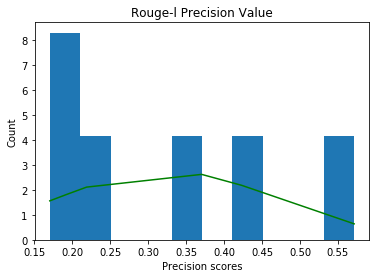

In [8]:
from rouge import Rouge
import csv
import json
import pandas as pd
import statistics
import numpy as np
import scipy.stats as stats
import pylab as pl

csvfile = open('./output/extracted_data.csv', 'r')
csvfile2 = open('sample_input.csv', 'r')

df2 = pd.read_csv(csvfile2)
notes = []

for index, row in df2.iterrows():
    notes.append(row['notes'])

df = pd.read_csv(csvfile)
l = []
rouge = Rouge()
count = 0

for index, row in df.iterrows():
    summary = row['summary']
    try:
        scores = rouge.get_scores(notes[count], summary)
        scores.append({'notes': notes[count], 'summarizer': summary})
        l.append(scores)
        # print(l)
    except Exception as e:
        print(e)
    count = count + 1

total_p_r1 = 0.0
total_r_r1 = 0.0
total_f_r1 = 0.0

total_p_r2 = 0.0
total_r_r2 = 0.0
total_f_r2 = 0.0

total_p_rl = 0.0
total_r_rl = 0.0
total_f_rl = 0.0
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []
a9 = []
for item in l:
    rouge_scores = item[0]

    rouge_1_dict = rouge_scores['rouge-1']
    rouge_2_dict = rouge_scores['rouge-2']
    rouge_l_dict = rouge_scores['rouge-l']

    total_f_r1 += rouge_1_dict['f']
    a1.append(rouge_1_dict['f'])
    total_r_r1 += rouge_1_dict['r']
    a2.append(rouge_1_dict['r'])
    total_p_r1 += rouge_1_dict['p']
    a3.append(rouge_1_dict['p'])

    total_f_r2 += rouge_2_dict['f']
    a4.append(rouge_2_dict['f'])
    total_r_r2 += rouge_2_dict['r']
    a5.append(rouge_2_dict['r'])
    total_p_r2 += rouge_2_dict['p']
    a6.append(rouge_2_dict['p'])

    total_f_rl += rouge_l_dict['f']
    a7.append(rouge_l_dict['f'])
    total_r_rl += rouge_l_dict['r']
    a8.append(rouge_l_dict['r'])
    total_p_rl += rouge_l_dict['p']
    a9.append(rouge_l_dict['p'])



s1 = sorted(a9)
fit = stats.norm.pdf(s1, np.mean(s1), np.std(s1))
pl.plot(s1,fit,'-g')

pl.hist(s1,normed=True)      #use this to draw histogram of your data
pl.title('Rouge-l Precision Value')
pl.xlabel('Precision scores')
pl.ylabel('Count')

pl.show()                   #use may also need add this

scores_file = open('./output/ACLED_rouge_scores.txt', 'w')
scores_file.write(str(l))
scores_file.close()